### Introduction

Since this invloves analysing bags of words we will be using a Bag class to make the code easier to understand and reduce repetition of code. After that we define the similarity functions that will be used to analyse efficiency.

In [3]:
from collections import Counter
from nltk.tokenize import word_tokenize
import numpy as np
import math
import nltk
from functools import reduce
import operator
from pathos.multiprocessing import ProcessingPool as Pool
nltk.download('punkt')

#Class that implements a bag type data structure
class Bag:    
    #Constructor
    def __init__(self, contents=[]):
        self.__bag = list(contents)

    #Returns the size of the bag
    def __len__(self):
        return len(self.__bag)

    #Returns the value at the given index
    def __getitem__(self, index):
        return self.__bag[index]

    #Returns the number of times the given value appears in the bag
    def count(self, value):
        return self.__bag.count(value)

    #Returns dictionary of values in bag and counts for each value
    def counts(self):
        counts = dict()
        for word in self.__bag:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
        return counts
        # return Counter(self.__bag)

    #Adds the given value to the bag
    def add(self, value):
        self.__bag.append(value)

    #Removes the given value from the bag
    def remove(self, value):
        self.__bag.remove(value)
    #Returns the values in the bag
    def __str__(self):
        return str(self.__bag)

    #Returns the values in the bag
    def values(self):
        return self.__bag

    #Returns the number of values in the bag
    def size(self):
        return len(self.__bag)

    #Returns the number of values in the bag
    def __repr__(self):
        return str(self.__bag)
    
    #Returns an iterator for the bag
    def __iter__(self):
        return iter(self.__bag)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jingl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Utility Functions

In [38]:
import time
import random

def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

def time_similarities(similarity_func, words_func,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        bag1 = Bag(words_func(*args))
        bag2 = Bag(words_func(*args))
        starttime=time.time()
        ans=similarity_func(bag1, bag2)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

def time_similarities_heatmap(similarity_func, words_func,*args,repeats=100,**kwargs):
    times=[]
    similarities = []
    for i in range(repeats):
        bag1 = Bag(words_func(*args))
        bag2 = Bag(words_func(*args))
        starttime=time.time()
        ans=similarity_func(bag1, bag2)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        similarities.append(ans)
 
    return similarities, times

def sample_n_words(word_list, n):
    return random.sample(word_list, n)

def choose_n_words(word_list, n):
    return random.choices(word_list, k=n)

def plot_bagsize_vs_meantime(similarity_func, word_list, bag_sizes, repeats=10):
    times = []
    bag_size = []

    for j in bag_sizes:
        results = time_similarities(similarity_func, choose_n_words, word_list, j, repeats=repeats)

        bag_size.append(j)
        times.append(results[1])

    plt.plot(times, bag_size)
    plt.xlabel("Time of Operation")
    plt.ylabel("Size of Bag")
    # plt.show()

def plot_bagsize_vs_time_with_similarity(similarity_func, word_list, bag_sizes, repeats=10):
    bag_size = []
    times = []
    similarities = []

    for j in bag_sizes:
        results = time_similarities_heatmap(similarity_func, choose_n_words, words, j, repeats=repeats)

        similarities.append(results[0])
        times.append(results[1])
        bag_size.append([j]*len(results[1]))

    similarities = np.array(similarities)
    bag_size = np.array(bag_size)
    times = np.array(times)

    # similarities, times = times, similarities

    colormap = plt.cm.autumn_r
    normalize = matplotlib.colors.Normalize(vmin=np.min(similarities), vmax=np.max(similarities))
    plt.scatter(times, bag_size, c=similarities, cmap=colormap, norm=normalize, marker=',')
    plt.xlabel("Time of Operation")
    plt.ylabel("Size of Bag")

    # plt.show()

In [5]:
list_of_words_1k = ["the", "of", "to", "and", "a", "in", "is", "it", "you", "that", "he", "was", "for", "on", "are", "with", "as", "I", "his", "they", "be", "at", "one", "have", "this", "from", "or", "had", "by", "not", "word", "but", "what", "some", "we", "can", "out", "other", "were", "all", "there", "when", "up", "use", "your", "how", "said", "an", "each", "she", "which", "do", "their", "time", "if", "will", "way", "about", "many", "then", "them", "write", "would", "like", "so", "these", "her", "long", "make", "thing", "see", "him", "two", "has", "look", "more", "day", "could", "go", "come", "did", "number", "sound", "no", "most", "people", "my", "over", "know", "water", "than", "call", "first", "who", "may", "down", "side", "been", "now", "find", "any", "new", "work", "part", "take", "get", "place", "made", "live", "where", "after", "back", "little", "only", "round", "man", "year", "came", "show", "every", "good", "me", "give", "our", "under", "name", "very", "through", "just", "form", "sentence", "great", "think", "say", "help", "low", "line", "differ", "turn", "cause", "much", "mean", "before", "move", "right", "boy", "old", "too", "same", "tell", "does", "set", "three", "want", "air", "well", "also", "play", "small", "end", "put", "home", "read", "hand", "port", "large", "spell", "add", "even", "land", "here", "must", "big", "high", "such", "follow", "act", "why", "ask", "men", "change", "went", "light", "kind", "off", "need", "house", "picture", "try", "us", "again", "animal", "point", "mother", "world", "near", "build", "self", "earth", "father", "head", "stand", "own", "page", "should", "country", "found", "answer", "school", "grow", "study", "still", "learn", "plant", "cover", "food", "sun", "four", "between", "state", "keep", "eye", "never", "last", "let", "thought", "city", "tree", "cross", "farm", "hard", "start", "might", "story", "saw", "far", "sea", "draw", "left", "late", "run", "don't", "while", "press", "close", "night", "real", "life", "few", "north", "open", "seem", "together", "next", "white", "children", "begin", "got", "walk", "example", "ease", "paper", "group", "always", "music", "those", "both", "mark", "often", "letter", "until", "mile", "river", "car", "feet", "care", "second", "book", "carry", "took", "science", "eat", "room", "friend", "began", "idea", "fish", "mountain", "stop", "once", "base", "hear", "horse", "cut", "sure", "watch", "color", "face", "wood", "main", "enough", "plain", "girl", "usual", "young", "ready", "above", "ever", "red", "list", "though", "feel", "talk", "bird", "soon", "body", "dog", "family", "direct", "pose", "leave", "song", "measure", "door", "product", "black", "short", "numeral", "class", "wind", "question", "happen", "complete", "ship", "area", "half", "rock", "order", "fire", "south", "problem", "piece", "told", "knew", "pass", "since", "top", "whole", "king", "space", "heard", "best", "hour", "better", "true", "during", "hundred", "five", "remember", "step", "early", "hold", "west", "ground", "interest", "reach", "fast", "verb", "sing", "listen", "six", "table", "travel", "less", "morning", "ten", "simple", "several", "vowel", "toward", "war", "lay", "against", "pattern", "slow", "center", "love", "person", "money", "serve", "appear", "road", "map", "rain", "rule", "govern", "pull", "cold", "notice", "voice", "unit", "power", "town", "fine", "certain", "fly", "fall", "lead", "cry", "dark", "machine", "note", "wait", "plan", "figure", "star", "box", "noun", "field", "rest", "correct", "able", "pound", "done", "beauty", "drive", "stood", "contain", "front", "teach", "week", "final", "gave", "green", "oh", "quick", "develop", "ocean", "warm", "free", "minute", "strong", "special", "mind", "behind", "clear", "tail", "produce", "fact", "street", "inch", "multiply", "nothing", "course", "stay", "wheel", "full", "force", "blue", "object", "decide", "surface", "deep", "moon", "island", "foot", "system", "busy", "test", "record", "boat", "common", "gold", "possible", "plane", "stead", "dry", "wonder", "laugh", "thousand", "ago", "ran", "check", "game", "shape", "equate", "hot", "miss", "brought", "heat", "snow", "tire", "bring", "yes", "distant", "fill", "east", "paint", "language", "among", "grand", "ball", "yet", "wave", "drop", "heart", "am", "present", "heavy", "dance", "engine", "position", "arm", "wide", "sail", "material", "size", "vary", "settle", "speak", "weight", "general", "ice", "matter", "circle", "pair", "include", "divide", "syllable", "felt", "perhaps", "pick", "sudden", "count", "square", "reason", "length", "represent", "art", "subject", "region", "energy", "hunt", "probable", "bed", "brother", "egg", "ride", "cell", "believe", "fraction", "forest", "sit", "race", "window", "store", "summer", "train", "sleep", "prove", "lone", "leg", "exercise", "wall", "catch", "mount", "wish", "sky", "board", "joy", "winter", "sat", "written", "wild", "instrument", "kept", "glass", "grass", "cow", "job", "edge", "sign", "visit", "past", "soft", "fun", "bright", "gas", "weather", "month", "million", "bear", "finish", "happy", "hope", "flower", "clothe", "strange", "gone", "jump", "baby", "eight", "village", "meet", "root", "buy", "raise", "solve", "metal", "whether", "push", "seven", "paragraph", "third", "shall", "held", "hair", "describe", "cook", "floor", "either", "result", "burn", "hill", "safe", "cat", "century", "consider", "type", "law", "bit", "coast", "copy", "phrase", "silent", "tall", "sand", "soil", "roll", "temperature", "finger", "industry", "value", "fight", "lie", "beat", "excite", "natural", "view", "sense", "ear", "else", "quite", "broke", "case", "middle", "kill", "son", "lake", "moment", "scale", "loud", "spring", "observe", "child", "straight", "consonant", "nation", "dictionary", "milk", "speed", "method", "organ", "pay", "age", "section", "dress", "cloud", "surprise", "quiet", "stone", "tiny", "climb", "cool", "design", "poor", "lot", "experiment", "bottom", "key", "iron", "single", "stick", "flat", "twenty", "skin", "smile", "crease", "hole", "trade", "melody", "trip", "office", "receive", "row", "mouth", "exact", "symbol", "die", "least", "trouble", "shout", "except", "wrote", "seed", "tone", "join", "suggest", "clean", "break", "lady", "yard", "rise", "bad", "blow", "oil", "blood", "touch", "grew", "cent", "mix", "team", "wire", "cost", "lost", "brown", "wear", "garden", "equal", "sent", "choose", "fell", "fit", "flow", "fair", "bank", "collect", "save", "control", "decimal", "gentle", "woman", "captain", "practice", "separate", "difficult", "doctor", "please", "protect", "noon", "whose", "locate", "ring", "character", "insect", "caught", "period", "indicate", "radio", "spoke", "atom", "human", "history", "effect", "electric", "expect", "crop", "modern", "element", "hit", "student", "corner", "party", "supply", "bone", "rail", "imagine", "provide", "agree", "thus", "capital", "won't", "chair", "danger", "fruit", "rich", "thick", "soldier", "process", "operate", "guess", "necessary", "sharp", "wing", "create", "neighbor", "wash", "bat", "rather", "crowd", "corn", "compare", "poem", "string", "bell", "depend", "meat", "rub", "tube", "famous", "dollar", "stream", "fear", "sight", "thin", "triangle", "planet", "hurry", "chief", "colony", "clock", "mine", "tie", "enter", "major", "fresh", "search", "send", "yellow", "gun", "allow", "print", "dead", "spot", "desert", "suit", "current", "lift", "rose", "continue", "block", "chart", "hat", "sell", "success", "company", "subtract", "event", "particular", "deal", "swim", "term", "opposite", "wife", "shoe", "shoulder", "spread", "arrange", "camp", "invent", "cotton", "born", "determine", "quart", "nine", "truck", "noise", "level", "chance", "gather", "shop", "stretch", "throw", "shine", "column", "property", "select", "molecule", "gray", "wrong", "require", "repeat", "prepare", "broad", "nose", "salt", "anger", "plural", "continent", "claim", "sugar", "oxygen", "pretty", "death", "women", "skill", "solution", "season", "silver", "magnet", "branch", "thank", "suffix", "match", "fig", "especially", "huge", "afraid", "steel", "sister", "forward", "discuss", "guide", "similar", "score", "experience", "bought", "apple", "pitch", "led", "mass", "coat", "band", "card", "slip", "rope", "dream", "win", "condition", "evening", "tool", "feed", "basic", "total", "valley", "smell", "double", "nor", "arrive", "seat", "track", "master", "shore", "parent", "sheet", "division", "favor", "substance", "post", "connect", "chord", "spend", "glad", "fat", "share", "original", "dad", "station", "charge", "bread", "bar", "proper", "segment", "offer", "duck", "slave", "market", "instant", "populate", "degree", "dear", "chick", "reply", "enemy", "occur", "drink", "speech", "support", "range", "nature", "motion", "steam", "liquid", "path", "meant", "log", "teeth", "quotient", "neck", "shell"]
list_of_words_20k = ["the", "of", "and", "to", "a", "in", "for", "is", "on", "that", "by", "this", "with", "i", "you", "it", "not", "or", "be", "are", "from", "at", "as", "your", "all", "have", "new", "more", "an", "was", "we", "will", "home", "can", "us", "about", "if", "page", "my", "has", "search", "free", "but", "our", "one", "other", "do", "no", "information", "time", "they", "site", "he", "up", "may", "what", "which", "their", "news", "out", "use", "any", "there", "see", "only", "so", "his", "when", "contact", "here", "business", "who", "web", "also", "now", "help", "get", "pm", "view", "online", "c", "e", "first", "am", "been", "would", "how", "were", "me", "s", "services", "some", "these", "click", "its", "like", "service", "x", "than", "find", "price", "date", "back", "top", "people", "had", "list", "name", "just", "over", "state", "year", "day", "into", "email", "two", "health", "n", "world", "re", "next", "used", "go", "b", "work", "last", "most", "products", "music", "buy", "data", "make", "them", "should", "product", "system", "post", "her", "city", "t", "add", "policy", "number", "such", "please", "available", "copyright", "support", "message", "after", "best", "software", "then", "jan", "good", "video", "well", "d", "where", "info", "rights", "public", "books", "high", "school", "through", "m", "each", "links", "she", "review", "years", "order", "very", "privacy", "book", "items", "company", "r", "read", "group", "sex", "need", "many", "user", "said", "de", "does", "set", "under", "general", "research", "university", "january", "mail", "full", "map", "reviews", "program", "life", "know", "games", "way", "days", "management", "p", "part", "could", "great", "united", "hotel", "real", "f", "item", "international", "center", "ebay", "must", "store", "travel", "comments", "made", "development", "report", "off", "member", "details", "line", "terms", "before", "hotels", "did", "send", "right", "type", "because", "local", "those", "using", "results", "office", "education", "national", "car", "design", "take", "posted", "internet", "address", "community", "within", "states", "area", "want", "phone", "dvd", "shipping", "reserved", "subject", "between", "forum", "family", "l", "long", "based", "w", "code", "show", "o", "even", "black", "check", "special", "prices", "website", "index", "being", "women", "much", "sign", "file", "link", "open", "today", "technology", "south", "case", "project", "same", "pages", "uk", "version", "section", "own", "found", "sports", "house", "related", "security", "both", "g", "county", "american", "photo", "game", "members", "power", "while", "care", "network", "down", "computer", "systems", "three", "total", "place", "end", "following", "download", "h", "him", "without", "per", "access", "think", "north", "resources", "current", "posts", "big", "media", "law", "control", "water", "history", "pictures", "size", "art", "personal", "since", "including", "guide", "shop", "directory", "board", "location", "change", "white", "text", "small", "rating", "rate", "government", "children", "during", "usa", "return", "students", "v", "shopping", "account", "times", "sites", "level", "digital", "profile", "previous", "form", "events", "love", "old", "john", "main", "call", "hours", "image", "department", "title", "description", "non", "k", "y", "insurance", "another", "why", "shall", "property", "class", "cd", "still", "money", "quality", "every", "listing", "content", "country", "private", "little", "visit", "save", "tools", "low", "reply", "customer", "december", "compare", "movies", "include", "college", "value", "article", "york", "man", "card", "jobs", "provide", "j", "food", "source", "author", "different", "press", "u", "learn", "sale", "around", "print", "course", "job", "canada", "process", "teen", "room", "stock", "training", "too", "credit", "point", "join", "science", "men", "categories", "advanced", "west", "sales", "look", "english", "left", "team", "estate", "box", "conditions", "select", "windows", "photos", "gay", "thread", "week", "category", "note", "live", "large", "gallery", "table", "register", "however", "june", "october", "november", "market", "library", "really", "action", "start", "series", "model", "features", "air", "industry", "plan", "human", "provided", "tv", "yes", "required", "second", "hot", "accessories", "cost", "movie", "forums", "march", "la", "september", "better", "say", "questions", "july", "yahoo", "going", "medical", "test", "friend", "come", "dec", "server", "pc", "study", "application", "cart", "staff", "articles", "san", "feedback", "again", "play", "looking", "issues", "april", "never", "users", "complete", "street", "topic", "comment", "financial", "things", "working", "against", "standard", "tax", "person", "below", "mobile", "less", "got", "blog", "party", "payment", "equipment", "login", "student", "let", "programs", "offers", "legal", "above", "recent", "park", "stores", "side", "act", "problem", "red", "give", "memory", "performance", "social", "q", "august", "quote", "language", "story", "sell", "options", "experience", "rates", "create", "key", "body", "young", "america", "important", "field", "few", "east", "paper", "single", "ii", "age", "activities", "club", "example", "girls", "additional", "password", "z", "latest", "something", "road", "gift", "question", "changes", "night", "ca", "hard", "texas", "oct", "pay", "four", "poker", "status", "browse", "issue", "range", "building", "seller", "court", "february", "always", "result", "audio", "light", "write", "war", "nov", "offer", "blue", "groups", "al", "easy", "given", "files", "event", "release", "analysis", "request", "fax", "china", "making", "picture", "needs", "possible", "might", "professional", "yet", "month", "major", "star", "areas", "future", "space", "committee", "hand", "sun", "cards", "problems", "london", "washington", "meeting", "rss", "become", "interest", "id", "child", "keep", "enter", "california", "porn", "share", "similar", "garden", "schools", "million", "added", "reference", "companies", "listed", "baby", "learning", "energy", "run", "delivery", "net", "popular", "term", "film", "stories", "put", "computers", "journal", "reports", "co", "try", "welcome", "central", "images", "president", "notice", "god", "original", "head", "radio", "until", "cell", "color", "self", "council", "away", "includes", "track", "australia", "discussion", "archive", "once", "others", "entertainment", "agreement", "format", "least", "society", "months", "log", "safety", "friends", "sure", "faq", "trade", "edition", "cars", "messages", "marketing", "tell", "further", "updated", "association", "able", "having", "provides", "david", "fun", "already", "green", "studies", "close", "common", "drive", "specific", "several", "gold", "feb", "living", "sep", "collection", "called", "short", "arts", "lot", "ask", "display", "limited", "powered", "solutions", "means", "director", "daily", "beach", "past", "natural", "whether", "due", "et", "electronics", "five", "upon", "period", "planning", "database", "says", "official", "weather", "mar", "land", "average", "done", "technical", "window", "france", "pro", "region", "island", "record", "direct", "microsoft", "conference", "environment", "records", "st", "district", "calendar", "costs", "style", "url", "front", "statement", "update", "parts", "aug", "ever", "downloads", "early", "miles", "sound", "resource", "present", "applications", "either", "ago", "document", "word", "works", "material", "bill", "apr", "written", "talk", "federal", "hosting", "rules", "final", "adult", "tickets", "thing", "centre", "requirements", "via", "cheap", "nude", "kids", "finance", "true", "minutes", "else", "mark", "third", "rock", "gifts", "europe", "reading", "topics", "bad", "individual", "tips", "plus", "auto", "cover", "usually", "edit", "together", "videos", "percent", "fast", "function", "fact", "unit", "getting", "global", "tech", "meet", "far", "economic", "en", "player", "projects", "lyrics", "often", "subscribe", "submit", "germany", "amount", "watch", "included", "feel", "though", "bank", "risk", "thanks", "everything", "deals", "various", "words", "linux", "jul", "production", "commercial", "james", "weight", "town", "heart", "advertising", "received", "choose", "treatment", "newsletter", "archives", "points", "knowledge", "magazine", "error", "camera", "jun", "girl", "currently", "construction", "toys", "registered", "clear", "golf", "receive", "domain", "methods", "chapter", "makes", "protection", "policies", "loan", "wide", "beauty", "manager", "india", "position", "taken", "sort", "listings", "models", "michael", "known", "half", "cases", "step", "engineering", "florida", "simple", "quick", "none", "wireless", "license", "paul", "friday", "lake", "whole", "annual", "published", "later", "basic", "sony", "shows", "corporate", "google", "church", "method", "purchase", "customers", "active", "response", "practice", "hardware", "figure", "materials", "fire", "holiday", "chat", "enough", "designed", "along", "among", "death", "writing", "speed", "html", "countries", "loss", "face", "brand", "discount", "higher", "effects", "created", "remember", "standards", "oil", "bit", "yellow", "political", "increase", "advertise", "kingdom", "base", "near", "environmental", "thought", "stuff", "french", "storage", "oh", "japan", "doing", "loans", "shoes", "entry", "stay", "nature", "orders", "availability", "africa", "summary", "turn", "mean", "growth", "notes", "agency", "king", "monday", "european", "activity", "copy", "although", "drug", "pics", "western", "income", "force", "cash", "employment", "overall", "bay", "river", "commission", "ad", "package", "contents", "seen", "players", "engine", "port", "album", "regional", "stop", "supplies", "started", "administration", "bar", "institute", "views", "plans", "double", "dog", "build", "screen", "exchange", "types", "soon", "sponsored", "lines", "electronic", "continue", "across", "benefits", "needed", "season", "apply", "someone", "held", "ny", "anything", "printer", "condition", "effective", "believe", "organization", "effect", "asked", "eur", "mind", "sunday", "selection", "casino", "pdf", "lost", "tour", "menu", "volume", "cross", "anyone", "mortgage", "hope", "silver", "corporation", "wish", "inside", "solution", "mature", "role", "rather", "weeks", "addition", "came", "supply", "nothing", "certain", "usr", "executive", "running", "lower", "necessary", "union", "jewelry", "according", "dc", "clothing", "mon", "com", "particular", "fine", "names", "robert", "homepage", "hour", "gas", "skills", "six", "bush", "islands", "advice", "career", "military", "rental", "decision", "leave", "british", "teens", "pre", "huge", "sat", "woman", "facilities", "zip", "bid", "kind", "sellers", "middle", "move", "cable", "opportunities", "taking", "values", "division", "coming", "tuesday", "object", "lesbian", "appropriate", "machine", "logo", "length", "actually", "nice", "score", "statistics", "client", "ok", "returns", "capital", "follow", "sample", "investment", "sent", "shown", "saturday", "christmas", "england", "culture", "band", "flash", "ms", "lead", "george", "choice", "went", "starting", "registration", "fri", "thursday", "courses", "consumer", "hi", "airport", "foreign", "artist", "outside", "furniture", "levels", "channel", "letter", "mode", "phones", "ideas", "wednesday", "structure", "fund", "summer", "allow", "degree", "contract", "button", "releases", "wed", "homes", "super", "male", "matter", "custom", "virginia", "almost", "took", "located", "multiple", "asian", "distribution", "editor", "inn", "industrial", "cause", "potential", "song", "cnet", "ltd", "los", "hp", "focus", "late", "fall", "featured", "idea", "rooms", "female", "responsible", "inc", "communications", "win", "associated", "thomas", "primary", "cancer", "numbers", "reason", "tool", "browser", "spring", "foundation", "answer", "voice", "eg", "friendly", "schedule", "documents", "communication", "purpose", "feature", "bed", "comes", "police", "everyone", "independent", "ip", "approach", "cameras", "brown", "physical", "operating", "hill", "maps", "medicine", "deal", "hold", "ratings", "chicago", "forms", "glass", "happy", "tue", "smith", "wanted", "developed", "thank", "safe", "unique", "survey", "prior", "telephone", "sport", "ready", "feed", "animal", "sources", "mexico", "population", "pa", "regular", "secure", "navigation", "operations", "therefore", "ass", "simply", "evidence", "station", "christian", "round", "paypal", "favorite", "understand", "option", "master", "valley", "recently", "probably", "thu", "rentals", "sea", "built", "publications", "blood", "cut", "worldwide", "improve", "connection", "publisher", "hall", "larger", "anti", "networks", "earth", "parents", "nokia", "impact", "transfer", "introduction", "kitchen", "strong", "tel", "carolina", "wedding", "properties", "hospital", "ground", "overview", "ship", "accommodation", "owners", "disease", "tx", "excellent", "paid", "italy", "perfect", "hair", "opportunity", "kit", "classic", "basis", "command", "cities", "william", "express", "anal", "award", "distance", "tree", "peter", "assessment", "ensure", "thus", "wall", "ie", "involved", "el", "extra", "especially", "interface", "pussy", "partners", "budget", "rated", "guides", "success", "maximum", "ma", "operation", "existing", "quite", "selected", "boy", "amazon", "patients", "restaurants", "beautiful", "warning", "wine", "locations", "horse", "vote", "forward", "flowers", "stars", "significant", "lists", "technologies", "owner", "retail", "animals", "useful", "directly", "manufacturer", "ways", "est", "son", "providing", "rule", "mac", "housing", "takes", "iii", "gmt", "bring", "catalog", "searches", "max", "trying", "mother", "authority", "considered", "told", "xml", "traffic", "programme", "joined", "input", "strategy", "feet", "agent", "valid", "bin", "modern", "senior", "ireland", "sexy", "teaching", "door", "grand", "testing", "trial", "charge", "units", "instead", "canadian", "cool", "normal", "wrote", "enterprise", "ships", "entire", "educational", "md", "leading", "metal", "positive", "fl", "fitness", "chinese", "opinion", "mb", "asia", "football", "abstract", "uses", "output", "funds", "mr", "greater", "likely", "develop", "employees", "artists", "alternative", "processing", "responsibility", "resolution", "java", "guest", "seems", "publication", "pass", "relations", "trust", "van", "contains", "session", "multi", "photography", "republic", "fees", "components", "vacation", "century", "academic", "assistance", "completed", "skin", "graphics", "indian", "prev", "ads", "mary", "il", "expected", "ring", "grade", "dating", "pacific", "mountain", "organizations", "pop", "filter", "mailing", "vehicle", "longer", "consider", "int", "northern", "behind", "panel", "floor", "german", "buying", "match", "proposed", "default", "require", "iraq", "boys", "outdoor", "deep", "morning", "otherwise", "allows", "rest", "protein", "plant", "reported", "hit", "transportation", "mm", "pool", "mini", "politics", "partner", "disclaimer", "authors", "boards", "faculty", "parties", "fish", "membership", "mission", "eye", "string", "sense", "modified", "pack", "released", "stage", "internal", "goods", "recommended", "born", "unless", "richard", "detailed", "japanese", "race", "approved", "background", "target", "except", "character", "usb", "maintenance", "ability", "maybe", "functions", "ed", "moving", "brands", "places", "php", "pretty", "trademarks", "phentermine", "spain", "southern", "yourself", "etc", "winter", "rape", "battery", "youth", "pressure", "submitted", "boston", "incest", "debt", "keywords", "medium", "television", "interested", "core", "break", "purposes", "throughout", "sets", "dance", "wood", "msn", "itself", "defined", "papers", "playing", "awards", "fee", "studio", "reader", "virtual", "device", "established", "answers", "rent", "las", "remote", "dark", "programming", "external", "apple", "le", "regarding", "instructions", "min", "offered", "theory", "enjoy", "remove", "aid", "surface", "minimum", "visual", "host", "variety", "teachers", "isbn", "martin", "manual", "block", "subjects", "agents", "increased", "repair", "fair", "civil", "steel", "understanding", "songs", "fixed", "wrong", "beginning", "hands", "associates", "finally", "az", "updates", "desktop", "classes", "paris", "ohio", "gets", "sector", "capacity", "requires", "jersey", "un", "fat", "fully", "father", "electric", "saw", "instruments", "quotes", "officer", "driver", "businesses", "dead", "respect", "unknown", "specified", "restaurant", "mike", "trip", "pst", "worth", "mi", "procedures", "poor", "teacher", "xxx", "eyes", "relationship", "workers", "farm", "fucking", "georgia", "peace", "traditional", "campus", "tom", "showing", "creative", "coast", "benefit", "progress", "funding", "devices", "lord", "grant", "sub", "agree", "fiction", "hear", "sometimes", "watches", "careers", "beyond", "goes", "families", "led", "museum", "themselves", "fan", "transport", "interesting", "blogs", "wife", "evaluation", "accepted", "former", "implementation", "ten", "hits", "zone", "complex", "th", "cat", "galleries", "references", "die", "presented", "jack", "flat", "flow", "agencies", "literature", "respective", "parent", "spanish", "michigan", "columbia", "setting", "dr", "scale", "stand", "economy", "highest", "helpful", "monthly", "critical", "frame", "musical", "definition", "secretary", "angeles", "networking", "path", "australian", "employee", "chief", "gives", "kb", "bottom", "magazines", "packages", "detail", "francisco", "laws", "changed", "pet", "heard", "begin", "individuals", "colorado", "royal", "clean", "switch", "russian", "largest", "african", "guy", "titles", "relevant", "guidelines", "justice", "connect", "bible", "dev", "cup", "basket", "applied", "weekly", "vol", "installation", "described", "demand", "pp", "suite", "vegas", "na", "square", "chris", "attention", "advance", "skip", "diet", "army", "auction", "gear", "lee", "os", "difference", "allowed", "correct", "charles", "nation", "selling", "lots", "piece", "sheet", "firm", "seven", "older", "illinois", "regulations", "elements", "species", "jump", "cells", "module", "resort", "facility", "random", "pricing", "dvds", "certificate", "minister", "motion", "looks", "fashion", "directions", "visitors", "documentation", "monitor", "trading", "forest", "calls", "whose", "coverage", "couple", "giving", "chance", "vision", "ball", "ending", "clients", "actions", "listen", "discuss", "accept", "automotive", "naked", "goal", "successful", "sold", "wind", "communities", "clinical", "situation", "sciences", "markets", "lowest", "highly", "publishing", "appear", "emergency", "developing", "lives", "currency", "leather", "determine", "milf", "temperature", "palm", "announcements", "patient", "actual", "historical", "stone", "bob", "commerce", "ringtones", "perhaps", "persons", "difficult", "scientific", "satellite", "fit", "tests", "village", "accounts", "amateur", "ex", "met", "pain", "xbox", "particularly", "factors", "coffee", "www", "settings", "cum", "buyer", "cultural", "steve", "easily", "oral", "ford", "poster", "edge", "functional", "root", "au", "fi", "closed", "holidays", "ice", "pink", "zealand", "balance", "monitoring", "graduate", "replies", "shot", "nc", "architecture", "initial", "label", "thinking", "scott", "llc", "sec", "recommend", "canon", "hardcore", "league", "waste", "minute", "bus", "provider", "optional", "dictionary", "cold", "accounting", "manufacturing", "sections", "chair", "fishing", "effort", "phase", "fields", "bag", "fantasy", "po", "letters", "motor", "va", "professor", "context", "install", "shirt", "apparel", "generally", "continued", "foot", "mass", "crime", "count", "breast", "techniques", "ibm", "rd", "johnson", "sc", "quickly", "dollars", "websites", "religion", "claim", "driving", "permission", "surgery", "patch", "heat", "wild", "measures", "generation", "kansas", "miss", "chemical", "doctor", "task", "reduce", "brought", "himself", "nor", "component", "enable", "exercise", "bug", "santa", "mid", "guarantee", "leader", "diamond", "israel", "se", "processes", "soft", "servers", "alone", "meetings", "seconds", "jones", "arizona", "keyword", "interests", "flight", "congress", "fuel", "username", "walk", "fuck", "produced", "italian", "paperback", "classifieds", "wait", "supported", "pocket", "saint", "rose", "freedom", "argument", "competition", "creating", "jim", "drugs", "joint", "premium", "providers", "fresh", "characters", "attorney", "upgrade", "di", "factor", "growing", "thousands", "km", "stream", "apartments", "pick", "hearing", "eastern", "auctions", "therapy", "entries", "dates", "generated", "signed", "upper", "administrative", "serious", "prime", "samsung", "limit", "began", "louis", "steps", "errors", "shops", "bondage", "del", "efforts", "informed", "ga", "ac", "thoughts", "creek", "ft", "worked", "quantity", "urban", "practices", "sorted", "reporting", "essential", "myself", "tours", "platform", "load", "affiliate", "labor", "immediately", "admin", "nursing", "defense", "machines", "designated", "tags", "heavy", "covered", "recovery", "joe", "guys", "integrated", "configuration", "cock", "merchant", "comprehensive", "expert", "universal", "protect", "drop", "solid", "cds", "presentation", "languages", "became", "orange", "compliance", "vehicles", "prevent", "theme", "rich", "im", "campaign", "marine", "improvement", "vs", "guitar", "finding", "pennsylvania", "examples", "ipod", "saying", "spirit", "ar", "claims", "porno", "challenge", "motorola", "acceptance", "strategies", "mo", "seem", "affairs", "touch", "intended", "towards", "sa", "goals", "hire", "election", "suggest", "branch", "charges", "serve", "affiliates", "reasons", "magic", "mount", "smart", "talking", "gave", "ones", "latin", "multimedia", "xp", "tits", "avoid", "certified", "manage", "corner", "rank", "computing", "oregon", "element", "birth", "virus", "abuse", "interactive", "requests", "separate", "quarter", "procedure", "leadership", "tables", "define", "racing", "religious", "facts", "breakfast", "kong", "column", "plants", "faith", "chain", "developer", "identify", "avenue", "missing", "died", "approximately", "domestic", "sitemap", "recommendations", "moved", "houston", "reach", "comparison", "mental", "viewed", "moment", "extended", "sequence", "inch", "attack", "sorry", "centers", "opening", "damage", "lab", "reserve", "recipes", "cvs", "gamma", "plastic", "produce", "snow", "placed", "truth", "counter", "failure", "follows", "eu", "weekend", "dollar", "camp", "ontario", "automatically", "des", "minnesota", "films", "bridge", "native", "fill", "williams", "movement", "printing", "baseball", "owned", "approval", "draft", "chart", "played", "contacts", "cc", "jesus", "readers", "clubs", "lcd", "wa", "jackson", "equal", "adventure", "matching", "offering", "shirts", "profit", "leaders", "posters", "institutions", "assistant", "variable", "ave", "dj", "advertisement", "expect", "parking", "headlines", "yesterday", "compared", "determined", "wholesale", "workshop", "russia", "gone", "codes", "kinds", "extension", "seattle", "statements", "golden", "completely", "teams", "fort", "cm", "wi", "lighting", "senate", "forces", "funny", "brother", "gene", "turned", "portable", "tried", "electrical", "applicable", "disc", "returned", "pattern", "ct", "hentai", "boat", "named", "theatre", "laser", "earlier", "manufacturers", "sponsor", "classical", "icon", "warranty", "dedicated", "indiana", "direction", "harry", "basketball", "objects", "ends", "delete", "evening", "assembly", "nuclear", "taxes", "mouse", "signal", "criminal", "issued", "brain", "sexual", "wisconsin", "powerful", "dream", "obtained", "false", "da", "cast", "flower", "felt", "personnel", "passed", "supplied", "identified", "falls", "pic", "soul", "aids", "opinions", "promote", "stated", "stats", "hawaii", "professionals", "appears", "carry", "flag", "decided", "nj", "covers", "hr", "em", "advantage", "hello", "designs", "maintain", "tourism", "priority", "newsletters", "adults", "clips", "savings", "iv", "graphic", "atom", "payments", "rw", "estimated", "binding", "brief", "ended", "winning", "eight", "anonymous", "iron", "straight", "script", "served", "wants", "miscellaneous", "prepared", "void", "dining", "alert", "integration", "atlanta", "dakota", "tag", "interview", "mix", "framework", "disk", "installed", "queen", "vhs", "credits", "clearly", "fix", "handle", "sweet", "desk", "criteria", "pubmed", "dave", "massachusetts", "diego", "hong", "vice", "associate", "ne", "truck", "behavior", "enlarge", "ray", "frequently", "revenue", "measure", "changing", "votes", "du", "duty", "looked", "discussions", "bear", "gain", "festival", "laboratory", "ocean", "flights", "experts", "signs", "lack", "depth", "iowa", "whatever", "logged", "laptop", "vintage", "train", "exactly", "dry", "explore", "maryland", "spa", "concept", "nearly", "eligible", "checkout", "reality", "forgot", "handling", "origin", "knew", "gaming", "feeds", "billion", "destination", "scotland", "faster", "intelligence", "dallas", "bought", "con", "ups", "nations", "route", "followed", "specifications", "broken", "tripadvisor", "frank", "alaska", "zoom", "blow", "battle", "residential", "anime", "speak", "decisions", "industries", "protocol", "query", "clip", "partnership", "editorial", "nt", "expression", "es", "equity", "provisions", "speech", "wire", "principles", "suggestions", "rural", "shared", "sounds", "replacement", "tape", "strategic", "judge", "spam", "economics", "acid", "bytes", "cent", "forced", "compatible", "fight", "apartment", "height", "null", "zero", "speaker", "filed", "gb", "netherlands", "obtain", "bc", "consulting", "recreation", "offices", "designer", "remain", "managed", "pr", "failed", "marriage", "roll", "korea", "banks", "fr", "participants", "secret", "bath", "aa", "kelly", "leads", "negative", "austin", "favorites", "toronto", "theater", "springs", "missouri", "andrew", "var", "perform", "healthy", "translation", "estimates", "font", "assets", "injury", "mt", "joseph", "ministry", "drivers", "lawyer", "figures", "married", "protected", "proposal", "sharing", "philadelphia", "portal", "waiting", "birthday", "beta", "fail", "gratis", "banking", "officials", "brian", "toward", "won", "slightly", "assist", "conduct", "contained", "lingerie", "shemale", "legislation", "calling", "parameters", "jazz", "serving", "bags", "profiles", "miami", "comics", "matters", "houses", "doc", "postal", "relationships", "tennessee", "wear", "controls", "breaking", "combined", "ultimate", "wales", "representative", "frequency", "introduced", "minor", "finish", "departments", "residents", "noted", "displayed", "mom", "reduced", "physics", "rare", "spent", "performed", "extreme", "samples", "davis", "daniel", "bars", "reviewed", "row", "oz", "forecast", "removed", "helps", "singles", "administrator", "cycle", "amounts", "contain", "accuracy", "dual", "rise", "usd", "sleep", "mg", "bird", "pharmacy", "brazil", "creation", "static", "scene", "hunter", "addresses", "lady", "crystal", "famous", "writer", "chairman", "violence", "fans", "oklahoma", "speakers", "drink", "academy", "dynamic", "gender", "eat", "permanent", "agriculture", "dell", "cleaning", "constitutes", "portfolio", "practical", "delivered", "collectibles", "infrastructure", "exclusive", "seat", "concerns", "colour", "vendor", "originally", "intel", "utilities", "philosophy", "regulation", "officers", "reduction", "aim", "bids", "referred", "supports", "nutrition", "recording", "regions", "junior", "toll", "les", "cape", "ann", "rings", "meaning", "tip", "secondary", "wonderful", "mine", "ladies", "henry", "ticket", "announced", "guess", "agreed", "prevention", "whom", "ski", "soccer", "math", "import", "posting", "presence", "instant", "mentioned", "automatic", "healthcare", "viewing", "maintained", "ch", "increasing", "majority", "connected", "christ", "dan", "dogs", "sd", "directors", "aspects", "austria", "ahead", "moon", "participation", "scheme", "utility", "preview", "fly", "manner", "matrix", "containing", "combination", "devel", "amendment", "despite", "strength", "guaranteed", "turkey", "libraries", "proper", "distributed", "degrees", "singapore", "enterprises", "delta", "fear", "seeking", "inches", "phoenix", "rs", "convention", "shares", "principal", "daughter", "standing", "voyeur", "comfort", "colors", "wars", "cisco", "ordering", "kept", "alpha", "appeal", "cruise", "bonus", "certification", "previously", "hey", "bookmark", "buildings", "specials", "beat", "disney", "household", "batteries", "adobe", "smoking", "bbc", "becomes", "drives", "arms", "alabama", "tea", "improved", "trees", "avg", "achieve", "positions", "dress", "subscription", "dealer", "contemporary", "sky", "utah", "nearby", "rom", "carried", "happen", "exposure", "panasonic", "hide", "permalink", "signature", "gambling", "refer", "miller", "provision", "outdoors", "clothes", "caused", "luxury", "babes", "frames", "viagra", "certainly", "indeed", "newspaper", "toy", "circuit", "layer", "printed", "slow", "removal", "easier", "src", "liability", "trademark", "hip", "printers", "faqs", "nine", "adding", "kentucky", "mostly", "eric", "spot", "taylor", "trackback", "prints", "spend", "factory", "interior", "revised", "grow", "americans", "optical", "promotion", "relative", "amazing", "clock", "dot", "hiv", "identity", "suites", "conversion", "feeling", "hidden", "reasonable", "victoria", "serial", "relief", "revision", "broadband", "influence", "ratio", "pda", "importance", "rain", "onto", "dsl", "planet", "webmaster", "copies", "recipe", "zum", "permit", "seeing", "proof", "dna", "diff", "tennis", "bass", "prescription", "bedroom", "empty", "instance", "hole", "pets", "ride", "licensed", "orlando", "specifically", "tim", "bureau", "maine", "sql", "represent", "conservation", "pair", "ideal", "specs", "recorded", "don", "pieces", "finished", "parks", "dinner", "lawyers", "sydney", "stress", "cream", "ss", "runs", "trends", "yeah", "discover", "sexo", "ap", "patterns", "boxes", "louisiana", "hills", "javascript", "fourth", "nm", "advisor", "mn", "marketplace", "nd", "evil", "aware", "wilson", "shape", "evolution", "irish", "certificates", "objectives", "stations", "suggested", "gps", "op", "remains", "acc", "greatest", "firms", "concerned", "euro", "operator", "structures", "generic", "encyclopedia", "usage", "cap", "ink", "charts", "continuing", "mixed", "census", "interracial", "peak", "tn", "competitive", "exist", "wheel", "transit", "dick", "suppliers", "salt", "compact", "poetry", "lights", "tracking", "angel", "bell", "keeping", "preparation", "attempt", "receiving", "matches", "accordance", "width", "noise", "engines", "forget", "array", "discussed", "accurate", "stephen", "elizabeth", "climate", "reservations", "pin", "playstation", "alcohol", "greek", "instruction", "managing", "annotation", "sister", "raw", "differences", "walking", "explain", "smaller", "newest", "establish", "gnu", "happened", "expressed", "jeff", "extent", "sharp", "lesbians", "ben", "lane", "paragraph", "kill", "mathematics", "aol", "compensation", "ce", "export", "managers", "aircraft", "modules", "sweden", "conflict", "conducted", "versions", "employer", "occur", "percentage", "knows", "mississippi", "describe", "concern", "backup", "requested", "citizens", "connecticut", "heritage", "personals", "immediate", "holding", "trouble", "spread", "coach", "kevin", "agricultural", "expand", "supporting", "audience", "assigned", "jordan", "collections", "ages", "participate", "plug", "specialist", "cook", "affect", "virgin", "experienced", "investigation", "raised", "hat", "institution", "directed", "dealers", "searching", "sporting", "helping", "perl", "affected", "lib", "bike", "totally", "plate", "expenses", "indicate", "blonde", "ab", "proceedings", "favourite", "transmission", "anderson", "utc", "characteristics", "der", "lose", "organic", "seek", "experiences", "albums", "cheats", "extremely", "verzeichnis", "contracts", "guests", "hosted", "diseases", "concerning", "developers", "equivalent", "chemistry", "tony", "neighborhood", "nevada", "kits", "thailand", "variables", "agenda", "anyway", "continues", "tracks", "advisory", "cam", "curriculum", "logic", "template", "prince", "circle", "soil", "grants", "anywhere", "psychology", "responses", "atlantic", "wet", "circumstances", "edward", "investor", "identification", "ram", "leaving", "wildlife", "appliances", "matt", "elementary", "cooking", "speaking", "sponsors", "fox", "unlimited", "respond", "sizes", "plain", "exit", "entered", "iran", "arm", "keys", "launch", "wave", "checking", "costa", "belgium", "printable", "holy", "acts", "guidance", "mesh", "trail", "enforcement", "symbol", "crafts", "highway", "buddy", "hardcover", "observed", "dean", "setup", "poll", "booking", "glossary", "fiscal", "celebrity", "styles", "denver", "unix", "filled", "bond", "channels", "ericsson", "appendix", "notify", "blues", "chocolate", "pub", "portion", "scope", "hampshire", "supplier", "cables", "cotton", "bluetooth", "controlled", "requirement", "authorities", "biology", "dental", "killed", "border", "ancient", "debate", "representatives", "starts", "pregnancy", "causes", "arkansas", "biography", "leisure", "attractions", "learned", "transactions", "notebook", "explorer", "historic", "attached", "opened", "tm", "husband", "disabled", "authorized", "crazy", "upcoming", "britain", "concert", "retirement", "scores", "financing", "efficiency", "sp", "comedy", "adopted", "efficient", "weblog", "linear", "commitment", "specialty", "bears", "jean", "hop", "carrier", "edited", "constant", "visa", "mouth", "jewish", "meter", "linked", "portland", "interviews", "concepts", "nh", "gun", "reflect", "pure", "deliver", "wonder", "hell", "lessons", "fruit", "begins", "qualified", "reform", "lens", "alerts", "treated", "discovery", "draw", "mysql", "classified", "relating", "assume", "confidence", "alliance", "fm", "confirm", "warm", "neither", "lewis", "howard", "offline", "leaves", "engineer", "lifestyle", "consistent", "replace", "clearance", "connections", "inventory", "converter", "suck", "organisation", "babe", "checks", "reached", "becoming", "blowjob", "safari", "objective", "indicated", "sugar", "crew", "legs", "sam", "stick", "securities", "allen", "pdt", "relation", "enabled", "genre", "slide", "montana", "volunteer", "tested", "rear", "democratic", "enhance", "switzerland", "exact", "bound", "parameter", "adapter", "processor", "node", "formal", "dimensions", "contribute", "lock", "hockey", "storm", "micro", "colleges", "laptops", "mile", "showed", "challenges", "editors", "mens", "threads", "bowl", "supreme", "brothers", "recognition", "presents", "ref", "tank", "submission", "dolls", "estimate", "encourage", "navy", "kid", "regulatory", "inspection", "consumers", "cancel", "limits", "territory", "transaction", "manchester", "weapons", "paint", "delay", "pilot", "outlet", "contributions", "continuous", "db", "czech", "resulting", "cambridge", "initiative", "novel", "pan", "execution", "disability", "increases", "ultra", "winner", "idaho", "contractor", "ph", "episode", "examination", "potter", "dish", "plays", "bulletin", "ia", "pt", "indicates", "modify", "oxford", "adam", "truly", "epinions", "painting", "committed", "extensive", "affordable", "universe", "candidate", "databases", "patent", "slot", "psp", "outstanding", "ha", "eating", "perspective", "planned", "watching", "lodge", "messenger", "mirror", "tournament", "consideration", "ds", "discounts", "sterling", "sessions", "kernel", "boobs", "stocks", "buyers", "journals", "gray", "catalogue", "ea", "jennifer", "antonio", "charged", "broad", "taiwan", "und", "chosen", "demo", "greece", "lg", "swiss", "sarah", "clark", "labour", "hate", "terminal", "publishers", "nights", "behalf", "caribbean", "liquid", "rice", "nebraska", "loop", "salary", "reservation", "foods", "gourmet", "guard", "properly", "orleans", "saving", "nfl", "remaining", "empire", "resume", "twenty", "newly", "raise", "prepare", "avatar", "gary", "depending", "illegal", "expansion", "vary", "hundreds", "rome", "arab", "lincoln", "helped", "premier", "tomorrow", "purchased", "milk", "decide", "consent", "drama", "visiting", "performing", "downtown", "keyboard", "contest", "collected", "nw", "bands", "boot", "suitable", "ff", "absolutely", "millions", "lunch", "dildo", "audit", "push", "chamber", "guinea", "findings", "muscle", "featuring", "iso", "implement", "clicking", "scheduled", "polls", "typical", "tower", "yours", "sum", "misc", "calculator", "significantly", "chicken", "temporary", "attend", "shower", "alan", "sending", "jason", "tonight", "dear", "sufficient", "holdem", "shell", "province", "catholic", "oak", "vat", "awareness", "vancouver", "governor", "beer", "seemed", "contribution", "measurement", "swimming", "spyware", "formula", "constitution", "packaging", "solar", "jose", "catch", "jane", "pakistan", "ps", "reliable", "consultation", "northwest", "sir", "doubt", "earn", "finder", "unable", "periods", "classroom", "tasks", "democracy", "attacks", "kim", "wallpaper", "merchandise", "const", "resistance", "doors", "symptoms", "resorts", "biggest", "memorial", "visitor", "twin", "forth", "insert", "baltimore", "gateway", "ky", "dont", "alumni", "drawing", "candidates", "charlotte", "ordered", "biological", "fighting", "transition", "happens", "preferences", "spy", "romance", "instrument", "bruce", "split", "themes", "powers", "heaven", "br", "bits", "pregnant", "twice", "classification", "focused", "egypt", "physician", "hollywood", "bargain", "wikipedia", "cellular", "norway", "vermont", "asking", "blocks", "normally", "lo", "spiritual", "hunting", "diabetes", "suit", "ml", "shift", "chip", "res", "sit", "bodies", "photographs", "cutting", "wow", "simon", "writers", "marks", "flexible", "loved", "favourites", "mapping", "numerous", "relatively", "birds", "satisfaction", "represents", "char", "indexed", "pittsburgh", "superior", "preferred", "saved", "paying", "cartoon", "shots", "intellectual", "moore", "granted", "choices", "carbon", "spending", "comfortable", "magnetic", "interaction", "listening", "effectively", "registry", "crisis", "outlook", "massive", "denmark", "employed", "bright", "treat", "header", "cs", "poverty", "formed", "piano", "echo", "que", "grid", "sheets", "patrick", "experimental", "puerto", "revolution", "consolidation", "displays", "plasma", "allowing", "earnings", "voip", "mystery", "landscape", "dependent", "mechanical", "journey", "delaware", "bidding", "consultants", "risks", "banner", "applicant", "charter", "fig", "barbara", "cooperation", "counties", "acquisition", "ports", "implemented", "sf", "directories", "recognized", "dreams", "blogger", "notification", "kg", "licensing", "stands", "teach", "occurred", "textbooks", "rapid", "pull", "hairy", "diversity", "cleveland", "ut", "reverse", "deposit", "seminar", "investments", "latina", "nasa", "wheels", "sexcam", "specify", "accessibility", "dutch", "sensitive", "templates", "formats", "tab", "depends", "boots", "holds", "router", "concrete", "si", "editing", "poland", "folder", "womens", "css", "completion", "upload", "pulse", "universities", "technique", "contractors", "milfhunter", "voting", "courts", "notices", "subscriptions", "calculate", "mc", "detroit", "alexander", "broadcast", "converted", "metro", "toshiba", "anniversary", "improvements", "strip", "specification", "pearl", "accident", "nick", "accessible", "accessory", "resident", "plot", "qty", "possibly", "airline", "typically", "representation", "regard", "pump", "exists", "arrangements", "smooth", "conferences", "uniprotkb", "beastiality", "strike", "consumption", "birmingham", "flashing", "lp", "narrow", "afternoon", "threat", "surveys", "sitting", "putting", "consultant", "controller", "ownership", "committees", "penis", "legislative", "researchers", "vietnam", "trailer", "anne", "castle", "gardens", "missed", "malaysia", "unsubscribe", "antique", "labels", "willing", "bio", "molecular", "upskirt", "acting", "heads", "stored", "exam", "logos", "residence", "attorneys", "milfs", "antiques", "density", "hundred", "ryan", "operators", "strange", "sustainable", "philippines", "statistical", "beds", "breasts", "mention", "innovation", "pcs", "employers", "grey", "parallel", "honda", "amended", "operate", "bills", "bold", "bathroom", "stable", "opera", "definitions", "von", "doctors", "lesson", "cinema", "asset", "ag", "scan", "elections", "drinking", "blowjobs", "reaction", "blank", "enhanced", "entitled", "severe", "generate", "stainless", "newspapers", "hospitals", "vi", "deluxe", "humor", "aged", "monitors", "exception", "lived", "duration", "bulk", "successfully", "indonesia", "pursuant", "sci", "fabric", "edt", "visits", "primarily", "tight", "domains", "capabilities", "pmid", "contrast", "recommendation", "flying", "recruitment", "sin", "berlin", "cute", "organized", "ba", "para", "siemens", "adoption", "improving", "cr", "expensive", "meant", "capture", "pounds", "buffalo", "organisations", "plane", "pg", "explained", "seed", "programmes", "desire", "expertise", "mechanism", "camping", "ee", "jewellery", "meets", "welfare", "peer", "caught", "eventually", "marked", "driven", "measured", "medline", "bottle", "agreements", "considering", "innovative", "marshall", "massage", "rubber", "conclusion", "closing", "tampa", "thousand", "meat", "legend", "grace", "susan", "ing", "ks", "adams", "python", "monster", "alex", "bang", "villa", "bone", "columns", "disorders", "bugs", "collaboration", "hamilton", "detection", "ftp", "cookies", "inner", "formation", "tutorial", "med", "engineers", "entity", "cruises", "gate", "holder", "proposals", "moderator", "sw", "tutorials", "settlement", "portugal", "lawrence", "roman", "duties", "valuable", "erotic", "tone", "collectables", "ethics", "forever", "dragon", "busy", "captain", "fantastic", "imagine", "brings", "heating", "leg", "neck", "hd", "wing", "governments", "purchasing", "scripts", "abc", "stereo", "appointed", "taste", "dealing", "commit", "tiny", "operational", "rail", "airlines", "liberal", "livecam", "jay", "trips", "gap", "sides", "tube", "turns", "corresponding", "descriptions", "cache", "belt", "jacket", "determination", "animation", "oracle", "er", "matthew", "lease", "productions", "aviation", "hobbies", "proud", "excess", "disaster", "console", "commands", "jr", "telecommunications", "instructor", "giant", "achieved", "injuries", "shipped", "bestiality", "seats", "approaches", "biz", "alarm", "voltage", "anthony", "nintendo", "usual", "loading", "stamps", "appeared", "franklin", "angle", "rob", "vinyl", "highlights", "mining", "designers", "melbourne", "ongoing", "worst", "imaging", "betting", "scientists", "liberty", "wyoming", "blackjack", "argentina", "era", "convert", "possibility", "analyst", "commissioner", "dangerous", "garage", "exciting", "reliability", "thongs", "gcc", "unfortunately", "respectively", "volunteers", "attachment", "ringtone", "finland", "morgan", "derived", "pleasure", "honor", "asp", "oriented", "eagle", "desktops", "pants", "columbus", "nurse", "prayer", "appointment", "workshops", "hurricane", "quiet", "luck", "postage", "producer", "represented", "mortgages", "dial", "responsibilities", "cheese", "comic", "carefully", "jet", "productivity", "investors", "crown", "par", "underground", "diagnosis", "maker", "crack", "principle", "picks", "vacations", "gang", "semester", "calculated", "cumshot", "fetish", "applies", "casinos", "appearance", "smoke", "apache", "filters", "incorporated", "nv", "craft", "cake", "notebooks", "apart", "fellow", "blind", "lounge", "mad", "algorithm", "semi", "coins", "andy", "gross", "strongly", "cafe", "valentine", "hilton", "ken", "proteins", "horror", "su", "exp", "familiar", "capable", "douglas", "debian", "till", "involving", "pen", "investing", "christopher", "admission", "epson", "shoe", "elected", "carrying", "victory", "sand", "madison", "terrorism", "joy", "editions", "cpu", "mainly", "ethnic", "ran", "parliament", "actor", "finds", "seal", "situations", "fifth", "allocated", "citizen", "vertical", "corrections", "structural", "municipal", "describes", "prize", "sr", "occurs", "jon", "absolute", "disabilities", "consists", "anytime", "substance", "prohibited", "addressed", "lies", "pipe", "soldiers", "nr", "guardian", "lecture", "simulation", "layout", "initiatives", "ill", "concentration", "classics", "lbs", "lay", "interpretation", "horses", "lol", "dirty", "deck", "wayne", "donate", "taught", "bankruptcy", "mp", "worker", "optimization", "alive", "temple", "substances", "prove", "discovered", "wings", "breaks", "genetic", "restrictions", "participating", "waters", "promise", "thin", "exhibition", "prefer", "ridge", "cabinet", "modem", "harris", "mph", "bringing", "sick", "dose", "evaluate", "tiffany", "tropical", "collect", "bet", "composition", "toyota", "streets", "nationwide", "vector", "definitely", "shaved", "turning", "buffer", "purple", "existence", "commentary", "larry", "limousines", "developments", "def", "immigration", "destinations", "lets", "mutual", "pipeline", "necessarily", "syntax", "li", "attribute", "prison", "skill", "chairs", "nl", "everyday", "apparently", "surrounding", "mountains", "moves", "popularity", "inquiry", "ethernet", "checked", "exhibit", "throw", "trend", "sierra", "visible", "cats", "desert", "postposted", "ya", "oldest", "rhode", "nba", "busty", "coordinator", "obviously", "mercury", "steven", "handbook", "greg", "navigate", "worse", "summit", "victims", "epa", "spaces", "fundamental", "burning", "escape", "coupons", "somewhat", "receiver", "substantial", "tr", "progressive", "cialis", "bb", "boats", "glance", "scottish", "championship", "arcade", "richmond", "sacramento", "impossible", "ron", "russell", "tells", "obvious", "fiber", "depression", "graph", "covering", "platinum", "judgment", "bedrooms", "talks", "filing", "foster", "modeling", "passing", "awarded", "testimonials", "trials", "tissue", "nz", "memorabilia", "clinton", "masters", "bonds", "cartridge", "alberta", "explanation", "folk", "org", "commons", "cincinnati", "subsection", "fraud", "electricity", "permitted", "spectrum", "arrival", "okay", "pottery", "emphasis", "roger", "aspect", "workplace", "awesome", "mexican", "confirmed", "counts", "priced", "wallpapers", "hist", "crash", "lift", "desired", "inter", "closer", "assumes", "heights", "shadow", "riding", "infection", "firefox", "lisa", "expense", "grove", "eligibility", "venture", "clinic", "korean", "healing", "princess", "mall", "entering", "packet", "spray", "studios", "involvement", "dad", "buttons", "placement", "observations", "vbulletin", "funded", "thompson", "winners", "extend", "roads", "subsequent", "pat", "dublin", "rolling", "fell", "motorcycle", "yard", "disclosure", "establishment", "memories", "nelson", "te", "arrived", "creates", "faces", "tourist", "cocks", "av", "mayor", "murder", "sean", "adequate", "senator", "yield", "presentations", "grades", "cartoons", "pour", "digest", "reg", "lodging", "tion", "dust", "hence", "wiki", "entirely", "replaced", "radar", "rescue", "undergraduate", "losses", "combat", "reducing", "stopped", "occupation", "lakes", "butt", "donations", "associations", "citysearch", "closely", "radiation", "diary", "seriously", "kings", "shooting", "kent", "adds", "nsw", "ear", "flags", "pci", "baker", "launched", "elsewhere", "pollution", "conservative", "guestbook", "shock", "effectiveness", "walls", "abroad", "ebony", "tie", "ward", "drawn", "arthur", "ian", "visited", "roof", "walker", "demonstrate", "atmosphere", "suggests", "kiss", "beast", "ra", "operated", "experiment", "targets", "overseas", "purchases", "dodge", "counsel", "federation", "pizza", "invited", "yards", "assignment", "chemicals", "gordon", "mod", "farmers", "rc", "queries", "bmw", "rush", "ukraine", "absence", "nearest", "cluster", "vendors", "mpeg", "whereas", "yoga", "serves", "woods", "surprise", "lamp", "rico", "partial", "shoppers", "phil", "everybody", "couples", "nashville", "ranking", "jokes", "cst", "http", "ceo", "simpson", "twiki", "sublime", "counseling", "palace", "acceptable", "satisfied", "glad", "wins", "measurements", "verify", "globe", "trusted", "copper", "milwaukee", "rack", "medication", "warehouse", "shareware", "ec", "rep", "dicke", "kerry", "receipt", "supposed", "ordinary", "nobody", "ghost", "violation", "configure", "stability", "mit", "applying", "southwest", "boss", "pride", "institutional", "expectations", "independence", "knowing", "reporter", "metabolism", "keith", "champion", "cloudy", "linda", "ross", "personally", "chile", "anna", "plenty", "solo", "sentence", "throat", "ignore", "maria", "uniform", "excellence", "wealth", "tall", "rm", "somewhere", "vacuum", "dancing", "attributes", "recognize", "brass", "writes", "plaza", "pdas", "outcomes", "survival", "quest", "publish", "sri", "screening", "toe", "thumbnail", "trans", "jonathan", "whenever", "nova", "lifetime", "api", "pioneer", "booty", "forgotten", "acrobat", "plates", "acres", "venue", "athletic", "thermal", "essays", "behaviour", "vital", "telling", "fairly", "coastal", "config", "cf", "charity", "intelligent", "edinburgh", "vt", "excel", "modes", "obligation", "campbell", "wake", "stupid", "harbor", "hungary", "traveler", "urw", "segment", "realize", "regardless", "lan", "enemy", "puzzle", "rising", "aluminum", "wells", "wishlist", "opens", "insight", "sms", "shit", "restricted", "republican", "secrets", "lucky", "latter", "merchants", "thick", "trailers", "repeat", "syndrome", "philips", "attendance", "penalty", "drum", "glasses", "enables", "nec", "iraqi", "builder", "vista", "jessica", "chips", "terry", "flood", "foto", "ease", "arguments", "amsterdam", "orgy", "arena", "adventures", "pupils", "stewart", "announcement", "tabs", "outcome", "xx", "appreciate", "expanded", "casual", "grown", "polish", "lovely", "extras", "gm", "centres", "jerry", "clause", "smile", "lands", "ri", "troops", "indoor", "bulgaria", "armed", "broker", "charger", "regularly", "believed", "pine", "cooling", "tend", "gulf", "rt", "rick", "trucks", "cp", "mechanisms", "divorce", "laura", "shopper", "tokyo", "partly", "nikon", "customize", "tradition", "candy", "pills", "tiger", "donald", "folks", "sensor", "exposed", "telecom", "hunt", "angels", "deputy", "indicators", "sealed", "thai", "emissions", "physicians", "loaded", "fred", "complaint", "scenes", "experiments", "balls", "afghanistan", "dd", "boost", "spanking", "scholarship", "governance", "mill", "founded", "supplements", "chronic", "icons", "tranny", "moral", "den", "catering", "aud", "finger", "keeps", "pound", "locate", "camcorder", "pl", "trained", "burn", "implementing", "roses", "labs", "ourselves", "bread", "tobacco", "wooden", "motors", "tough", "roberts", "incident", "gonna", "dynamics", "lie", "crm", "rf", "conversation", "decrease", "cumshots", "chest", "pension", "billy", "revenues", "emerging", "worship", "bukkake", "capability", "ak", "fe", "craig", "herself", "producing", "churches", "precision", "damages", "reserves", "contributed", "solve", "shorts", "reproduction", "minority", "td", "diverse", "amp", "ingredients", "sb", "ah", "johnny", "sole", "franchise", "recorder", "complaints", "facing", "sm", "nancy", "promotions", "tones", "passion", "rehabilitation", "maintaining", "sight", "laid", "clay", "defence", "patches", "weak", "refund", "usc", "towns", "environments", "trembl", "divided", "blvd", "reception", "amd", "wise", "emails", "cyprus", "wv", "odds", "correctly", "insider", "seminars", "consequences", "makers", "hearts", "geography", "appearing", "integrity", "worry", "ns", "discrimination", "eve", "carter", "legacy", "marc", "pleased", "danger", "vitamin", "widely", "processed", "phrase", "genuine", "raising", "implications", "functionality", "paradise", "hybrid", "reads", "roles", "intermediate", "emotional", "sons", "leaf", "pad", "glory", "platforms", "ja", "bigger", "billing", "diesel", "versus", "combine", "overnight", "geographic", "exceed", "bs", "rod", "saudi", "fault", "cuba", "hrs", "preliminary", "districts", "introduce", "silk", "promotional", "kate", "chevrolet", "babies", "bi", "karen", "compiled", "romantic", "revealed", "specialists", "generator", "albert", "examine", "jimmy", "graham", "suspension", "bristol", "margaret", "compaq", "sad", "correction", "wolf", "slowly", "authentication", "communicate", "rugby", "supplement", "showtimes", "cal", "portions", "infant", "promoting", "sectors", "samuel", "fluid", "grounds", "fits", "kick", "regards", "meal", "ta", "hurt", "machinery", "bandwidth", "unlike", "equation", "baskets", "probability", "pot", "dimension", "wright", "img", "barry", "proven", "schedules", "admissions", "cached", "warren", "slip", "studied", "reviewer", "involves", "quarterly", "rpm", "profits", "devil", "grass", "comply", "marie", "florist", "illustrated", "cherry", "continental", "alternate", "deutsch", "achievement", "limitations", "kenya", "webcam", "cuts", "funeral", "nutten", "earrings", "enjoyed", "automated", "chapters", "pee", "charlie", "quebec", "nipples", "passenger", "convenient", "dennis", "mars", "francis", "tvs", "sized", "manga", "noticed", "socket", "silent", "literary", "egg", "mhz", "signals", "caps", "orientation", "pill", "theft", "childhood", "swing", "symbols", "lat", "meta", "humans", "analog", "facial", "choosing", "talent", "dated", "flexibility", "seeker", "wisdom", "shoot", "boundary", "mint", "packard", "offset", "payday", "philip", "elite", "gi", "spin", "holders", "believes", "swedish", "poems", "deadline", "jurisdiction", "robot", "displaying", "witness", "collins", "equipped", "stages", "encouraged", "sur", "winds", "powder", "broadway", "acquired", "assess", "wash", "cartridges", "stones", "entrance", "gnome", "roots", "declaration", "losing", "attempts", "gadgets", "noble", "glasgow", "automation", "impacts", "rev", "gospel", "advantages", "shore", "loves", "induced", "ll", "knight", "preparing", "loose", "aims", "recipient", "linking", "extensions", "appeals", "cl", "earned", "illness", "islamic", "athletics", "southeast", "ieee", "ho", "alternatives", "pending", "parker", "determining", "lebanon", "corp", "personalized", "kennedy", "gt", "sh", "conditioning", "teenage", "soap", "ae", "triple", "cooper", "nyc", "vincent", "jam", "secured", "unusual", "answered", "partnerships", "destruction", "slots", "increasingly", "migration", "disorder", "routine", "toolbar", "basically", "rocks", "conventional", "titans", "applicants", "wearing", "axis", "sought", "genes", "mounted", "habitat", "firewall", "median", "guns", "scanner", "herein", "occupational", "animated", "horny", "judicial", "rio", "hs", "adjustment", "hero", "integer", "treatments", "bachelor", "attitude", "camcorders", "engaged", "falling", "basics", "montreal", "carpet", "rv", "struct", "lenses", "binary", "genetics", "attended", "difficulty", "punk", "collective", "coalition", "pi", "dropped", "enrollment", "duke", "walter", "ai", "pace", "besides", "wage", "producers", "ot", "collector", "arc", "hosts", "interfaces", "advertisers", "moments", "atlas", "strings", "dawn", "representing", "observation", "feels", "torture", "carl", "deleted", "coat", "mitchell", "mrs", "rica", "restoration", "convenience", "returning", "ralph", "opposition", "container", "yr", "defendant", "warner", "confirmation", "app", "embedded", "inkjet", "supervisor", "wizard", "corps", "actors", "liver", "peripherals", "liable", "brochure", "morris", "bestsellers", "petition", "eminem", "recall", "antenna", "picked", "assumed", "departure", "minneapolis", "belief", "killing", "bikini", "memphis", "shoulder", "decor", "lookup", "texts", "harvard", "brokers", "roy", "ion", "diameter", "ottawa", "doll", "ic", "podcast", "tit", "seasons", "peru", "interactions", "refine", "bidder", "singer", "evans", "herald", "literacy", "fails", "aging", "nike", "intervention", "pissing", "fed", "plugin", "attraction", "diving", "invite", "modification", "alice", "latinas", "suppose", "customized", "reed", "involve", "moderate", "terror", "younger", "thirty", "mice", "opposite", "understood", "rapidly", "dealtime", "ban", "temp", "intro", "mercedes", "zus", "assurance", "fisting", "clerk", "happening", "vast", "mills", "outline", "amendments", "tramadol", "holland", "receives", "jeans", "metropolitan", "compilation", "verification", "fonts", "ent", "odd", "wrap", "refers", "mood", "favor", "veterans", "quiz", "mx", "sigma", "gr", "attractive", "xhtml", "occasion", "recordings", "jefferson", "victim", "demands", "sleeping", "careful", "ext", "beam", "gardening", "obligations", "arrive", "orchestra", "sunset", "tracked", "moreover", "minimal", "polyphonic", "lottery", "tops", "framed", "aside", "outsourcing", "licence", "adjustable", "allocation", "michelle", "essay", "discipline", "amy", "ts", "demonstrated", "dialogue", "identifying", "alphabetical", "camps", "declared", "dispatched", "aaron", "handheld", "trace", "disposal", "shut", "florists", "packs", "ge", "installing", "switches", "romania", "voluntary", "ncaa", "thou", "consult", "phd", "greatly", "blogging", "mask", "cycling", "midnight", "ng", "commonly", "pe", "photographer", "inform", "turkish", "coal", "cry", "messaging", "pentium", "quantum", "murray", "intent", "tt", "zoo", "largely", "pleasant", "announce", "constructed", "additions", "requiring", "spoke", "aka", "arrow", "engagement", "sampling", "rough", "weird", "tee", "refinance", "lion", "inspired", "holes", "weddings", "blade", "suddenly", "oxygen", "cookie", "meals", "canyon", "goto", "meters", "merely", "calendars", "arrangement", "conclusions", "passes", "bibliography", "pointer", "compatibility", "stretch", "durham", "furthermore", "permits", "cooperative", "muslim", "xl", "neil", "sleeve", "netscape", "cleaner", "cricket", "beef", "feeding", "stroke", "township", "rankings", "measuring", "cad", "hats", "robin", "robinson", "jacksonville", "strap", "headquarters", "sharon", "crowd", "tcp", "transfers", "surf", "olympic", "transformation", "remained", "attachments", "dv", "dir", "entities", "customs", "administrators", "personality", "rainbow", "hook", "roulette", "decline", "gloves", "israeli", "medicare", "cord", "skiing", "cloud", "facilitate", "subscriber", "valve", "val", "hewlett", "explains", "proceed", "flickr", "feelings", "knife", "jamaica", "priorities", "shelf", "bookstore", "timing", "liked", "parenting", "adopt", "denied", "fotos", "incredible", "britney", "freeware", "fucked", "donation", "outer", "crop", "deaths", "rivers", "commonwealth", "pharmaceutical", "manhattan", "tales", "katrina", "workforce", "islam", "nodes", "tu", "fy", "thumbs", "seeds", "cited", "lite", "ghz", "hub", "targeted", "organizational", "skype", "realized", "twelve", "founder", "decade", "gamecube", "rr", "dispute", "portuguese", "tired", "titten", "adverse", "everywhere", "excerpt", "eng", "steam", "discharge", "ef", "drinks", "ace", "voices", "acute", "halloween", "climbing", "stood", "sing", "tons", "perfume", "carol", "honest", "albany", "hazardous", "restore", "stack", "methodology", "somebody", "sue", "ep", "housewares", "reputation", "resistant", "democrats", "recycling", "hang", "gbp", "curve", "creator", "amber", "qualifications", "museums", "coding", "slideshow", "tracker", "variation", "passage", "transferred", "trunk", "hiking", "lb", "damn", "pierre", "jelsoft", "headset", "photograph", "oakland", "colombia", "waves", "camel", "distributor", "lamps", "underlying", "hood", "wrestling", "suicide", "archived", "photoshop", "jp", "chi", "bt", "arabia", "gathering", "projection", "juice", "chase", "mathematical", "logical", "sauce", "fame", "extract", "specialized", "diagnostic", "panama", "indianapolis", "af", "payable", "corporations", "courtesy", "criticism", "automobile", "confidential", "rfc", "statutory", "accommodations", "athens", "northeast", "downloaded", "judges", "sl", "seo", "retired", "isp", "remarks", "detected", "decades", "paintings", "walked", "arising", "nissan", "bracelet", "ins", "eggs", "juvenile", "injection", "yorkshire", "populations", "protective", "afraid", "acoustic", "railway", "cassette", "initially", "indicator", "pointed", "hb", "jpg", "causing", "mistake", "norton", "locked", "eliminate", "tc", "fusion", "mineral", "sunglasses", "ruby", "steering", "beads", "fortune", "preference", "canvas", "threshold", "parish", "claimed", "screens", "cemetery", "planner", "croatia", "flows", "stadium", "venezuela", "exploration", "mins", "fewer", "sequences", "coupon", "nurses", "ssl", "stem", "proxy", "gangbang", "astronomy", "lanka", "opt", "edwards", "drew", "contests", "flu", "translate", "announces", "mlb", "costume", "tagged", "berkeley", "voted", "killer", "bikes", "gates", "adjusted", "rap", "tune", "bishop", "pulled", "corn", "gp", "shaped", "compression", "seasonal", "establishing", "farmer", "counters", "puts", "constitutional", "grew", "perfectly", "tin", "slave", "instantly", "cultures", "norfolk", "coaching", "examined", "trek", "encoding", "litigation", "submissions", "oem", "heroes", "painted", "lycos", "ir", "zdnet", "broadcasting", "horizontal", "artwork", "cosmetic", "resulted", "portrait", "terrorist", "informational", "ethical", "carriers", "ecommerce", "mobility", "floral", "builders", "ties", "struggle", "schemes", "suffering", "neutral", "fisher", "rat", "spears", "prospective", "dildos", "bedding", "ultimately", "joining", "heading", "equally", "artificial", "bearing", "spectacular", "coordination", "connector", "brad", "combo", "seniors", "worlds", "guilty", "affiliated", "activation", "naturally", "haven", "tablet", "jury", "dos", "tail", "subscribers", "charm", "lawn", "violent", "mitsubishi", "underwear", "basin", "soup", "potentially", "ranch", "constraints", "crossing", "inclusive", "dimensional", "cottage", "drunk", "considerable", "crimes", "resolved", "mozilla", "byte", "toner", "nose", "latex", "branches", "anymore", "oclc", "delhi", "holdings", "alien", "locator", "selecting", "processors", "pantyhose", "plc", "broke", "nepal", "zimbabwe", "difficulties", "juan", "complexity", "msg", "constantly", "browsing", "resolve", "barcelona", "presidential", "documentary", "cod", "territories", "melissa", "moscow", "thesis", "thru", "jews", "nylon", "palestinian", "discs", "rocky", "bargains", "frequent", "trim", "nigeria", "ceiling", "pixels", "ensuring", "hispanic", "cv", "cb", "legislature", "hospitality", "gen", "anybody", "procurement", "diamonds", "espn", "fleet", "untitled", "bunch", "totals", "marriott", "singing", "theoretical", "afford", "exercises", "starring", "referral", "nhl", "surveillance", "optimal", "quit", "distinct", "protocols", "lung", "highlight", "substitute", "inclusion", "hopefully", "brilliant", "turner", "sucking", "cents", "reuters", "ti", "fc", "gel", "todd", "spoken", "omega", "evaluated", "stayed", "civic", "assignments", "fw", "manuals", "doug", "sees", "termination", "watched", "saver", "thereof", "grill", "households", "gs", "redeem", "rogers", "grain", "aaa", "authentic", "regime", "wanna", "wishes", "bull", "montgomery", "architectural", "louisville", "depend", "differ", "macintosh", "movements", "ranging", "monica", "repairs", "breath", "amenities", "virtually", "cole", "mart", "candle", "hanging", "colored", "authorization", "tale", "verified", "lynn", "formerly", "projector", "bp", "situated", "comparative", "std", "seeks", "herbal", "loving", "strictly", "routing", "docs", "stanley", "psychological", "surprised", "retailer", "vitamins", "elegant", "gains", "renewal", "vid", "genealogy", "opposed", "deemed", "scoring", "expenditure", "panties", "brooklyn", "liverpool", "sisters", "critics", "connectivity", "spots", "oo", "algorithms", "hacker", "madrid", "similarly", "margin", "coin", "bbw", "solely", "fake", "salon", "collaborative", "norman", "fda", "excluding", "turbo", "headed", "voters", "cure", "madonna", "commander", "arch", "ni", "murphy", "thinks", "thats", "suggestion", "hdtv", "soldier", "phillips", "asin", "aimed", "justin", "bomb", "harm", "interval", "mirrors", "spotlight", "tricks", "reset", "brush", "investigate", "thy", "expansys", "panels", "repeated", "assault", "connecting", "spare", "logistics", "deer", "kodak", "tongue", "bowling", "tri", "danish", "pal", "monkey", "proportion", "filename", "skirt", "florence", "invest", "honey", "um", "analyses", "drawings", "significance", "scenario", "ye", "fs", "lovers", "atomic", "approx", "symposium", "arabic", "gauge", "essentials", "junction", "protecting", "nn", "faced", "mat", "rachel", "solving", "transmitted", "weekends", "screenshots", "produces", "oven", "ted", "intensive", "chains", "kingston", "sixth", "engage", "deviant", "noon", "switching", "quoted", "adapters", "correspondence", "farms", "imports", "supervision", "cheat", "bronze", "expenditures", "sandy", "separation", "testimony", "suspect", "celebrities", "macro", "sender", "mandatory", "boundaries", "crucial", "syndication", "gym", "celebration", "kde", "adjacent", "filtering", "tuition", "spouse", "exotic", "viewer", "signup", "threats", "luxembourg", "puzzles", "reaching", "vb", "damaged", "cams", "receptor", "piss", "laugh", "joel", "surgical", "destroy", "citation", "pitch", "autos", "yo", "premises", "perry", "proved", "offensive", "imperial", "dozen", "benjamin", "deployment", "teeth", "cloth", "studying", "colleagues", "stamp", "lotus", "salmon", "olympus", "separated", "proc", "cargo", "tan", "directive", "fx", "salem", "mate", "dl", "starter", "upgrades", "likes", "butter", "pepper", "weapon", "luggage", "burden", "chef", "tapes", "zones", "races", "isle", "stylish", "slim", "maple", "luke", "grocery", "offshore", "governing", "retailers", "depot", "kenneth", "comp", "alt", "pie", "blend", "harrison", "ls", "julie", "occasionally", "cbs", "attending", "emission", "pete", "spec", "finest", "realty", "janet", "bow", "penn", "recruiting", "apparent", "instructional", "phpbb", "autumn", "traveling", "probe", "midi", "permissions", "biotechnology", "toilet", "ranked", "jackets", "routes", "packed", "excited", "outreach", "helen", "mounting", "recover", "tied", "lopez", "balanced", "prescribed", "catherine", "timely", "talked", "upskirts", "debug", "delayed", "chuck", "reproduced", "hon", "dale", "explicit", "calculation", "villas", "ebook", "consolidated", "boob", "exclude", "peeing", "occasions", "brooks", "equations", "newton", "oils", "sept", "exceptional", "anxiety", "bingo", "whilst", "spatial", "respondents", "unto", "lt", "ceramic", "prompt", "precious", "minds", "annually", "considerations", "scanners", "atm", "xanax", "eq", "pays", "cox", "fingers", "sunny", "ebooks", "delivers", "je", "queensland", "necklace", "musicians", "leeds", "composite", "unavailable", "cedar", "arranged", "lang", "theaters", "advocacy", "raleigh", "stud", "fold", "essentially", "designing", "threaded", "uv", "qualify", "fingering", "blair", "hopes", "assessments", "cms", "mason", "diagram", "burns", "pumps", "slut", "ejaculation", "footwear", "sg", "vic", "beijing", "peoples", "victor", "mario", "pos", "attach", "licenses", "utils", "removing", "advised", "brunswick", "spider", "phys", "ranges", "pairs", "sensitivity", "trails", "preservation", "hudson", "isolated", "calgary", "interim", "assisted", "divine", "streaming", "approve", "chose", "compound", "intensity", "technological", "syndicate", "abortion", "dialog", "venues", "blast", "wellness", "calcium", "newport", "antivirus", "addressing", "pole", "discounted", "indians", "shield", "harvest", "membrane", "prague", "previews", "bangladesh", "constitute", "locally", "concluded", "pickup", "desperate", "mothers", "nascar", "iceland", "demonstration", "governmental", "manufactured", "candles", "graduation", "mega", "bend", "sailing", "variations", "moms", "sacred", "addiction", "morocco", "chrome", "tommy", "springfield", "refused", "brake", "exterior", "greeting", "ecology", "oliver", "congo", "glen", "botswana", "nav", "delays", "synthesis", "olive", "undefined", "unemployment", "cyber", "verizon", "scored", "enhancement", "newcastle", "clone", "dicks", "velocity", "lambda", "relay", "composed", "tears", "performances", "oasis", "baseline", "cab", "angry", "fa", "societies", "silicon", "brazilian", "identical", "petroleum", "compete", "ist", "norwegian", "lover", "belong", "honolulu", "beatles", "lips", "escort", "retention", "exchanges", "pond", "rolls", "thomson", "barnes", "soundtrack", "wondering", "malta", "daddy", "lc", "ferry", "rabbit", "profession", "seating", "dam", "cnn", "separately", "physiology", "lil", "collecting", "das", "exports", "omaha", "tire", "participant", "scholarships", "recreational", "dominican", "chad", "electron", "loads", "friendship", "heather", "passport", "motel", "unions", "treasury", "warrant", "sys", "solaris", "frozen", "occupied", "josh", "royalty", "scales", "rally", "observer", "sunshine", "strain", "drag", "ceremony", "somehow", "arrested", "expanding", "provincial", "investigations", "icq", "ripe", "yamaha", "rely", "medications", "hebrew", "gained", "rochester", "dying", "laundry", "stuck", "solomon", "placing", "stops", "homework", "adjust", "assessed", "advertiser", "enabling", "encryption", "filling", "downloadable", "sophisticated", "imposed", "silence", "scsi", "focuses", "soviet", "possession", "cu", "laboratories", "treaty", "vocal", "trainer", "organ", "stronger", "volumes", "advances", "vegetables", "lemon", "toxic", "dns", "thumbnails", "darkness", "pty", "ws", "nuts", "nail", "bizrate", "vienna", "implied", "span", "stanford", "sox", "stockings", "joke", "respondent", "packing", "statute", "rejected", "satisfy", "destroyed", "shelter", "chapel", "gamespot", "manufacture", "layers", "wordpress", "guided", "vulnerability", "accountability", "celebrate", "accredited", "appliance", "compressed", "bahamas", "powell", "mixture", "zoophilia", "bench", "univ", "tub", "rider", "scheduling", "radius", "perspectives", "mortality", "logging", "hampton", "christians", "borders", "therapeutic", "pads", "butts", "inns", "bobby", "impressive", "sheep", "accordingly", "architect", "railroad", "lectures", "challenging", "wines", "nursery", "harder", "cups", "ash", "microwave", "cheapest", "accidents", "travesti", "relocation", "stuart", "contributors", "salvador", "ali", "salad", "np", "monroe", "tender", "violations", "foam", "temperatures", "paste", "clouds", "competitions", "discretion", "tft", "tanzania", "preserve", "jvc", "poem", "vibrator", "unsigned", "staying", "cosmetics", "easter", "theories", "repository", "praise", "jeremy", "venice", "jo", "concentrations", "vibrators", "estonia", "christianity", "veteran", "streams", "landing", "signing", "executed", "katie", "negotiations", "realistic", "dt", "cgi", "showcase", "integral", "asks", "relax", "namibia", "generating", "christina", "congressional", "synopsis", "hardly", "prairie", "reunion", "composer", "bean", "sword", "absent", "photographic", "sells", "ecuador", "hoping", "accessed", "spirits", "modifications", "coral", "pixel", "float", "colin", "bias", "imported", "paths", "bubble", "por", "acquire", "contrary", "millennium", "tribune", "vessel", "acids", "focusing", "viruses", "cheaper", "admitted", "dairy", "admit", "mem", "fancy", "equality", "samoa", "gc", "achieving", "tap", "stickers", "fisheries", "exceptions", "reactions", "leasing", "lauren", "beliefs", "ci", "macromedia", "companion", "squad", "analyze", "ashley", "scroll", "relate", "divisions", "swim", "wages", "additionally", "suffer", "forests", "fellowship", "nano", "invalid", "concerts", "martial", "males", "victorian", "retain", "colours", "execute", "tunnel", "genres", "cambodia", "patents", "copyrights", "yn", "chaos", "lithuania", "mastercard", "wheat", "chronicles", "obtaining", "beaver", "updating", "distribute", "readings", "decorative", "kijiji", "confused", "compiler", "enlargement", "eagles", "bases", "vii", "accused", "bee", "campaigns", "unity", "loud", "conjunction", "bride", "rats", "defines", "airports", "instances", "indigenous", "begun", "cfr", "brunette", "packets", "anchor", "socks", "validation", "parade", "corruption", "stat", "trigger", "incentives", "cholesterol", "gathered", "essex", "slovenia", "notified", "differential", "beaches", "folders", "dramatic", "surfaces", "terrible", "routers", "cruz", "pendant", "dresses", "baptist", "scientist", "starsmerchant", "hiring", "clocks", "arthritis", "bios", "females", "wallace", "nevertheless", "reflects", "taxation", "fever", "pmc", "cuisine", "surely", "practitioners", "transcript", "myspace", "theorem", "inflation", "thee", "nb", "ruth", "pray", "stylus", "compounds", "pope", "drums", "contracting", "topless", "arnold", "structured", "reasonably", "jeep", "chicks", "bare", "hung", "cattle", "mba", "radical", "graduates", "rover", "recommends", "controlling", "treasure", "reload", "distributors", "flame", "levitra", "tanks", "assuming", "monetary", "elderly", "pit", "arlington", "mono", "particles", "floating", "extraordinary", "tile", "indicating", "bolivia", "spell", "hottest", "stevens", "coordinate", "kuwait", "exclusively", "emily", "alleged", "limitation", "widescreen", "compile", "squirting", "webster", "struck", "rx", "illustration", "plymouth", "warnings", "construct", "apps", "inquiries", "bridal", "annex", "mag", "gsm", "inspiration", "tribal", "curious", "affecting", "freight", "rebate", "meetup", "eclipse", "sudan", "ddr", "downloading", "rec", "shuttle", "aggregate", "stunning", "cycles", "affects", "forecasts", "detect", "sluts", "actively", "ciao", "ampland", "knee", "prep", "pb", "complicated", "chem", "fastest", "butler", "shopzilla", "injured", "decorating", "payroll", "cookbook", "expressions", "ton", "courier", "uploaded", "shakespeare", "hints", "collapse", "americas", "connectors", "twinks", "unlikely", "oe", "gif", "pros", "conflicts", "techno", "beverage", "tribute", "wired", "elvis", "immune", "latvia", "travelers", "forestry", "barriers", "cant", "jd", "rarely", "gpl", "infected", "offerings", "martha", "genesis", "barrier", "argue", "incorrect", "trains", "metals", "bicycle", "furnishings", "letting", "arise", "guatemala", "celtic", "thereby", "irc", "jamie", "particle", "perception", "minerals", "advise", "humidity", "bottles", "boxing", "wy", "dm", "bangkok", "renaissance", "pathology", "sara", "bra", "ordinance", "hughes", "photographers", "bitch", "infections", "jeffrey", "chess", "operates", "brisbane", "configured", "survive", "oscar", "festivals", "menus", "joan", "possibilities", "duck", "reveal", "canal", "amino", "phi", "contributing", "herbs", "clinics", "mls", "cow", "manitoba", "analytical", "missions", "watson", "lying", "costumes", "strict", "dive", "saddam", "circulation", "drill", "offense", "threesome", "bryan", "cet", "protest", "handjob", "assumption", "jerusalem", "hobby", "tries", "transexuales", "invention", "nickname", "fiji", "technician", "inline", "executives", "enquiries", "washing", "audi", "staffing", "cognitive", "exploring", "trick", "enquiry", "closure", "raid", "ppc", "timber", "volt", "intense", "div", "playlist", "registrar", "showers", "supporters", "ruling", "steady", "dirt", "statutes", "withdrawal", "myers", "drops", "predicted", "wider", "saskatchewan", "jc", "cancellation", "plugins", "enrolled", "sensors", "screw", "ministers", "publicly", "hourly", "blame", "geneva", "freebsd", "veterinary", "acer", "prostores", "reseller", "dist", "handed", "suffered", "intake", "informal", "relevance", "incentive", "butterfly", "tucson", "mechanics", "heavily", "swingers", "fifty", "headers", "mistakes", "numerical", "ons", "geek", "uncle", "defining", "xnxx", "counting", "reflection", "sink", "accompanied", "assure", "invitation", "devoted", "princeton", "jacob", "sodium", "randy", "spirituality", "hormone", "meanwhile", "proprietary", "timothy", "childrens", "brick", "grip", "naval", "thumbzilla", "medieval", "porcelain", "avi", "bridges", "pichunter", "captured", "watt", "thehun", "decent", "casting", "dayton", "translated", "shortly", "cameron", "columnists", "pins", "carlos", "reno", "donna", "andreas", "warrior", "diploma", "cabin", "innocent", "bdsm", "scanning", "ide", "consensus", "polo", "valium", "copying", "rpg", "delivering", "cordless", "patricia", "horn", "eddie", "uganda", "fired", "journalism", "pd", "prot", "trivia", "adidas", "perth", "frog", "grammar", "intention", "syria", "disagree", "klein", "harvey", "tires", "logs", "undertaken", "tgp", "hazard", "retro", "leo", "livesex", "statewide", "semiconductor", "gregory", "episodes", "boolean", "circular", "anger", "diy", "mainland", "illustrations", "suits", "chances", "interact", "snap", "happiness", "arg", "substantially", "bizarre", "glenn", "ur", "auckland", "olympics", "fruits", "identifier", "geo", "worldsex", "ribbon", "calculations", "doe", "jpeg", "conducting", "startup", "suzuki", "trinidad", "ati", "kissing", "wal", "handy", "swap", "exempt", "crops", "reduces", "accomplished", "calculators", "geometry", "impression", "abs", "slovakia", "flip", "guild", "correlation", "gorgeous", "capitol", "sim", "dishes", "rna", "barbados", "chrysler", "nervous", "refuse", "extends", "fragrance", "mcdonald", "replica", "plumbing", "brussels", "tribe", "neighbors", "trades", "superb", "buzz", "transparent", "nuke", "rid", "trinity", "charleston", "handled", "legends", "boom", "calm", "champions", "floors", "selections", "projectors", "inappropriate", "exhaust", "comparing", "shanghai", "speaks", "burton", "vocational", "davidson", "copied", "scotia", "farming", "gibson", "pharmacies", "fork", "troy", "ln", "roller", "introducing", "batch", "organize", "appreciated", "alter", "nicole", "latino", "ghana", "edges", "uc", "mixing", "handles", "skilled", "fitted", "albuquerque", "harmony", "distinguished", "asthma", "projected", "assumptions", "shareholders", "twins", "developmental", "rip", "zope", "regulated", "triangle", "amend", "anticipated", "oriental", "reward", "windsor", "zambia", "completing", "gmbh", "buf", "ld", "hydrogen", "webshots", "sprint", "comparable", "chick", "advocate", "sims", "confusion", "copyrighted", "tray", "inputs", "warranties", "genome", "escorts", "documented", "thong", "medal", "paperbacks", "coaches", "vessels", "harbour", "walks", "sucks", "sol", "keyboards", "sage", "knives", "eco", "vulnerable", "arrange", "artistic", "bat", "honors", "booth", "indie", "reflected", "unified", "bones", "breed", "detector", "ignored", "polar", "fallen", "precise", "sussex", "respiratory", "notifications", "msgid", "transexual", "mainstream", "invoice", "evaluating", "lip", "subcommittee", "sap", "gather", "suse", "maternity", "backed", "alfred", "colonial", "mf", "carey", "motels", "forming", "embassy", "cave", "journalists", "danny", "rebecca", "slight", "proceeds", "indirect", "amongst", "wool", "foundations", "msgstr", "arrest", "volleyball", "mw", "adipex", "horizon", "nu", "deeply", "toolbox", "ict", "marina", "liabilities", "prizes", "bosnia", "browsers", "decreased", "patio", "dp", "tolerance", "surfing", "creativity", "lloyd", "describing", "optics", "pursue", "lightning", "overcome", "eyed", "ou", "quotations", "grab", "inspector", "attract", "brighton", "beans", "bookmarks", "ellis", "disable", "snake", "succeed", "leonard", "lending", "oops", "reminder", "nipple", "xi", "searched", "behavioral", "riverside", "bathrooms", "plains", "sku", "ht", "raymond", "insights", "abilities", "initiated", "sullivan", "za", "midwest", "karaoke", "trap", "lonely", "fool", "ve", "nonprofit", "lancaster", "suspended", "hereby", "observe", "julia", "containers", "attitudes", "karl", "berry", "collar", "simultaneously", "racial", "integrate", "bermuda", "amanda", "sociology", "mobiles", "screenshot", "exhibitions", "kelkoo", "confident", "retrieved", "exhibits", "officially", "consortium", "dies", "terrace", "bacteria", "pts", "replied", "seafood", "novels", "rh", "rrp", "recipients", "playboy", "ought", "delicious", "traditions", "fg", "jail", "safely", "finite", "kidney", "periodically", "fixes", "sends", "durable", "mazda", "allied", "throws", "moisture", "hungarian", "roster", "referring", "symantec", "spencer", "wichita", "nasdaq", "uruguay", "ooo", "hz", "transform", "timer", "tablets", "tuning", "gotten", "educators", "tyler", "futures", "vegetable", "verse", "highs", "humanities", "independently", "wanting", "custody", "scratch", "launches", "ipaq", "alignment", "masturbating", "henderson", "bk", "britannica", "comm", "ellen", "competitors", "nhs", "rocket", "aye", "bullet", "towers", "racks", "lace", "nasty", "visibility", "latitude", "consciousness", "ste", "tumor", "ugly", "deposits", "beverly", "mistress", "encounter", "trustees", "watts", "duncan", "reprints", "hart", "bernard", "resolutions", "ment", "accessing", "forty", "tubes", "attempted", "col", "midlands", "priest", "floyd", "ronald", "analysts", "queue", "dx", "sk", "trance", "locale", "nicholas", "biol", "yu", "bundle", "hammer", "invasion", "witnesses", "runner", "rows", "administered", "notion", "sq", "skins", "mailed", "oc", "fujitsu", "spelling", "arctic", "exams", "rewards", "beneath", "strengthen", "defend", "aj", "frederick", "medicaid", "treo", "infrared", "seventh", "gods", "une", "welsh", "belly", "aggressive", "tex", "advertisements", "quarters", "stolen", "cia", "sublimedirectory", "soonest", "haiti", "disturbed", "determines", "sculpture", "poly", "ears", "dod", "wp", "fist", "naturals", "neo", "motivation", "lenders", "pharmacology", "fitting", "fixtures", "bloggers", "mere", "agrees", "passengers", "quantities", "petersburg", "consistently", "powerpoint", "cons", "surplus", "elder", "sonic", "obituaries", "cheers", "dig", "taxi", "punishment", "appreciation", "subsequently", "om", "belarus", "nat", "zoning", "gravity", "providence", "thumb", "restriction", "incorporate", "backgrounds", "treasurer", "guitars", "essence", "flooring", "lightweight", "ethiopia", "tp", "mighty", "athletes", "humanity", "transcription", "jm", "holmes", "complications", "scholars", "dpi", "scripting", "gis", "remembered", "galaxy", "chester", "snapshot", "caring", "loc", "worn", "synthetic", "shaw", "vp", "segments", "testament", "expo", "dominant", "twist", "specifics", "itunes", "stomach", "partially", "buried", "cn", "newbie", "minimize", "darwin", "ranks", "wilderness", "debut", "generations", "tournaments", "bradley", "deny", "anatomy", "bali", "judy", "sponsorship", "headphones", "fraction", "trio", "proceeding", "cube", "defects", "volkswagen", "uncertainty", "breakdown", "milton", "marker", "reconstruction", "subsidiary", "strengths", "clarity", "rugs", "sandra", "adelaide", "encouraging", "furnished", "monaco", "settled", "folding", "emirates", "terrorists", "airfare", "comparisons", "beneficial", "distributions", "vaccine", "belize", "crap", "fate", "viewpicture", "promised", "volvo", "penny", "robust", "bookings", "threatened", "minolta", "republicans", "discusses", "gui", "porter", "gras", "jungle", "ver", "rn", "responded", "rim", "abstracts", "zen", "ivory", "alpine", "dis", "prediction", "pharmaceuticals", "andale", "fabulous", "remix", "alias", "thesaurus", "individually", "battlefield", "literally", "newer", "kay", "ecological", "spice", "oval", "implies", "cg", "soma", "ser", "cooler", "appraisal", "consisting", "maritime", "periodic", "submitting", "overhead", "ascii", "prospect", "shipment", "breeding", "citations", "geographical", "donor", "mozambique", "tension", "href", "benz", "trash", "shapes", "wifi", "tier", "fwd", "earl", "manor", "envelope", "diane", "homeland", "disclaimers", "championships", "excluded", "andrea", "breeds", "rapids", "disco", "sheffield", "bailey", "aus", "endif", "finishing", "emotions", "wellington", "incoming", "prospects", "lexmark", "cleaners", "bulgarian", "hwy", "eternal", "cashiers", "guam", "cite", "aboriginal", "remarkable", "rotation", "nam", "preventing", "productive", "boulevard", "eugene", "ix", "gdp", "pig", "metric", "compliant", "minus", "penalties", "bennett", "imagination", "hotmail", "refurbished", "joshua", "armenia", "varied", "grande", "closest", "activated", "actress", "mess", "conferencing", "assign", "armstrong", "politicians", "trackbacks", "lit", "accommodate", "tigers", "aurora", "una", "slides", "milan", "premiere", "lender", "villages", "shade", "chorus", "christine", "rhythm", "digit", "argued", "dietary", "symphony", "clarke", "sudden", "accepting", "precipitation", "marilyn", "lions", "findlaw", "ada", "pools", "tb", "lyric", "claire", "isolation", "speeds", "sustained", "matched", "approximate", "rope", "carroll", "rational", "programmer", "fighters", "chambers", "dump", "greetings", "inherited", "warming", "incomplete", "vocals", "chronicle", "fountain", "chubby", "grave", "legitimate", "biographies", "burner", "yrs", "foo", "investigator", "gba", "plaintiff", "finnish", "gentle", "bm", "prisoners", "deeper", "muslims", "hose", "mediterranean", "nightlife", "footage", "howto", "worthy", "reveals", "architects", "saints", "entrepreneur", "carries", "sig", "freelance", "duo", "excessive", "devon", "screensaver", "helena", "saves", "regarded", "valuation", "unexpected", "cigarette", "fog", "characteristic", "marion", "lobby", "egyptian", "tunisia", "metallica", "outlined", "consequently", "headline", "treating", "punch", "appointments", "str", "gotta", "cowboy", "narrative", "bahrain", "enormous", "karma", "consist", "betty", "queens", "academics", "pubs", "quantitative", "shemales", "lucas", "screensavers", "subdivision", "tribes", "vip", "defeat", "clicks", "distinction", "honduras", "naughty", "hazards", "insured", "harper", "livestock", "mardi", "exemption", "tenant", "sustainability", "cabinets", "tattoo", "shake", "algebra", "shadows", "holly", "formatting", "silly", "nutritional", "yea", "mercy", "hartford", "freely", "marcus", "sunrise", "wrapping", "mild", "fur", "nicaragua", "weblogs", "timeline", "tar", "belongs", "rj", "readily", "affiliation", "soc", "fence", "nudist", "infinite", "diana", "ensures", "relatives", "lindsay", "clan", "legally", "shame", "satisfactory", "revolutionary", "bracelets", "sync", "civilian", "telephony", "mesa", "fatal", "remedy", "realtors", "breathing", "briefly", "thickness", "adjustments", "graphical", "genius", "discussing", "aerospace", "fighter", "meaningful", "flesh", "retreat", "adapted", "barely", "wherever", "estates", "rug", "democrat", "borough", "maintains", "failing", "shortcuts", "ka", "retained", "voyeurweb", "pamela", "andrews", "marble", "extending", "jesse", "specifies", "hull", "logitech", "surrey", "briefing", "belkin", "dem", "accreditation", "wav", "blackberry", "highland", "meditation", "modular", "microphone", "macedonia", "combining", "brandon", "instrumental", "giants", "organizing", "shed", "balloon", "moderators", "winston", "memo", "ham", "solved", "tide", "kazakhstan", "hawaiian", "standings", "partition", "invisible", "gratuit", "consoles", "funk", "fbi", "qatar", "magnet", "translations", "porsche", "cayman", "jaguar", "reel", "sheer", "commodity", "posing", "wang", "kilometers", "rp", "bind", "thanksgiving", "rand", "hopkins", "urgent", "guarantees", "infants", "gothic", "cylinder", "witch", "buck", "indication", "eh", "congratulations", "tba", "cohen", "sie", "usgs", "puppy", "kathy", "acre", "graphs", "surround", "cigarettes", "revenge", "expires", "enemies", "lows", "controllers", "aqua", "chen", "emma", "consultancy", "finances", "accepts", "enjoying", "conventions", "eva", "patrol", "smell", "pest", "hc", "italiano", "coordinates", "rca", "fp", "carnival", "roughly", "sticker", "promises", "responding", "reef", "physically", "divide", "stakeholders", "hydrocodone", "gst", "consecutive", "cornell", "satin", "bon", "deserve", "attempting", "mailto", "promo", "jj", "representations", "chan", "worried", "tunes", "garbage", "competing", "combines", "mas", "beth", "bradford", "len", "phrases", "kai", "peninsula", "chelsea", "boring", "reynolds", "dom", "jill", "accurately", "speeches", "reaches", "schema", "considers", "sofa", "catalogs", "ministries", "vacancies", "quizzes", "parliamentary", "obj", "prefix", "lucia", "savannah", "barrel", "typing", "nerve", "dans", "planets", "deficit", "boulder", "pointing", "renew", "coupled", "viii", "myanmar", "metadata", "harold", "circuits", "floppy", "texture", "handbags", "jar", "ev", "somerset", "incurred", "acknowledge", "thoroughly", "antigua", "nottingham", "thunder", "tent", "caution", "identifies", "questionnaire", "qualification", "locks", "modelling", "namely", "miniature", "dept", "hack", "dare", "euros", "interstate", "pirates", "aerial", "hawk", "consequence", "rebel", "systematic", "perceived", "origins", "hired", "makeup", "textile", "lamb", "madagascar", "nathan", "tobago", "presenting", "cos", "troubleshooting", "uzbekistan", "indexes", "pac", "rl", "erp", "centuries", "gl", "magnitude", "ui", "richardson", "hindu", "dh", "fragrances", "vocabulary", "licking", "earthquake", "vpn", "fundraising", "fcc", "markers", "weights", "albania", "geological", "assessing", "lasting", "wicked", "eds", "introduces", "kills", "roommate", "webcams", "pushed", "webmasters", "ro", "df", "computational", "acdbentity", "participated", "junk", "handhelds", "wax", "lucy", "answering", "hans", "impressed", "slope", "reggae", "failures", "poet", "conspiracy", "surname", "theology", "nails", "evident", "whats", "rides", "rehab", "epic", "saturn", "organizer", "nut", "allergy", "sake", "twisted", "combinations", "preceding", "merit", "enzyme", "cumulative", "zshops", "planes", "edmonton", "tackle", "disks", "condo", "pokemon", "amplifier", "ambien", "arbitrary", "prominent", "retrieve", "lexington", "vernon", "sans", "worldcat", "titanium", "irs", "fairy", "builds", "contacted", "shaft", "lean", "bye", "cdt", "recorders", "occasional", "leslie", "casio", "deutsche", "ana", "postings", "innovations", "kitty", "postcards", "dude", "drain", "monte", "fires", "algeria", "blessed", "luis", "reviewing", "cardiff", "cornwall", "favors", "potato", "panic", "explicitly", "sticks", "leone", "transsexual", "ez", "citizenship", "excuse", "reforms", "basement", "onion", "strand", "pf", "sandwich", "uw", "lawsuit", "alto", "informative", "girlfriend", "bloomberg", "cheque", "hierarchy", "influenced", "banners", "reject", "eau", "abandoned", "bd", "circles", "italic", "beats", "merry", "mil", "scuba", "gore", "complement", "cult", "dash", "passive", "mauritius", "valued", "cage", "checklist", "bangbus", "requesting", "courage", "verde", "lauderdale", "scenarios", "gazette", "hitachi", "divx", "extraction", "batman", "elevation", "hearings", "coleman", "hugh", "lap", "utilization", "beverages", "calibration", "jake", "eval", "efficiently", "anaheim", "ping", "textbook", "dried", "entertaining", "prerequisite", "luther", "frontier", "settle", "stopping", "refugees", "knights", "hypothesis", "palmer", "medicines", "flux", "derby", "sao", "peaceful", "altered", "pontiac", "regression", "doctrine", "scenic", "trainers", "muze", "enhancements", "renewable", "intersection", "passwords", "sewing", "consistency", "collectors", "conclude", "recognised", "munich", "oman", "celebs", "gmc", "propose", "hh", "azerbaijan", "lighter", "rage", "adsl", "uh", "prix", "astrology", "advisors", "pavilion", "tactics", "trusts", "occurring", "supplemental", "travelling", "talented", "annie", "pillow", "induction", "derek", "precisely", "shorter", "harley", "spreading", "provinces", "relying", "finals", "paraguay", "steal", "parcel", "refined", "fd", "bo", "fifteen", "widespread", "incidence", "fears", "predict", "boutique", "acrylic", "rolled", "tuner", "avon", "incidents", "peterson", "rays", "asn", "shannon", "toddler", "enhancing", "flavor", "alike", "walt", "homeless", "horrible", "hungry", "metallic", "acne", "blocked", "interference", "warriors", "palestine", "listprice", "libs", "undo", "cadillac", "atmospheric", "malawi", "wm", "pk", "sagem", "knowledgestorm", "dana", "halo", "ppm", "curtis", "parental", "referenced", "strikes", "lesser", "publicity", "marathon", "ant", "proposition", "gays", "pressing", "gasoline", "apt", "dressed", "scout", "belfast", "exec", "dealt", "niagara", "inf", "eos", "warcraft", "charms", "catalyst", "trader", "bucks", "allowance", "vcr", "denial", "uri", "designation", "thrown", "prepaid", "raises", "gem", "duplicate", "electro", "criterion", "badge", "wrist", "civilization", "analyzed", "vietnamese", "heath", "tremendous", "ballot", "lexus", "varying", "remedies", "validity", "trustee", "maui", "handjobs", "weighted", "angola", "squirt", "performs", "plastics", "realm", "corrected", "jenny", "helmet", "salaries", "postcard", "elephant", "yemen", "encountered", "tsunami", "scholar", "nickel", "internationally", "surrounded", "psi", "buses", "expedia", "geology", "pct", "wb", "creatures", "coating", "commented", "wallet", "cleared", "smilies", "vids", "accomplish", "boating", "drainage", "shakira", "corners", "broader", "vegetarian", "rouge", "yeast", "yale", "newfoundland", "sn", "qld", "pas", "clearing", "investigated", "dk", "ambassador", "coated", "intend", "stephanie", "contacting", "vegetation", "doom", "findarticles", "louise", "kenny", "specially", "owen", "routines", "hitting", "yukon", "beings", "bite", "issn", "aquatic", "reliance", "habits", "striking", "myth", "infectious", "podcasts", "singh", "gig", "gilbert", "sas", "ferrari", "continuity", "brook", "fu", "outputs", "phenomenon", "ensemble", "insulin", "assured", "biblical", "weed", "conscious", "accent", "mysimon", "eleven", "wives", "ambient", "utilize", "mileage", "oecd", "prostate", "adaptor", "auburn", "unlock", "hyundai", "pledge", "vampire", "angela", "relates", "nitrogen", "xerox", "dice", "merger", "softball", "referrals", "quad", "dock", "differently", "firewire", "mods", "nextel", "framing", "organised", "musician", "blocking", "rwanda", "sorts", "integrating", "vsnet", "limiting", "dispatch", "revisions", "papua", "restored", "hint", "armor", "riders", "chargers", "remark", "dozens", "varies", "msie", "reasoning", "wn", "liz", "rendered", "picking", "charitable", "guards", "annotated", "ccd", "sv", "convinced", "openings", "buys", "burlington", "replacing", "researcher", "watershed", "councils", "occupations", "acknowledged", "nudity", "kruger", "pockets", "granny", "pork", "zu", "equilibrium", "viral", "inquire", "pipes", "characterized", "laden", "aruba", "cottages", "realtor", "merge", "privilege", "edgar", "develops", "qualifying", "chassis", "dubai", "estimation", "barn", "pushing", "llp", "fleece", "pediatric", "boc", "fare", "dg", "asus", "pierce", "allan", "dressing", "techrepublic", "sperm", "vg", "bald", "filme", "craps", "fuji", "frost", "leon", "institutes", "mold", "dame", "fo", "sally", "yacht", "tracy", "prefers", "drilling", "brochures", "herb", "tmp", "alot", "ate", "breach", "whale", "traveller", "appropriations", "suspected", "tomatoes", "benchmark", "beginners", "instructors", "highlighted", "bedford", "stationery", "idle", "mustang", "unauthorized", "clusters", "antibody", "competent", "momentum", "fin", "wiring", "io", "pastor", "mud", "calvin", "uni", "shark", "contributor", "demonstrates", "phases", "grateful", "emerald", "gradually", "laughing", "grows", "cliff", "desirable", "tract", "ul", "ballet", "ol", "journalist", "abraham", "js", "bumper", "afterwards", "webpage", "religions", "garlic", "hostels", "shine", "senegal", "explosion", "pn", "banned", "wendy", "briefs", "signatures", "diffs", "cove", "mumbai", "ozone", "disciplines", "casa", "mu", "daughters", "conversations", "radios", "tariff", "nvidia", "opponent", "pasta", "simplified", "muscles", "serum", "wrapped", "swift", "motherboard", "runtime", "inbox", "focal", "bibliographic", "vagina", "eden", "distant", "incl", "champagne", "ala", "decimal", "hq", "deviation", "superintendent", "propecia", "dip", "nbc", "samba", "hostel", "housewives", "employ", "mongolia", "penguin", "magical", "influences", "inspections", "irrigation", "miracle", "manually", "reprint", "reid", "wt", "hydraulic", "centered", "robertson", "flex", "yearly", "penetration", "wound", "belle", "rosa", "conviction", "hash", "omissions", "writings", "hamburg", "lazy", "mv", "mpg", "retrieval", "qualities", "cindy", "lolita", "fathers", "carb", "charging", "cas", "marvel", "lined", "cio", "dow", "prototype", "importantly", "rb", "petite", "apparatus", "upc", "terrain", "dui", "pens", "explaining", "yen", "strips", "gossip", "rangers", "nomination", "empirical", "mh", "rotary", "worm", "dependence", "discrete", "beginner", "boxed", "lid", "sexuality", "polyester", "cubic", "deaf", "commitments", "suggesting", "sapphire", "kinase", "skirts", "mats", "remainder", "crawford", "labeled", "privileges", "televisions", "specializing", "marking", "commodities", "pvc", "serbia", "sheriff", "griffin", "declined", "guyana", "spies", "blah", "mime", "neighbor", "motorcycles", "elect", "highways", "thinkpad", "concentrate", "intimate", "reproductive", "preston", "deadly", "cunt", "feof", "bunny", "chevy", "molecules", "rounds", "longest", "refrigerator", "tions", "intervals", "sentences", "dentists", "usda", "exclusion", "workstation", "holocaust", "keen", "flyer", "peas", "dosage", "receivers", "urls", "customise", "disposition", "variance", "navigator", "investigators", "cameroon", "baking", "marijuana", "adaptive", "computed", "needle", "baths", "enb", "gg", "cathedral", "brakes", "og", "nirvana", "ko", "fairfield", "owns", "til", "invision", "sticky", "destiny", "generous", "madness", "emacs", "climb", "blowing", "fascinating", "landscapes", "heated", "lafayette", "jackie", "wto", "computation", "hay", "cardiovascular", "ww", "sparc", "cardiac", "salvation", "dover", "adrian", "predictions", "accompanying", "vatican", "brutal", "learners", "gd", "selective", "arbitration", "configuring", "token", "editorials", "zinc", "sacrifice", "seekers", "guru", "isa", "removable", "convergence", "yields", "gibraltar", "levy", "suited", "numeric", "anthropology", "skating", "kinda", "aberdeen", "emperor", "grad", "malpractice", "dylan", "bras", "belts", "blacks", "educated", "rebates", "reporters", "burke", "proudly", "pix", "necessity", "rendering", "mic", "inserted", "pulling", "basename", "kyle", "obesity", "curves", "suburban", "touring", "clara", "vertex", "bw", "hepatitis", "nationally", "tomato", "andorra", "waterproof", "expired", "mj", "travels", "flush", "waiver", "pale", "specialties", "hayes", "humanitarian", "invitations", "functioning", "delight", "survivor", "garcia", "cingular", "economies", "alexandria", "bacterial", "moses", "counted", "undertake", "declare", "continuously", "johns", "valves", "gaps", "impaired", "achievements", "donors", "tear", "jewel", "teddy", "lf", "convertible", "ata", "teaches", "ventures", "nil", "bufing", "stranger", "tragedy", "julian", "nest", "pam", "dryer", "painful", "velvet", "tribunal", "ruled", "nato", "pensions", "prayers", "funky", "secretariat", "nowhere", "cop", "paragraphs", "gale", "joins", "adolescent", "nominations", "wesley", "dim", "lately", "cancelled", "scary", "mattress", "mpegs", "brunei", "likewise", "banana", "introductory", "slovak", "cakes", "stan", "reservoir", "occurrence", "idol", "bloody", "mixer", "remind", "wc", "worcester", "sbjct", "demographic", "charming", "mai", "tooth", "disciplinary", "annoying", "respected", "stays", "disclose", "affair", "drove", "washer", "upset", "restrict", "springer", "beside", "mines", "portraits", "rebound", "logan", "mentor", "interpreted", "evaluations", "fought", "baghdad", "elimination", "metres", "hypothetical", "immigrants", "complimentary", "helicopter", "pencil", "freeze", "hk", "performer", "abu", "titled", "commissions", "sphere", "powerseller", "moss", "ratios", "concord", "graduated", "endorsed", "ty", "surprising", "walnut", "lance", "ladder", "italia", "unnecessary", "dramatically", "liberia", "sherman", "cork", "maximize", "cj", "hansen", "senators", "workout", "mali", "yugoslavia", "bleeding", "characterization", "colon", "likelihood", "lanes", "purse", "fundamentals", "contamination", "mtv", "endangered", "compromise", "masturbation", "optimize", "stating", "dome", "caroline", "leu", "expiration", "namespace", "align", "peripheral", "bless", "engaging", "negotiation", "crest", "opponents", "triumph", "nominated", "confidentiality", "electoral", "changelog", "welding", "orgasm", "deferred", "alternatively", "heel", "alloy", "condos", "plots", "polished", "yang", "gently", "greensboro", "tulsa", "locking", "casey", "controversial", "draws", "fridge", "blanket", "bloom", "qc", "simpsons", "lou", "elliott", "recovered", "fraser", "justify", "upgrading", "blades", "pgp", "loops", "surge", "frontpage", "trauma", "aw", "tahoe", "advert", "possess", "demanding", "defensive", "sip", "flashers", "subaru", "forbidden", "tf", "vanilla", "programmers", "pj", "monitored", "installations", "deutschland", "picnic", "souls", "arrivals", "spank", "cw", "practitioner", "motivated", "wr", "dumb", "smithsonian", "hollow", "vault", "securely", "examining", "fioricet", "groove", "revelation", "rg", "pursuit", "delegation", "wires", "bl", "dictionaries", "mails", "backing", "greenhouse", "sleeps", "vc", "blake", "transparency", "dee", "travis", "wx", "endless", "figured", "orbit", "currencies", "niger", "bacon", "survivors", "positioning", "heater", "colony", "cannon", "circus", "promoted", "forbes", "mae", "moldova", "mel", "descending", "paxil", "spine", "trout", "enclosed", "feat", "temporarily", "ntsc", "cooked", "thriller", "transmit", "apnic", "fatty", "gerald", "pressed", "frequencies", "scanned", "reflections", "hunger", "mariah", "sic", "municipality", "usps", "joyce", "detective", "surgeon", "cement", "experiencing", "fireplace", "endorsement", "bg", "planners", "disputes", "textiles", "missile", "intranet", "closes", "seq", "psychiatry", "persistent", "deborah", "conf", "marco", "assists", "summaries", "glow", "gabriel", "auditor", "wma", "aquarium", "violin", "prophet", "cir", "bracket", "looksmart", "isaac", "oxide", "oaks", "magnificent", "erik", "colleague", "naples", "promptly", "modems", "adaptation", "hu", "harmful", "paintball", "prozac", "sexually", "enclosure", "acm", "dividend", "newark", "kw", "paso", "glucose", "phantom", "norm", "playback", "supervisors", "westminster", "turtle", "ips", "distances", "absorption", "treasures", "dsc", "warned", "neural", "ware", "fossil", "mia", "hometown", "badly", "transcripts", "apollo", "wan", "disappointed", "persian", "continually", "communist", "collectible", "handmade", "greene", "entrepreneurs", "robots", "grenada", "creations", "jade", "scoop", "acquisitions", "foul", "keno", "gtk", "earning", "mailman", "sanyo", "nested", "biodiversity", "excitement", "somalia", "movers", "verbal", "blink", "presently", "seas", "carlo", "workflow", "mysterious", "novelty", "bryant", "tiles", "voyuer", "librarian", "subsidiaries", "switched", "stockholm", "tamil", "garmin", "ru", "pose", "fuzzy", "indonesian", "grams", "therapist", "richards", "mrna", "budgets", "toolkit", "promising", "relaxation", "goat", "render", "carmen", "ira", "sen", "thereafter", "hardwood", "erotica", "temporal", "sail", "forge", "commissioners", "dense", "dts", "brave", "forwarding", "qt", "awful", "nightmare", "airplane", "reductions", "southampton", "istanbul", "impose", "organisms", "sega", "telescope", "viewers", "asbestos", "portsmouth", "cdna", "meyer", "enters", "pod", "savage", "advancement", "wu", "harassment", "willow", "resumes", "bolt", "gage", "throwing", "existed", "whore", "generators", "lu", "wagon", "barbie", "dat", "favour", "soa", "knock", "urge", "smtp", "generates", "potatoes", "thorough", "replication", "inexpensive", "kurt", "receptors", "peers", "roland", "optimum", "neon", "interventions", "quilt", "huntington", "creature", "ours", "mounts", "syracuse", "internship", "lone", "refresh", "aluminium", "snowboard", "beastality", "webcast", "michel", "evanescence", "subtle", "coordinated", "notre", "shipments", "maldives", "stripes", "firmware", "antarctica", "cope", "shepherd", "lm", "canberra", "cradle", "chancellor", "mambo", "lime", "kirk", "flour", "controversy", "legendary", "bool", "sympathy", "choir", "avoiding", "beautifully", "blond", "expects", "cho", "jumping", "fabrics", "antibodies", "polymer", "hygiene", "wit", "poultry", "virtue", "burst", "examinations", "surgeons", "bouquet", "immunology", "promotes", "mandate", "wiley", "departmental", "bbs", "spas", "ind", "corpus", "johnston", "terminology", "gentleman", "fibre", "reproduce", "convicted", "shades", "jets", "indices", "roommates", "adware", "qui", "intl", "threatening", "spokesman", "zoloft", "activists", "frankfurt", "prisoner", "daisy", "halifax", "encourages", "ultram", "cursor", "assembled", "earliest", "donated", "stuffed", "restructuring", "insects", "terminals", "crude", "morrison", "maiden", "simulations", "cz", "sufficiently", "examines", "viking", "myrtle", "bored", "cleanup", "yarn", "knit", "conditional", "mug", "crossword", "bother", "budapest", "conceptual", "knitting", "attacked", "hl", "bhutan", "liechtenstein", "mating", "compute", "redhead", "arrives", "translator", "automobiles", "tractor", "allah", "continent", "ob", "unwrap", "fares", "longitude", "resist", "challenged", "telecharger", "hoped", "pike", "safer", "insertion", "instrumentation", "ids", "hugo", "wagner", "constraint", "groundwater", "touched", "strengthening", "cologne", "gzip", "wishing", "ranger", "smallest", "insulation", "newman", "marsh", "ricky", "ctrl", "scared", "theta", "infringement", "bent", "laos", "subjective", "monsters", "asylum", "lightbox", "robbie", "stake", "cocktail", "outlets", "swaziland", "varieties", "arbor", "mediawiki", "configurations", "poison", "ethnicity", "dominated", "costly", "derivatives", "prevents", "stitch", "lesotho", "rifle", "severity", "rfid", "notable", "warfare", "retailing", "judiciary", "embroidery", "mama", "inland", "oscommerce", "nonfiction", "homeowners", "racism", "greenland", "interpret", "accord", "vaio", "modest", "gamers", "slr", "licensee", "countryside", "sorting", "liaison", "bisexual", "rel", "unused", "bulbs", "ign", "consuming", "installer", "tourists", "sandals", "powershot", "bestselling", "insure", "packaged", "behaviors", "clarify", "seconded", "activate", "waist", "attributed", "tg", "seychelles", "pv", "fatigue", "owl", "patriot", "sewer", "crystals", "kathleen", "bosch", "forthcoming", "sandisk", "num", "treats", "marino", "detention", "carson", "vitro", "exceeds", "complementary", "cosponsors", "gallon", "coil", "battles", "hyatt", "traders", "carlton", "bitter", "memorandum", "burned", "cardinal", "dragons", "converting", "romeo", "din", "burundi", "incredibly", "delegates", "turks", "roma", "demos", "balancing", "btw", "att", "vet", "sided", "claiming", "psychiatric", "tittens", "teenagers", "courtyard", "presidents", "offenders", "depart", "grading", "cuban", "tenants", "expressly", "distinctive", "lily", "brackets", "unofficial", "oversight", "valentines", "vonage", "privately", "wetlands", "minded", "resin", "allies", "twilight", "preserved", "crossed", "kensington", "monterey", "linen", "rita", "quicktime", "ascending", "seals", "nominal", "alicia", "decay", "weaknesses", "underwater", "quartz", "registers", "eighth", "pbs", "usher", "herbert", "authorised", "improves", "advocates", "phenomena", "buffet", "deciding", "skate", "vanuatu", "joey", "erotik", "hackers", "tilt", "supportive", "vw", "granite", "repeatedly", "lynch", "masses", "transformed", "athlete", "targeting", "franc", "bead", "enforce", "preschool", "similarity", "landlord", "leak", "timor", "dw", "assorted", "hm", "implements", "jl", "adviser", "hg", "flats", "compelling", "vouchers", "megapixel", "booklet", "expecting", "cancun", "heels", "voter", "reimbursement", "turnover", "urine", "cheryl", "radeon", "capri", "towel", "ginger", "italicized", "suburbs", "imagery", "chromosome", "optimized", "sears", "als", "ffl", "flies", "upgraded", "competence", "colorful", "inadequate", "crying", "matthews", "amateurs", "crane", "defendants", "deployed", "governed", "considerably", "investigating", "rotten", "popup", "mk", "garnet", "habit", "bulb", "scattered", "honour", "useless", "protects", "northwestern", "audiences", "iris", "coupe", "hal", "benin", "ppp", "bach", "manages", "erosion", "oceania", "abundance", "carpenter", "khan", "insufficient", "highlands", "peters", "fertility", "formulation", "clever", "primer", "che", "lords", "bu", "tends", "fresno", "enjoyable", "handbag", "crescent", "bypass", "freshman", "ies", "playground", "negotiate", "logout", "sixty", "exploit", "orgies", "boyfriend", "permanently", "concentrated", "distinguish", "ei", "hogtied", "projections", "wl", "spark", "illustrate", "lin", "clipart", "patience", "securing", "pathway", "detectors", "newsgroups", "shallow", "stir", "spike", "plated", "jacques", "drawer", "ingredient", "togo", "spectra", "lifting", "judith", "curtain", "disclosed", "davies", "tactical", "pilots", "mailbox", "copenhagen", "expedition", "pile", "operative", "humour", "athlon", "maturity", "caller", "iq", "distortion", "prosecution", "het", "landscaping", "tonga", "mol", "imprint", "korn", "natalie", "receipts", "assisting", "shirley", "sanctions", "directv", "goodbye", "viable", "emerged", "deviantart", "defect", "qa", "poorly", "goddess", "backs", "observers", "magnets", "formulas", "spacious", "shoulders", "nas", "argues", "wade", "soils", "chapman", "organs", "det", "loyalty", "beloved", "sometime", "ballard", "beating", "faithful", "hunks", "appellant", "libya", "offence", "xsl", "invested", "whatsoever", "numbered", "terminated", "expands", "lithium", "sedan", "pony", "ctr", "comprises", "leap", "bolton", "founding", "swan", "planting", "alphabetically", "facials", "covenant", "dropping", "calories", "airways", "archaeology", "refill", "reagan", "sailor", "fittings", "lining", "banquet", "cares", "sanctuary", "flora", "kazaa", "einstein", "pornstar", "statue", "hilary", "quotation", "equals", "hardy", "vcd", "jumper", "caravan", "diagrams", "harness", "majors", "headsets", "manipulation", "bells", "vascular", "alongside", "impressions", "yankees", "toxicity", "forwarded", "sz", "gal", "transmitter", "dorothy", "freeman", "denim", "greenville", "andre", "scat", "ems", "neighborhoods", "puppies", "relaxing", "delphi", "trophy", "emotion", "buick", "slipknot", "nets", "sights", "uniforms", "mst", "residual", "disasters", "asterisk", "versatile", "liquor", "kindergarten", "profitable", "wounded", "clayton", "bf", "bash", "derivative", "suffolk", "ngos", "necklaces", "storesshop", "tot", "occupancy", "postgraduate", "doses", "educate", "baked", "glove", "daytona", "wastewater", "prejudice", "herzegovina", "constructor", "technicians", "debbie", "probable", "issuance", "sj", "baldwin", "mbps", "incorporation", "rem", "evolutionary", "arriving", "decoration", "nationals", "trojan", "assistants", "counselor", "spinal", "ij", "eliminated", "alito", "sooner", "struggling", "enacted", "waterfront", "tenure", "plush", "weber", "diagnosed", "biotech", "unstable", "turkmenistan", "elk", "woodland", "iranian", "nelly", "fulfill", "urged", "reflecting", "unsecured", "brent", "gaining", "kyoto", "cis", "definitive", "eb", "appropriately", "shifts", "inactive", "lansing", "traveled", "barcode", "adapt", "extracted", "accession", "patterson", "xd", "regulator", "carriage", "therein", "terminate", "rex", "fuels", "txt", "postcode", "traditionally", "withdraw", "soy", "brett", "makefile", "anchorage", "ansi", "paula", "vicodin", "landmark", "greens", "neat", "naming", "stern", "shawn", "suv", "lacrosse", "bentley", "bud", "slaves", "dentist", "utilizing", "mis", "crafted", "burkina", "eritrea", "bbq", "tutor", "idiot", "comprised", "winnipeg", "charities", "mickey", "wh", "debit", "sebastian", "aliens", "domino", "dmx", "edits", "unwanted", "raven", "defeated", "strains", "dwelling", "slice", "xr", "tanning", "bn", "gambia", "aspen", "lacking", "symbolic", "noaa", "cest", "objectionable", "angles", "lemma", "kyrgyzstan", "pressures", "webb", "sensing", "mediation", "venus", "postgresql", "bump", "cowboys", "flames", "primitive", "kbps", "auf", "trac", "stocking", "esp", "dolby", "balloons", "ecosystem", "pkg", "dashboard", "malcolm", "nikki", "georgetown", "technorati", "esl", "norwich", "halls", "alzheimer", "decorations", "pause", "simplicity", "postscript", "dividends", "relaxed", "periodicals", "pearson", "demon", "welcomed", "jk", "infinity", "wk", "handler", "gabon", "notation", "chandler", "aunt", "interviewed", "crow", "semantic", "dia", "discontinued", "concurrent", "decides", "caption", "bargaining", "globalization", "atv", "vga", "atari", "complain", "pulmonary", "adhesive", "toledo", "asses", "altitude", "compass", "closet", "sch", "reebok", "couch", "evolved", "downs", "mfg", "exceeding", "jb", "rogue", "unfair", "blogthis", "electronically", "inspirational", "augusta", "wilmington", "infantry", "faso", "renowned", "corridor", "philosophical", "scripture", "celebrating", "sahara", "justification", "rebuild", "sdram", "vacant", "manuscript", "fixing", "motherboards", "gram", "blk", "hiding", "methodist", "inherent", "dye", "sits", "alphabet", "shelves", "toes", "cleaned", "honored", "optic", "hannah", "jw", "telephones", "tailored", "insect", "frances", "diaries", "chili", "grief", "leicester", "vodafone", "sweat", "dolphin", "pendants", "wonders", "romanian", "xt", "ventilation", "ucla", "masks", "celeb", "bust", "lateral", "assoc", "quake", "palo", "usability", "alley", "gardner", "backyard", "sanders", "pathways", "telegraph", "pertaining", "novell", "memorable", "refunds", "newsroom", "tina", "professors", "kia", "monument", "taxpayer", "fb", "formally", "cola", "twain", "ile", "boise", "bsd", "nevis", "saab", "dew", "lavender", "refinancing", "justified", "withdrawn", "breeze", "debates", "gems", "cert", "buffy", "doctoral", "backpack", "npr", "identities", "outgoing", "mann", "tajikistan", "yankee", "sheraton", "outs", "snacks", "deficiency", "booster", "taxable", "gum", "progression", "adv", "saddle", "malaria", "loyal", "torrent", "imc", "ufo", "linksys", "dentistry", "renal", "fedora", "odyssey", "spite", "nero", "capita", "nyse", "guideline", "imply", "inaccuracies", "tendency", "caledonia", "freezer", "wholly", "chill", "utilized", "embrace", "pcr", "bnet", "ein", "binoculars", "liner", "manila", "auxiliary", "initiate", "ua", "elevated", "purely", "demographics", "fry", "lifts", "vivid", "enroll", "allegations", "stationary", "corresponds", "daemon", "foil", "whitney", "celebrated", "buddies", "alarms", "hunters", "roi", "allison", "kc", "crashes", "stairs", "outlines", "steroids", "kt", "pogo", "acted", "konica", "hotline", "amps", "byron", "critique", "accountants", "coefficient", "honestly", "transvestite", "upstream", "skull", "continuation", "carnegie", "digg", "servant", "falcon", "jointly", "canadians", "avoided", "comprising", "tick", "ladyboy", "terrier", "listened", "explanations", "renewed", "hussein", "incorporating", "variant", "riley", "biochemistry", "duplication", "equatorial", "critic", "sediment", "translators", "squares", "scottsdale", "ninja", "tj", "avalon", "deg", "bot", "lea", "vans", "od", "voucher", "tw", "honeymoon", "percussion", "glue", "wheelchair", "gw", "cone", "margins", "sands", "survived", "spinning", "epidemiology", "adequately", "pentagon", "spectral", "diabetic", "stressed", "libdevel", "prevalence", "dominica", "contaminated", "fragment", "dvi", "finishes", "lecturer", "biomedical", "embroidered", "bucket", "steak", "gameboy", "commits", "cobra", "subset", "gucci", "threw", "sutton", "djibouti", "https", "websphere", "authorize", "cheney", "zombie", "decorated", "credited", "cherokee", "recycled", "apo", "ao", "followup", "recruit", "simmons", "nih", "gals", "hoc", "hdd", "bidders", "wherein", "simulator", "appearances", "performers", "dessert", "dissertation", "exporters", "walsh", "ninth", "mutant", "nos", "marry", "blankets", "enthusiasm", "confusing", "celebrations", "approaching", "bounce", "ivan", "spiral", "ssh", "governors", "weakness", "authoring", "specializes", "wills", "katherine", "atoms", "jacobs", "mauritania", "tissues", "reminded", "irvine", "drake", "olds", "ramp", "jakarta", "cynthia", "roosevelt", "practicing", "schmidt", "nicely", "surprisingly", "expressing", "della", "laurel", "carolyn", "rails", "tl", "pgsql", "fried", "cairo", "ambulance", "practically", "traded", "signaling", "vivo", "malls", "domination", "shrimp", "jensen", "chords", "impairment", "scooter", "molecule", "dedication", "wap", "desires", "woody", "dismissed", "mcgraw", "lr", "cheerleader", "cried", "psychic", "cracks", "edu", "lotion", "analyzing", "substrate", "sincerely", "mmc", "beaten", "piercing", "ashanti", "antilles", "homemade", "ukrainian", "establishments", "marginal", "visions", "efficacy", "freshwater", "topical", "prestige", "cocaine", "accelerated", "pinnacle", "tucker", "rms", "recognizes", "plugs", "isdn", "responsive", "coded", "supra", "omitted", "molly", "proximity", "ku", "alcatel", "belonging", "unbiased", "pear", "suriname", "chiefs", "franz", "collision", "supplementary", "parkway", "femdom", "palau", "clue", "scandal", "duff", "lodges", "dangers", "lys", "ck", "bonuses", "scam", "travellers", "gia", "scream", "biking", "discrepancies", "pirate", "microsystems", "timeout", "senses", "aerosmith", "repeats", "resellers", "willie", "portfolios", "rival", "ops", "slower", "simulated", "culinary", "fairfax", "beck", "semantics", "huh", "scarface", "accountant", "beige", "auditing", "rolex", "propaganda", "amplifiers", "offender", "waterloo", "warwick", "coli", "executable", "pentax", "restart", "rounded", "boarding", "vanity", "mitigation", "tome", "prof", "overstock", "homer", "eps", "daylight", "macdonald", "hmm", "gases", "dependency", "dioxide", "fireworks", "genus", "approached", "catching", "cutter", "connects", "ont", "explores", "liberals", "aperture", "roofing", "dixon", "elastic", "melody", "sins", "cousin", "hath", "torque", "recalls", "consultations", "memberships", "debts", "renting", "icann", "ticketmaster", "cdc", "meridia", "phillip", "burial", "balcony", "prescriptions", "hsn", "prop", "avril", "willis", "myths", "camden", "coupling", "knees", "oncology", "neglect", "emerge", "nf", "winchester", "clutch", "shy", "poets", "woven", "bloglines", "auditorium", "pedro", "maid", "sid", "carrie", "audioslave", "towels", "wikimedia", "canterbury", "lipitor", "remodeling", "trent", "redhat", "barber", "intuitive", "rigid", "enom", "sta", "degradation", "ret", "haha", "orthodox", "erin", "ferguson", "coordinating", "holistic", "salsa", "fragments", "encarta", "mariana", "qualitative", "claude", "minorities", "childcare", "dvr", "blown", "diffusion", "baton", "cdn", "polynesia", "barton", "umbrella", "soundtracks", "napster", "rods", "wong", "stimulation", "abbey", "pigs", "debugging", "olivia", "rechargeable", "engineered", "jerseys", "refugee", "pw", "straps", "maya", "discourse", "lancashire", "superstore", "headache", "stained", "marital", "socialist", "hex", "wg", "bruno", "attracted", "undertaking", "slavery", "notwithstanding", "blogroll", "evite", "feasible", "romans", "micronesia", "credibility", "shores", "fest", "thames", "flowing", "dreamweaver", "diets", "montenegro", "deed", "sauna", "whirlpool", "perfumes", "sustain", "mechanic", "bauer", "eliminating", "rejection", "multiplayer", "crt", "caicos", "bowls", "qaeda", "dissemination", "shareholder", "cardinals", "kitts", "cosmic", "dawson", "tivo", "defective", "deletion", "lengths", "beacon", "hoover", "ptr", "macau", "politically", "elective", "forensic", "botanical", "quartet", "mudvayne", "ceramics", "suspense", "drafting", "cruel", "observing", "freestyle", "advertised", "commencement", "southwestern", "conform", "helmets", "organizers", "firing", "smartphone", "eager", "cmd", "denise", "hypertension", "searchable", "touching", "aguilera", "vacancy", "servicing", "papa", "settlements", "strawberry", "chang", "gloria", "counselling", "elevator", "pupil", "feast", "ecards", "maggie", "redemption", "profound", "canton", "nina", "acura", "registering", "seth", "warn", "conservatives", "clit", "bonnie", "laying", "cops", "provisional", "compiling", "fedex", "strive", "snowboarding", "releasing", "laserjet", "martinique", "shells", "painter", "cooker", "ankle", "peso", "leagues", "monkeys", "historically", "lego", "transitions", "prevented", "digits", "err", "banker", "sup", "easiest", "microbiology", "borrow", "internships", "bamboo", "lv", "denotes", "communicating", "sgh", "ki", "vectors", "decks", "craigslist", "vibration", "stepped", "vent", "blunt", "protector", "hamas", "aux", "react", "understands", "rises", "shane", "issuing", "heaters", "accents", "insane", "buddha", "voyage", "een", "rdf", "colonel", "transitional", "mozart", "acceleration", "sketch", "hoffman", "bj", "balances", "firearms", "nightly", "visualization", "pitt", "deduction", "dancer", "coats", "pol", "capsules", "hyde", "firmly", "doo", "dots", "pursuing", "newswire", "aston", "hf", "spermshack", "mugs", "brokerage", "washed", "overtime", "staind", "resonance", "mosaic", "rhodes", "fiesta", "wd", "sourcing", "vase", "filings", "forcing", "fairs", "flute", "durability", "boeing", "sizing", "exceeded", "meadows", "hindi", "presley", "harsh", "outfit", "godsmack", "labeling", "substitution", "whois", "burma", "cease", "deserves", "aboard", "paradigm", "msc", "irving", "perfection", "joints", "overwhelming", "linguistics", "snmp", "standardized", "liu", "poles", "gta", "bounds", "lyon", "nutrients", "kosovo", "santiago", "vera", "advising", "altogether", "devils", "dignity", "europa", "barbuda", "wondered", "cheshire", "boyd", "sliding", "accumulation", "napa", "descriptive", "abt", "inst", "feasibility", "nickelback", "lj", "negotiating", "homo", "pier", "sioux", "nazi", "cote", "premiums", "jenna", "arrays", "lutheran", "syllabus", "rgb", "fellows", "valencia", "superman", "rodriguez", "perkins", "animations", "ideally", "activism", "splash", "fargo", "chairperson", "equip", "saga", "reged", "leverage", "probation", "sgt", "ast", "gran", "commissioned", "hedge", "ke", "anguilla", "fender", "violet", "dancers", "mutation", "radisson", "envelopes", "apc", "alle", "compulsory", "hitler", "favorable", "rue", "handset", "preparations", "maxwell", "illustrates", "inheritance", "curry", "vulnerabilities", "pga", "oblique", "pearls", "worms", "activist", "palestinians", "satisfying", "ldap", "succeeded", "prerequisites", "maintainer", "apples", "elf", "dewey", "surviving", "pouch", "advent", "proposes", "hooks", "ces", "exploitation", "singers", "mayo", "tasmania", "mansion", "benq", "cha", "surrender", "lx", "schneider", "accumulated", "arsenal", "dub", "screws", "pyramid", "enjoys", "bv", "hacking", "stripe", "knoxville", "averages", "peaks", "tai", "como", "lisp", "limousine", "churchill", "mentoring", "pak", "affirmative", "keynote", "mos", "didnt", "classrooms", "planted", "petitioner", "residency", "spoon", "bombs", "niche", "deadlines", "fortunately", "tk", "cigar", "vis", "calculating", "erie", "berkshire", "bookshop", "proportional", "credentials", "deprecated", "nonetheless", "municipalities", "chin", "locker", "jenkins", "squash", "expectation", "severely", "spotted", "curse", "hifi", "gf", "ajax", "coconut", "interrupt", "conductor", "wont", "liberation", "forex", "diagnostics", "grandfather", "removes", "ew", "luxurious", "titan", "dreamcast", "tumors", "booked", "anita", "indirectly", "nile", "vm", "blessing", "lumber", "kyocera", "pillows", "portals", "illustrator", "asleep", "potassium", "prompted", "shout", "nudes", "rationale", "hubs", "pasadena", "presidency", "abnormal", "bissau", "delicate", "convince", "whoever", "subway", "hpa", "straw", "lifted", "mankind", "uncertain", "fgets", "citrus", "paramount", "cameltoe", "upright", "breakfasts", "inspectors", "emergencies", "reuse", "ernest", "sightseeing", "shocked", "therapies", "alcoholic", "bakery", "lieutenant", "orchid", "histories", "loses", "widget", "renault", "atkins", "variability", "comoros", "suede", "observatory", "soda", "waited", "preventive", "peach", "calculus", "stefan", "selector", "gop", "breathe", "diaper", "dunn", "hotwire", "ngo", "smiling", "ounces", "pvt", "economically", "uncut", "intact", "noting", "shifting", "samurai", "atp", "moines", "subtotal", "coefficients", "duplex", "ivy", "mvp", "delegate", "lightly", "negotiated", "jh", "analyzer", "herman", "congestion", "runners", "stove", "charset", "clin", "accidental", "talents", "nixon", "refuge", "brady", "guadeloupe", "nutrient", "walton", "zhang", "underway", "carved", "ark", "freak", "obstacles", "govt", "cbc", "preferably", "bluff", "excerpts", "jasper", "formatted", "sed", "newborn", "sadly", "laughed", "gorillaz", "avail", "emerson", "regulate", "orchard", "inhibitors", "uu", "mythology", "prestigious", "deploy", "trousers", "gameplay", "hatch", "replaces", "tomb", "regina", "stein", "shortage", "privileged", "spill", "goodness", "drift", "extracts", "professions", "explored", "autism", "mysteries", "fuller", "taxpayers", "martinez", "bombing", "decreases", "wwe", "metrics", "winxp", "crisp", "inability", "cor", "goo", "coronary", "bldg", "mediated", "prom", "scans", "keeper", "reinforced", "johannesburg", "spells", "specifying", "vaginal", "buddhist", "isps", "inevitable", "etiquette", "rookie", "environ", "nic", "theatrical", "coloured", "births", "kr", "cubs", "interdisciplinary", "wheeler", "ritual", "miguel", "kerala", "pulp", "onset", "interpreter", "enzymes", "specimens", "initiation", "analytics", "assay", "jacuzzi", "reconciliation", "pots", "lesbianas", "recognizing", "parser", "leigh", "razr", "slam", "jt", "respects", "tents", "plaque", "accounted", "deposited", "lowe", "beavers", "crib", "styling", "snack", "defending", "pulls", "autonomous", "weezer", "granting", "motoring", "appropriation", "randomly", "condensed", "philippine", "theological", "quietly", "semiconductors", "scenery", "coca", "acs", "peugeot", "bollywood", "mentally", "horoscopes", "drying", "assemblies", "noun", "xmas", "silicone", "collateral", "cpa", "learner", "welcomes", "dn", "swallow", "tara", "transplant", "scoreboard", "proliferation", "usenet", "squid", "marines", "hw", "lighthouse", "proves", "customised", "trilogy", "crab", "jen", "brightness", "maurice", "brooke", "consumed", "maxim", "hike", "bore", "imdb", "depreciation", "clic", "technically", "ars", "pharmacist", "marley", "enjoyment", "typepad", "cows", "xs", "deliveries", "recruiters", "austrian", "correspond", "slate", "suzanne", "confined", "screaming", "inhabitants", "straightforward", "delighted", "cygwin", "morton", "peel", "gprs", "cue", "jupiter", "simultaneous", "monopoly", "png", "pornography", "debris", "han", "intentions", "robotics", "pagan", "chopped", "widow", "contexts", "sac", "peg", "randall", "benson", "sleeves", "troubled", "footnote", "vibrant", "evolving", "sweater", "approximation", "skies", "barrett", "init", "burners", "alison", "fitzgerald", "kicks", "disappeared", "canoe", "svn", "sovereign", "reminds", "organism", "corrupt", "violated", "correspondent", "drought", "bake", "hurricanes", "oslo", "symptom", "laughter", "foreclosures", "propagation", "audits", "ignorance", "pesticides", "explosive", "inventor", "scaling", "juicy", "fave", "residues", "ashlee", "moody", "viet", "fashioned", "grains", "vicinity", "thyroid", "purification", "heal", "orbitz", "southeastern", "wizards", "horoscope", "invasive", "prosperity", "rainfall", "helsinki", "hardback", "mum", "launching", "vuitton", "nextag", "pedal", "inconsistent", "plantation", "storing", "asa", "tote", "jumped", "seemingly", "tuned", "narnia", "passionate", "alfa", "staples", "twp", "mayer", "backward", "sour", "geoff", "rename", "atx", "markup", "combustion", "breakthrough", "scrap", "ietf", "administer", "bilateral", "bella", "blondes", "beneficiaries", "disposable", "williamson", "sock", "gentlemen", "copier", "uncategorized", "terra", "literal", "questioned", "guiding", "charcoal", "xm", "vapor", "beware", "aloud", "glorious", "geforce", "overlap", "handsome", "defaults", "foreclosure", "clarification", "grounded", "bail", "goose", "espresso", "fn", "judgement", "cruiser", "hendrix", "cumberland", "gifted", "esteem", "cascade", "endorse", "strokes", "shelby", "hen", "homeowner", "ancestry", "mib", "dolphins", "adopting", "landed", "nucleus", "tees", "detached", "scouts", "warsaw", "ib", "mist", "glu", "winnt", "verb", "tec", "chic", "hydro", "nonlinear", "spokane", "objection", "phosphate", "playa", "gh", "noisy", "csi", "abide", "radioactive", "sentinel", "birthdays", "desserts", "doi", "socio", "pcmcia", "preserving", "vest", "neal", "economist", "grooming", "meridian", "marriages", "regret", "validate", "stakes", "rotating", "nederlands", "brigade", "movable", "doubles", "bst", "bliss", "filmography", "humiliation", "tens", "litter", "reflective", "outerwear", "abbreviations", "executing", "greenwich", "flooding", "parse", "rugged", "jelly", "dsp", "implementations", "grandmother", "renovation", "puma", "appoint", "attendees", "panthers", "perceptions", "greenwood", "ignition", "humble", "toc", "downstream", "petrol", "midway", "mania", "edwin", "webcasts", "ax", "accelerator", "masterbating", "clare", "flyers", "recognise", "tacoma", "hostile", "aphrodite", "radiology", "establishes", "whites", "rant", "trapped", "bolts", "diplomatic", "locals", "fringe", "linguistic", "internally", "planetary", "mms", "tungsten", "typed", "desc", "datasheet", "laurent", "shutdown", "ego", "manuel", "xenical", "computerworld", "gaza", "influenza", "gill", "tattoos", "rude", "sang", "steele", "citing", "viewpoint", "peptide", "nay", "sweatshirt", "hassle", "regents", "servants", "meanings", "conception", "unemployed", "heavenly", "gn", "exeter", "docket", "amusement", "dll", "elsevier", "nordic", "middlesex", "curl", "privat", "albanian", "overflow", "geometric", "hastings", "subsidies", "taxonomy", "thirds", "deli", "willingness", "intern", "implicit", "nsf", "patriotic", "simplify", "darling", "schwartz", "satan", "ornaments", "oppose", "sata", "terrific", "xxxx", "megan", "allergies", "definite", "bangalore", "congregation", "regiment", "cheer", "everett", "reviewers", "clutter", "misleading", "marty", "predator", "vine", "vale", "whereby", "deceased", "sparks", "xlibs", "belgian", "adolescents", "djs", "simpler", "captures", "coventry", "capitalism", "hancock", "falkland", "clamp", "cur", "pricegrabber", "mammals", "grape", "cloning", "args", "madden", "russ", "peppers", "deeds", "lively", "inequality", "smugmug", "educator", "premature", "visually", "tripod", "immigrant", "alright", "laguna", "limo", "demonstrations", "obsolete", "aligned", "rust", "lon", "pesticide", "interfere", "traps", "shuffle", "wardrobe", "vin", "transformers", "successes", "racer", "fabrication", "guilt", "sweep", "nash", "exploited", "avid", "outpatient", "bladder", "lam", "inflammatory", "iss", "immunity", "encrypted", "bets", "wholesalers", "doyle", "ducks", "coldfusion", "dcr", "shooter", "switchboard", "paints", "vince", "neighbourhood", "cheating", "carr", "fade", "fluorescent", "tastes", "cookware", "storms", "lavigne", "param", "smiled", "jurisdictions", "scrutiny", "regeneration", "lunar", "differentiation", "shields", "environmentally", "nonsense", "invented", "gradient", "ncbi", "inserts", "kvm", "elaine", "programmable", "posed", "subjected", "tasting", "bibtex", "chemotherapy", "gwen", "mob", "expose", "borrowing", "arises", "imf", "vr", "precautions", "branded", "dysfunction", "manning", "lisbon", "forks", "monk", "boxer", "shining", "livejournal", "diazepam", "weigh", "rodeo", "clerical", "voyager", "hobart", "sampler", "moose", "jovi", "timetable", "dorset", "corrosion", "positioned", "checker", "buenos", "workstations", "conscience", "crush", "cathy", "mystic", "solicitation", "darren", "cmp", "rectangular", "fischer", "pooh", "enthusiast", "udp", "positively", "sts", "shaping", "ich", "afghan", "inspire", "paulo", "torn", "meantime", "pumping", "patented", "revival", "disappear", "lever", "redundant", "regency", "milfseeker", "tasty", "sbc", "midland", "gag", "synchronization", "mccarthy", "informatics", "oakley", "heck", "rants", "tarot", "didrex", "brenda", "civilians", "bark", "carts", "wasted", "purdue", "cocoa", "invites", "cushion", "reversed", "lynx", "goa", "figurines", "footer", "maternal", "specimen", "jedi", "seamless", "ancestors", "panther", "mixes", "graves", "branding", "ghetto", "thr", "examiner", "vineyard", "meadow", "panty", "feeder", "mercer", "roms", "goodman", "listener", "subunit", "chloride", "awaiting", "kane", "becker", "aires", "bulls", "orion", "commercials", "councillor", "regulators", "hurry", "influential", "clarkson", "carlson", "yy", "beneficiary", "benchmarks", "hanson", "ug", "offspring", "emi", "panorama", "retrieving", "roth", "odor", "demanded", "reactor", "kiribati", "wastes", "telnet", "clash", "biker", "fidelity", "parked", "sis", "financials", "castro", "flew", "peanut", "holden", "ale", "sem", "converters", "nauru", "rhapsody", "trumpet", "solitaire", "decreasing", "freezing", "kaiser", "dishwasher", "rcs", "wallis", "criminals", "neurons", "ios", "retire", "rumors", "accomplishments", "emergence", "feminist", "theatres", "apex", "crimson", "compassion", "yds", "needing", "twentieth", "ive", "ecosystems", "pronounced", "extensively", "stain", "conrad", "wished", "transient", "kicked", "coloring", "curb", "gadget", "cctv", "leukemia", "reign", "trivial", "deco", "ticker", "coke", "habitats", "clauses", "baron", "remover", "sensible", "unlawful", "bates", "incorporates", "brasil", "webs", "swinging", "accountable", "thrust", "proving", "unicode", "opposing", "prod", "novice", "spreadsheet", "hewitt", "lowering", "dei", "delightful", "cane", "cruising", "fury", "personalities", "discography", "stiff", "todo", "encoded", "researching", "noah", "wore", "christchurch", "pediatrics", "traces", "rabbi", "sushi", "puffy", "asap", "weston", "headings", "enthusiasts", "ridiculous", "scattering", "secretaries", "onsite", "mapquest", "contracted", "elbow", "fights", "deleting", "compilations", "therapists", "appealing", "scholarly", "detailing", "stark", "lifestyles", "roberto", "dst", "strongest", "hammond", "swimwear", "padded", "applet", "pricetool", "circa", "revise", "contributes", "threesomes", "surroundings", "proficiency", "quinn", "uranium", "honours", "consolidate", "daniels", "billions", "hut", "daewoo", "antigen", "ultrasound", "stafford", "mgmt", "procedural", "labrador", "refusal", "lima", "suppression", "weaver", "cern", "readiness", "secular", "macros", "majesty", "msa", "fishery", "teresa", "distributing", "estimating", "outdated", "aussie", "advisories", "dues", "pewter", "lendingtree", "belmont", "distress", "pumpkin", "notably", "intends", "trevor", "homosexual", "garment", "acad", "bilingual", "barbecue", "localization", "supplying", "secondly", "razor", "cough", "cerebral", "grandma", "customization", "gigs", "indexing", "lori", "oceans", "displacement", "spacecraft", "ivoire", "backwards", "arrows", "volunteering", "montserrat", "telecommunication", "presumably", "coatings", "eureka", "plea", "constructive", "bundles", "pcb", "sdk", "tibet", "preparedness", "pres", "isles", "stretching", "ovens", "systemic", "garrett", "esther", "playoffs", "abundant", "deductible", "adaptors", "priests", "accompany", "compares", "forecasting", "hesitate", "inspiring", "specialize", "prey", "deposition", "drm", "laurie", "tas", "zodiac", "pavement", "enya", "masterbation", "tubing", "keller", "pedestrian", "fencing", "bloomington", "artery", "conditioner", "plaintiffs", "inlet", "rub", "violate", "stimulate", "realise", "fluids", "conveniently", "lick", "vanessa", "gov", "stealth", "nucleotide", "ter", "ness", "bronx", "listmania", "repayment", "middot", "netgear", "canopy", "gloss", "panda", "crc", "whip", "symbian", "porch", "pertinent", "lifelong", "emailed", "promoter", "chf", "collegiate", "constants", "construed", "interchange", "remotely", "clr", "fletcher", "concise", "isuzu", "fibers", "handful", "brains", "curtains", "eaten", "indigo", "retaining", "kelley", "autobiography", "conditioned", "webring", "prohibition", "motions", "redirect", "interoperability", "msrp", "tuvalu", "shampoo", "emphasize", "excite", "rebels", "neoplasms", "artifacts", "believing", "vac", "hilarious", "salisbury", "pseudo", "gu", "quoting", "sinks", "steep", "dinar", "dynasty", "creed", "carat", "nan", "microphones", "nobel", "raiders", "galaxies", "spreads", "verlag", "elegance", "volatile", "pointers", "sensory", "scrapbook", "dummies", "throne", "magnesium", "pagina", "kenwood", "chartered", "slopes", "socially", "unfortunate", "seized", "roundup", "territorial", "leases", "imac", "consisted", "randolph", "faxes", "plump", "uss", "memoirs", "alkaline", "expire", "och", "wwii", "midst", "methyl", "campuses", "borne", "forgive", "ramada", "competitor", "mansfield", "neighbours", "tesco", "marvin", "dba", "architectures", "conversions", "acdbline", "usable", "tempo", "getty", "mutations", "cdr", "readable", "almanac", "conway", "ay", "gail", "msi", "responds", "denote", "slayer", "payne", "prog", "firewalls", "tester", "polling", "fifa", "purchaser", "bins", "relies", "inserting", "tibetan", "prepares", "concludes", "consumables", "waterford", "rodney", "cylinders", "mus", "selects", "fulton", "directing", "nationality", "highbeam", "msdn", "statistically", "torch", "zurich", "stretched", "depressed", "mps", "encounters", "haunted", "spares", "symmetry", "agp", "bout", "cont", "adverts", "programmed", "lohan", "salons", "olympia", "hank", "negligence", "unclear", "screened", "helper", "carlisle", "aromatherapy", "rancho", "transferring", "nederland", "stockton", "stepping", "hacks", "clearwater", "attic", "trustpass", "topology", "appetite", "sensation", "piper", "airborne", "morality", "honorable", "wealthy", "handicap", "skinny", "sewage", "endowment", "demonstrating", "antennas", "sundance", "lifecycle", "dhcp", "avec", "trucking", "sonoma", "esta", "defender", "amos", "iraqis", "shortcut", "wretch", "sunlight", "stems", "racist", "wo", "profitability", "unc", "fairmont", "ventura", "convey", "ang", "evergreen", "globally", "bearings", "govern", "feather", "fond", "sore", "aaliyah", "fiat", "reboot", "sixteen", "newsgroup", "blinds", "audiovox", "traits", "tightly", "graded", "phuket", "successor", "jf", "intrusion", "sickness", "guiana", "underneath", "prohibit", "metabolic", "noel", "cans", "abused", "sarasota", "billed", "lim", "avery", "toons", "danielle", "brushes", "tenth", "anthology", "prosecutor", "smiles", "merged", "auditors", "grandchildren", "exc", "desks", "capsule", "aided", "relied", "suspend", "eternity", "mesothelioma", "trafficking", "introductions", "weighing", "eff", "currents", "bizjournals", "michele", "kk", "aide", "kindly", "cutie", "nes", "protests", "sharks", "notch", "minors", "dances", "revealing", "reprinted", "fernando", "mapped", "resurrection", "lieu", "decree", "tor", "creampie", "seoul", "printf", "columnist", "discovering", "tuberculosis", "lacks", "horizons", "transplantation", "jerome", "daytime", "elaborate", "contour", "gamble", "fra", "descent", "nwt", "gravel", "analyse", "rammstein", "disturbing", "judged", "shutter", "illusion", "ambitious", "scrapbooking", "ole", "notorious", "ibid", "residue", "reds", "enlarged", "stephens", "transforming", "sequential", "stripping", "uniquely", "bart", "assert", "goodies", "fluctuations", "bowie", "auth", "archaeological", "inspect", "thrice", "babylon", "gina", "sugababes", "edison", "casualty", "rsa", "rcw", "musings", "whistler", "poses", "airfares", "huntsville", "ths", "noir", "eli", "layouts", "evan", "servicemagic", "mushroom", "designate", "scent", "sequel", "gymnastics", "titanic", "knob", "wolves", "exquisite", "herpes", "upward", "sentenced", "dundee", "newsgator", "principe", "contractual", "acquiring", "judging", "unchanged", "kicking", "meg", "akron", "fines", "grasp", "streak", "ounce", "thirteen", "bh", "tragic", "theodore", "buena", "irrelevant", "professionally", "liberties", "sounding", "rebounds", "milano", "compressor", "toast", "happily", "hooked", "samantha", "shrink", "knox", "khz", "webmail", "carcinoma", "taipei", "unesco", "mutually", "stance", "aps", "kumar", "beaded", "remembering", "boca", "exodus", "compartment", "gemini", "kinky", "brittany", "dove", "testified", "iis", "cunningham", "derive", "affinity", "presbyterian", "supervisory", "pretend", "ostg", "buddhism", "kl", "amnesty", "chiropractic", "borrower", "gloucester", "warrants", "owens", "fairness", "needles", "coll", "throughput", "quota", "netbsd", "discreet", "misplace", "versa", "imp", "oi", "serviced", "mack", "pu", "sung", "lowell", "whichever", "starr", "elliot", "opener", "uae", "vaccines", "chooses", "tuscany", "jigsaw", "jumbo", "crowded", "tickling", "unspecified", "wee", "jsp", "turbine", "unreal", "wounds", "percentages", "advisers", "manufactures", "physiological", "lett", "maths", "addison", "charters", "generalized", "unprecedented", "probes", "frustration", "flint", "dummy", "financially", "awake", "sanitation", "americana", "swivel", "ally", "dissolved", "cleanliness", "complexes", "kung", "varsity", "collectively", "insurer", "croatian", "inhibition", "multicast", "certifications", "burnt", "solidarity", "frustrated", "muhammad", "alma", "pradesh", "ger", "px", "hanover", "inverse", "clifton", "holt", "isis", "verdict", "nominee", "medals", "proton", "dickinson", "christi", "lister", "recurring", "studs", "allegedly", "rhetoric", "modifying", "incubus", "kaplan", "impulse", "surveyed", "creditors", "dull", "tis", "cabins", "commenced", "ballroom", "employing", "satellites", "ignoring", "linens", "stevenson", "coherent", "beetle", "converts", "majestic", "bicycles", "omni", "roast", "testers", "debuginfo", "complainant", "inhibitor", "clifford", "knowledgeable", "critically", "cy", "composers", "localities", "owe", "jimi", "hummer", "reciprocal", "accelerate", "hatred", "telefonsex", "questioning", "putative", "manifest", "indications", "petty", "permitting", "hyperlink", "presario", "motorsports", "som", "behave", "getaway", "bees", "robbins", "zeppelin", "felix", "shiny", "carmel", "encore", "smash", "angelina", "kimberly", "unsure", "braun", "destructive", "sockets", "claimant", "dinosaur", "psa", "tac", "ample", "countless", "ashland", "energies", "dlp", "repealed", "royce", "listeners", "abusive", "sophomore", "antibiotics", "landfill", "warehousing", "filesize", "merits", "scarf", "strangers", "garland", "voor", "celebrex", "verisign", "riviera", "apprentice", "obscure", "napoleon", "registrations", "wavelength", "glamour", "slashdot", "transvestites", "hated", "cheerleaders", "sigh", "trolley", "principals", "sidney", "friedman", "coolpix", "spicy", "blocker", "tawnee", "frankly", "hud", "chronological", "mov", "entrepreneurship", "itinerary", "fools", "beard", "discoveries", "percentile", "linkage", "economical", "miniatures", "wedge", "adjusting", "mock", "peggy", "bats", "patriots", "ruins", "lh", "sheila", "ripper", "dependencies", "afp", "kd", "accomodation", "benton", "mcafee", "chateau", "denis", "counselors", "homestead", "competitiveness", "burger", "microscopy", "changer", "sergeant", "melt", "syrian", "hyper", "madthumbs", "linkin", "gmail", "ned", "cypress", "courtney", "cites", "utf", "scooters", "reserveamerica", "organisational", "prospectus", "ezine", "protectors", "reactive", "interiors", "encouragement", "clipboard", "disadvantages", "gamer", "alexa", "abbott", "tailor", "pollutants", "directorate", "chocolates", "faux", "supervised", "interpreting", "savvy", "pascal", "tha", "serenity", "uploads", "ore", "pant", "sheridan", "gallons", "attainment", "sanitary", "terri", "cooperate", "dreaming", "norms", "implants", "fortunate", "alibaba", "mushrooms", "hormones", "hype", "interpretations", "geoffrey", "faults", "addr", "nfs", "silva", "grease", "diablo", "urinary", "cairns", "institut", "premise", "epidemic", "prima", "condoms", "rite", "directives", "cinnamon", "zelda", "lac", "discharged", "alba", "underworld", "variants", "fetal", "palms", "lawsuits", "seated", "lattice", "dong", "realization", "reportedly", "absorbed", "sirius", "chord", "edi", "kudoz", "vous", "turf", "asphalt", "replay", "improper", "flavors", "dilemma", "ig", "rebuilding", "livingston", "quickcheck", "commenting", "shifted", "tangible", "smoked", "hawks", "ziff", "placebo", "irons", "comet", "berg", "baltic", "corrective", "competency", "muse", "probing", "teachings", "tyne", "lotto", "fowler", "xv", "youngest", "contingent", "refreshing", "textures", "pid", "syrup", "xii", "warmth", "hawkins", "dep", "lust", "correlated", "augustine", "dominion", "verses", "seagate", "nanotechnology", "astronomical", "solvent", "toggle", "luna", "amplitude", "aesthetic", "commercially", "emc", "dion", "wolfgang", "spacing", "frameworks", "completeness", "irregular", "barker", "solids", "mergers", "capturing", "filtration", "certify", "gpa", "consulted", "realised", "cpus", "jude", "eighteen", "singular", "incremental", "jennings", "demons", "unacceptable", "redistribute", "coping", "corr", "baxter", "outbreak", "abdominal", "sbin", "deficiencies", "curved", "milestone", "erase", "lien", "nip", "bites", "prose", "marx", "incidental", "toni", "arguing", "vein", "scalable", "hale", "ji", "swear", "intra", "bel", "clown", "spontaneous", "summers", "taboo", "equestrian", "wetland", "olson", "methodologies", "malicious", "consume", "amazed", "fourteen", "legislators", "volcano", "capacities", "fremont", "skeleton", "someday", "tsp", "sha", "suspects", "displaced", "sounded", "exporter", "honesty", "dwarf", "mri", "hum", "bis", "northeastern", "ifdef", "shocks", "rewarding", "killers", "battalion", "multicultural", "lasers", "candid", "schooling", "dataset", "thornton", "schoolgirl", "caesar", "savers", "powerpc", "pines", "steelers", "stellar", "davenport", "locating", "monogram", "philippe", "enhances", "aix", "fucks", "relational", "ornament", "graffiti", "cassettes", "pussies", "urges", "sophie", "doesnt", "tiff", "cnc", "refrigeration", "attacking", "microscope", "houghton", "countdown", "threaten", "decker", "natl", "bait", "extern", "badges", "enron", "kitten", "codec", "broadcasts", "brides", "dent", "checksum", "stealing", "bullets", "emphasized", "glossy", "informations", "haired", "directional", "breeders", "alterations", "pablo", "lethal", "biographical", "confirms", "cavity", "molded", "vladimir", "ida", "probate", "terrestrial", "decals", "completes", "beams", "props", "incense", "formulated", "dough", "stool", "macs", "towing", "welch", "rosemary", "millionaire", "turquoise", "archival", "seismic", "exposures", "baccarat", "boone", "substituted", "horde", "paperwork", "mommy", "teenager", "nanny", "suburb", "hutchinson", "smokers", "cohort", "succession", "declining", "alliances", "sums", "lineup", "averaged", "hotspot", "bellevue", "glacier", "pueblo", "hj", "req", "rigorous", "gigabit", "worksheet", "allocate", "relieve", "aftermath", "roach", "clarion", "override", "angus", "enthusiastic", "lame", "continuum", "squeeze", "feng", "sar", "burgundy", "struggles", "pep", "farewell", "soho", "ashes", "vanguard", "nylons", "chipset", "natal", "locus", "msnbc", "hillary", "evenings", "misses", "troubles", "factual", "carisoprodol", "tutoring", "spectroscopy", "gemstone", "psc", "phonephone", "elton", "purity", "shaking", "unregistered", "witnessed", "cellar", "moto", "gonzalez", "friction", "prone", "valerie", "enclosures", "dior", "mer", "equitable", "fuse", "lobster", "pops", "osha", "judaism", "goldberg", "atlantis", "amid", "onions", "preteen", "bonding", "insurers", "prototypes", "corinthians", "crosses", "proactive", "issuer", "uncomfortable", "sylvia", "furnace", "sponsoring", "poisoning", "doubled", "malaysian", "clues", "inflammation", "rabbits", "icc", "transported", "crews", "easton", "goodwill", "sentencing", "bulldogs", "worthwhile", "ideology", "anxious", "tariffs", "norris", "ly", "cervical", "baptism", "cutlery", "overlooking", "tallahassee", "userpic", "knot", "attribution", "rad", "gut", "staffordshire", "factories", "acta", "swords", "advancing", "yep", "timed", "evolve", "yuan", "iec", "differs", "esa", "suspicious", "leased", "subscribed", "tate", "starters", "dartmouth", "brewing", "coop", "uml", "bur", "blossom", "scare", "confessions", "bergen", "lowered", "kris", "thief", "prisons", "pictured", "feminine", "sizeof", "grabbed", "rocking", "spi", "nichols", "regs", "blackwell", "fulfilled", "sweets", "nautical", "imprisonment", "employs", "gutenberg", "bubbles", "ashton", "pitcher", "shinedown", "standby", "judgments", "muscular", "motif", "illnesses", "plum", "saloon", "prophecy", "loft", "arin", "unisex", "historian", "wallets", "identifiable", "elm", "facsimile", "hurts", "ethanol", "cannabis", "folded", "rsvp", "sofia", "dynamically", "comprise", "grenadines", "lump", "constr", "disposed", "subtitle", "chestnut", "librarians", "engraved", "halt", "alta", "manson", "autocad", "pastoral", "unpaid", "ghosts", "powerbook", "doubts", "locality", "substantive", "bulletins", "worries", "hug", "rejects", "spear", "nigel", "referee", "transporter", "jolie", "swinger", "broadly", "ethereal", "crossroads", "aero", "constructing", "smoothly", "parsons", "bury", "infiniti", "blanc", "autonomy", "bounded", "ppl", "williamsburg", "insist", "birch", "supp", "slash", "snyder", "budgeting", "exercised", "backpacks", "detecting", "resale", "mikes", "howell", "digestive", "scalar", "entertain", "cinderella", "unresolved", "sesame", "hep", "duct", "touches", "seiko", "electromagnetic", "arial", "tos", "joanne", "housewife", "zoofilia", "hcl", "pursued", "validated", "lend", "sco", "corvette", "yachts", "stacy", "christie", "unrelated", "lois", "levi", "annotate", "stimulating", "mont", "joomla", "misuse", "helix", "cosmos", "speculation", "sx", "dixie", "pans", "enforced", "legion", "env", "fulfillment", "biomass", "assertion", "phs", "hierarchical", "lesions", "shook", "lincolnshire", "financed", "dismissal", "surnames", "mah", "reconditioned", "shocking", "allergic", "overland", "prolonged", "isaiah", "backbone", "rk", "abn", "unanimously", "eliminates", "sausage", "addict", "matte", "neighboring", "uncommon", "centralized", "stratford", "heidi", "melanie", "objections", "unpublished", "ames", "slaughter", "enlightenment", "pistol", "juniors", "rockets", "secunia", "metering", "seymour", "genetically", "zebra", "runway", "arithmetic", "supposedly", "admits", "bombay", "originals", "enrichment", "chennai", "milford", "buckle", "bartlett", "fetch", "kitchens", "ions", "asshole", "wat", "rey", "divers", "faroe", "townsend", "blackburn", "glendale", "speedway", "founders", "sweatshirts", "sundays", "upside", "admiral", "yay", "patron", "sandwiches", "sinclair", "boiler", "anticipate", "activex", "logon", "induce", "annapolis", "padding", "recruiter", "popcorn", "espanol", "disadvantaged", "trong", "diagonal", "unite", "cracked", "debtor", "polk", "mets", "niue", "ux", "shear", "mortal", "sovereignty", "supermarket", "franchises", "rams", "cleansing", "mfr", "boo", "hmmm", "genomic", "gown", "helpdesk", "ponds", "archery", "refuses", "excludes", "afb", "sabbath", "ruin", "trump", "nate", "escaped", "precursor", "mates", "adhd", "avian", "exe", "stella", "visas", "matrices", "anyways", "xtreme", "passages", "etiology", "vu", "cereal", "comprehension", "tcl", "sy", "tow", "resolving", "mellon", "drills", "webmd", "alexandra", "champ", "personalised", "hospice", "zerodegrees", "agreeing", "qos", "exhibitor", "rented", "deductions", "harrisburg", "brushed", "augmentation", "otto", "annuity", "assortment", "credible", "sportswear", "ik", "cultured", "importing", "deliberately", "recap", "openly", "toddlers", "astro", "crawl", "chanel", "theo", "sparkling", "jabber", "hgh", "bindings", "hx", "convincing", "rotate", "flaws", "este", "tracing", "deviations", "incomes", "fema", "subwoofer", "amortization", "neurology", "ack", "fragile", "jeremiah", "sapiens", "nyt", "olsen", "serbian", "radiator", "hai", "competencies", "restoring", "sanchez", "rushing", "behold", "amherst", "alteration", "hotspots", "trainee", "nielsen", "podcasting", "murdered", "centennial", "tuna", "bluegrass", "hazel", "wipe", "ledger", "scarlet", "crushed", "acronyms", "laughs", "connie", "autographed", "referendum", "modulation", "statues", "depths", "spices", "communion", "loader", "uncertainties", "colonies", "followers", "caldwell", "latency", "themed", "messy", "squadron", "bei", "dmc", "rupee", "ments", "subsidy", "demolition", "irene", "empowerment", "felony", "lungs", "monuments", "veronica", "filtered", "replacements", "growers", "vinci", "subtitles", "adj", "gcse", "haul", "acupuncture", "workload", "acknowledgement", "highlighting", "duly", "roasted", "tenders", "inviting", "rig", "ov", "grassroots", "mick", "gentoo", "redevelopment", "mustard", "strait", "masterpiece", "obey", "cellphone", "donkey", "sax", "jacks", "conceived", "triggered", "boasts", "praying", "oss", "multiply", "intercourse", "frontgate", "radial", "mare", "routinely", "instructed", "stole", "kirby", "armour", "summarized", "avalanche", "asc", "northampton", "uploading", "manuscripts", "managerial", "nsu", "cary", "celine", "exhibited", "disciples", "shaving", "finepix", "wks", "bishops", "kite", "destroying", "humorous", "tonnes", "hypermail", "thunderbird", "faa", "corona", "heap", "griffith", "investigative", "letras", "bylaws", "erection", "quasi", "wmv", "lao", "energetic", "disturbance", "saunders", "ribbons", "jew", "facesitting", "exile", "breastfeeding", "bilder", "reside", "mccartney", "anglo", "cashier", "kathryn", "jaw", "butterflies", "eats", "randomized", "knots", "flea", "motivational", "offences", "anton", "pals", "gratuite", "gerry", "celebrates", "hail", "armenian", "longitudinal", "historians", "realities", "kappa", "mentions", "samson", "neuroscience", "blender", "jumps", "fleming", "blaster", "optimistic", "remediation", "wasting", "decoder", "genocide", "acclaimed", "seldom", "heathrow", "indy", "morrow", "pantera", "glitter", "giovanni", "sidebar", "authored", "lasted", "snoop", "awhile", "winery", "rbi", "scaled", "contingency", "photon", "wiltshire", "vague", "overlay", "wraps", "constituents", "rusty", "pharma", "herd", "handicapped", "exported", "fayetteville", "lag", "champaign", "warns", "fyi", "xc", "pakistani", "harmless", "ics", "apa", "bitches", "sting", "urbana", "bravo", "believers", "diagnose", "secsg", "franco", "announcing", "dispersion", "curiosity", "trivium", "amature", "showroom", "cx", "swarovski", "resting", "missiles", "persistence", "coarse", "continents", "liter", "carpets", "recovering", "submarine", "akon", "blessings", "brendan", "prevailing", "originated", "axe", "condosaver", "sculptures", "amex", "intrinsic", "classicvacations", "blackpool", "thoughtful", "nicht", "archer", "hertfordshire", "fh", "inuyasha", "nominees", "warmer", "cuz", "viewsonic", "dryers", "calf", "fujifilm", "basil", "ams", "hallmark", "counterparts", "paced", "engl", "grouped", "dominate", "asians", "orient", "contra", "damaging", "populated", "seether", "renee", "boiling", "journeys", "milestones", "parkinson", "parsing", "splitting", "mclean", "derbyshire", "checkboxes", "abandon", "lobbying", "rave", "ej", "dy", "mgm", "cigars", "cinemas", "islander", "encoder", "nicolas", "inference", "ras", "recalled", "importers", "impressum", "transformer", "weiss", "declarations", "rib", "phe", "chattanooga", "giles", "maroon", "drafts", "excursions", "jerk", "kontakt", "shack", "ers", "marrow", "kawasaki", "licences", "bose", "tavern", "bathing", "lambert", "epilepsy", "allowances", "fountains", "goggles", "ses", "unhappy", "clones", "foregoing", "crossover", "situ", "specificity", "certainty", "sleek", "gerard", "runoff", "osteoporosis", "approvals", "antarctic", "ord", "successive", "neglected", "ariel", "bea", "monty", "cafes", "jukebox", "classmates", "hitch", "fracture", "ama", "nexus", "cancers", "foremost", "nineteenth", "chesapeake", "tango", "melting", "mahogany", "actresses", "clarence", "ernst", "garner", "buster", "moderated", "mal", "nassau", "flap", "ignorant", "aba", "allowable", "karate", "compositions", "sings", "marcos", "sorrow", "carte", "qb", "canned", "collects", "treaties", "endurance", "optimizing", "teaspoon", "switchfoot", "coldplay", "insulated", "dupont", "harriet", "philosopher", "rectangle", "woo", "queer", "pains", "vioxx", "decatur", "wrapper", "tty", "ahmed", "bsc", "buchanan", "drummer", "sobre", "celexa", "guitarist", "symmetric", "ceremonies", "satisfies", "kuala", "appellate", "comma", "bbb", "geeks", "conformity", "jg", "avant", "repec", "insightful", "supper", "fulfilling", "hooded", "unrated", "diva", "adsense", "instability", "seminary", "exemptions", "integrates", "presenter", "csa", "offenses", "emulation", "lengthy", "sonata", "fortress", "contiguous", "bookstores", "perez", "cimel", "inaccurate", "hvac", "explanatory", "leica", "settlers", "stools", "ministerial", "xavier", "agendas", "torah", "fao", "publishes", "stacks", "owning", "nws", "andersen", "busch", "armani", "bipolar", "sermon", "facilitating", "complained", "ferdinand", "taps", "thrill", "lagoon", "undoubtedly", "menopause", "inbound", "withheld", "insisted", "shortlist", "gainesville", "tiava", "eclectic", "reluctant", "headphone", "regimes", "headaches", "ramsey", "oath", "readme", "pigeon", "rivals", "freed", "binder", "xemacs", "constrained", "parrot", "magnum", "invoked", "invaluable", "helicopters", "keystone", "inclined", "ngc", "gala", "intercontinental", "cheek", "traction", "utterly", "workspace", "customizable", "softcover", "gavin", "illuminated", "realtime", "lasts", "gloucestershire", "electrons", "psychologist", "dane", "claudia", "perpetual", "subsystem", "appl", "kinetic", "caffeine", "solicitor", "clustering", "xf", "glimpse", "nib", "verbatim", "innocence", "httpd", "quicker", "grandparents", "cardboard", "attributable", "sketches", "angelo", "tertiary", "exhausted", "smarter", "slac", "shelters", "attain", "dora", "calorie", "inconvenience", "tang", "graphite", "vaccination", "stroller", "farther", "bowel", "sweaters", "chats", "mafia", "riot", "fats", "futuna", "mandarin", "dungeon", "predictable", "germans", "lilly", "shire", "susceptible", "mosquito", "kashmir", "insest", "lyons", "skyline", "sulfur", "scams", "lipid", "putnam", "corpse", "speedy", "ming", "tao", "quot", "ritz", "networked", "localhost", "lush", "barrels", "transformations", "cabling", "analogue", "werner", "clyde", "stills", "perimeter", "biased", "cardiology", "playoff", "honorary", "sti", "irwin", "brewer", "chiang", "exchanged", "payload", "adhere", "fran", "merrill", "oldsmobile", "grilled", "rafael", "ccc", "enquire", "toilets", "mains", "whales", "misty", "lindsey", "parity", "partitions", "grim", "conserved", "searchsearch", "hubbard", "rewrite", "vending", "prism", "chasing", "keygen", "janeiro", "flop", "aggregation", "shelley", "batting", "borrowed", "heh", "transexuals", "rests", "toss", "prentice", "depicted", "grapes", "proposing", "cumbria", "winding", "diaz", "ripped", "vegan", "congressman", "cobalt", "pity", "recombinant", "ubuntu", "downward", "superstar", "closeout", "corel", "kayaking", "synergy", "eta", "catalogues", "aspire", "harvesting", "garfield", "groom", "jewels", "saturated", "georges", "backpacking", "quincy", "accidentally", "doughty", "bonded", "sticking", "dudley", "osama", "weeds", "stripped", "oprah", "inflatable", "beers", "clive", "fixture", "glassware", "canary", "steadily", "amc", "imagined", "darby", "woke", "kos", "fills", "proportions", "grips", "clergy", "coursework", "solicitors", "kayak", "moderately", "mayotte", "altar", "salvage", "repetitive", "stanton", "creators", "gears", "orbital", "musicals", "kilometres", "cuff", "lithuanian", "amatuer", "repeating", "empires", "profiling", "reps", "hn", "oyster", "sturdy", "sequencing", "massacre", "undergo", "panoramic", "risen", "blended", "deskjet", "rhino", "polynomial", "tau", "nsa", "imperative", "stakeholder", "beg", "digging", "lantern", "catches", "evangelical", "eaton", "ruler", "signifies", "henri", "stochastic", "psu", "tokens", "santana", "kidding", "piping", "swept", "swansea", "airmail", "staring", "seventy", "problematic", "troop", "arose", "decomposition", "chatham", "roadmap", "ogg", "becky", "lesbo", "farrell", "elders", "interpreters", "supporter", "acknowledgements", "klaus", "tnt", "skincare", "conquest", "heroin", "repairing", "mandated", "workbook", "assemble", "xslt", "hogan", "omg", "whistle", "sulfate", "dresden", "timeshare", "diversified", "oldies", "fertilizer", "complaining", "analytic", "predominantly", "amethyst", "debra", "woodward", "rewritten", "cdrom", "concerto", "adorable", "ambition", "torres", "apologize", "cle", "restraint", "thrillers", "fortran", "eddy", "condemned", "berger", "timeless", "parole", "corey", "kendall", "spouses", "slips", "vv", "ninety", "tyr", "trays", "stewardship", "cues", "esq", "bioinformatics", "kisses", "kerr", "regulating", "flock", "exporting", "arabian", "chung", "subpart", "scheduler", "bending", "boris", "hypnosis", "kat", "ammunition", "vega", "pleasures", "shortest", "denying", "cornerstone", "recycle", "shave", "sos", "lsu", "sexe", "disruption", "galway", "colt", "artillery", "furnish", "precedence", "gao", "applicability", "volatility", "grinding", "rubbish", "missionary", "knocked", "swamp", "uid", "pitching", "hoteles", "fav", "bordeaux", "manifold", "wf", "tornado", "disneyland", "umd", "gdb", "possessed", "upstairs", "bro", "turtles", "offs", "listserv", "fab", "vauxhall", "cond", "welcoming", "learns", "manipulate", "dividing", "hickory", "renovated", "inmates", "tokelau", "conformance", "slices", "diecast", "bittorrent", "cody", "frankie", "oa", "lawson", "quo", "iu", "vf", "alprazolam", "damned", "beethoven", "faint", "rebuilt", "proceeded", "collaborate", "lei", "tentative", "peterborough", "fierce", "jars", "authenticity", "hips", "rene", "gland", "positives", "wigs", "resignation", "striped", "zion", "blends", "garments", "fraternity", "hunk", "allocations", "lymphoma", "tapestry", "originating", "stu", "chap", "blows", "inevitably", "rpc", "freebies", "converse", "frontline", "thb", "tele", "gardener", "imap", "winamp", "winnie", "ita", "higgins", "stoke", "idg", "warwickshire", "polymers", "penguins", "attracting", "grills", "jeeves", "harp", "phat", "zz", "escrow", "lumpur", "wes", "dds", "denton", "anthem", "tack", "whitman", "nowadays", "woodstock", "infospace", "sack", "inferior", "surfers", "abuses", "inspected", "deb", "jockey", "kauai", "licensors", "indicative", "cpc", "stresses", "incumbent", "ithaca", "webhosting", "edmund", "peoria", "upholstery", "aggression", "peek", "alr", "practiced", "ella", "casualties", "ipsec", "bournemouth", "sudoku", "monarch", "undef", "housed", "administering", "temptation", "havana", "roe", "campground", "nasal", "sars", "restrictive", "costing", "ranged", "cme", "predictive", "vlan", "aquaculture", "hier", "spruce", "paradox", "sendmail", "redesign", "billings", "jeanne", "nitro", "oxidation", "jackpot", "marin", "halfway", "cortex", "entitlement", "amending", "conflicting", "georgian", "compensate", "recherche", "loser", "secs", "mixers", "accountancy", "claus", "policing", "braves", "cracking", "sued", "shoots", "michaels", "interrupted", "hemisphere", "miranda", "clover", "ecc", "kj", "kindness", "similarities", "kv", "hipaa", "porto", "neutron", "duluth", "directs", "jolly", "snakes", "swelling", "spanning", "politician", "femme", "unanimous", "railways", "approves", "scriptures", "misconduct", "lester", "dogg", "folklore", "resides", "wording", "obliged", "perceive", "rockies", "siege", "dimm", "exercising", "acoustics", "voluntarily", "pensacola", "atkinson", "crs", "condominium", "wildcats", "nord", "exhibitors", "truths", "ssi", "grouping", "wolfe", "redwood", "thereto", "invoices", "tyres", "westwood", "authorizing", "enamel", "toby", "gly", "radiant", "estonian", "virgins", "firstly", "martini", "butte", "bomber", "reeves", "songwriter", "suspicion", "disadvantage", "bastard", "shania", "coaster", "spends", "hicks", "typedef", "pratt", "pedigree", "strippers", "macmillan", "fraudulent", "aac", "woodworking", "sherwood", "forgiveness", "cbd", "almond", "pricerunner", "afl", "catalytic", "har", "petitions", "francais", "trenton", "chalk", "omar", "alexis", "bethesda", "privatization", "sourceforge", "sanford", "axle", "membranes", "puppet", "testosterone", "cultivation", "nunavut", "surveying", "grazing", "biochemical", "pillar", "mirage", "lennon", "questionable", "seaside", "suitability", "precinct", "renamed", "cobb", "lara", "unbelievable", "soluble", "piracy", "rowing", "siding", "kx", "hardest", "forrest", "invitational", "reminders", "negro", "blanca", "equivalents", "johann", "handcrafted", "aftermarket", "pineapple", "fellowships", "freeway", "wrath", "opal", "simplest", "patrons", "peculiar", "toon", "europeans", "commence", "descendants", "redmond", "safeguard", "digitally", "lars", "hatchback", "rfp", "obsession", "grind", "albeit", "billiards", "coa", "clint", "bankers", "righteous", "eo", "redistribution", "freaks", "subclass", "rutgers", "tra", "sampled", "sincere", "deploying", "interacting", "roanoke", "intentionally", "blitz", "tended", "censorship", "cactus", "viva", "treadmill", "fiberglass", "attained", "blew", "howe", "nap", "osaka", "splendid", "janice", "personalize", "lava", "leonardo", "sucked", "scissors", "broncos", "jorge", "cooks", "sharply", "granada", "laurence", "rebellion", "rainy", "tho", "regent", "evelyn", "vinegar", "vie", "classifications", "diggs", "rafting", "pluto", "gil", "sle", "vail", "jv", "fisherman", "misery", "undergoing", "limerick", "safaris", "contaminants", "envy", "scr", "mitch", "sweeping", "healthier", "ussr", "mailer", "preface", "jameson", "grievance", "liners", "asheville", "unread", "sentiment", "pencils", "galloway", "quinta", "kristin", "forged", "bistro", "viola", "lw", "voodoo", "disclosures", "provence", "caching", "computerized", "rustic", "rumor", "dillon", "shah", "eleanor", "deception", "volts", "conducts", "divorced", "rushed", "excalibur", "bots", "weighs", "sinatra", "magnolia", "diver", "disappointment", "castles", "notions", "plateau", "interpersonal", "dexter", "traumatic", "ringer", "zipper", "meds", "palette", "blaze", "wreck", "threatens", "strengthened", "sammy", "briefings", "siblings", "wakefield", "adversely", "devastating", "pitcairn", "centro", "pdb", "arabs", "bild", "onboard", "robbery", "eine", "nucleic", "telecoms", "jasmine", "crochet", "brock", "crowds", "hoops", "hehe", "macon", "celeron", "lynne", "invariant", "stamped", "challenger", "increment", "redistributed", "ju", "uptake", "newsweek", "geared", "ideals", "chloe", "ape", "svc", "gee", "apologies", "prada", "tycoon", "malignant", "maxtor", "plone", "dcp", "dismiss", "preceded", "lawful", "stag", "crosby", "biochem", "pte", "rash", "ors", "gateways", "compactflash", "collapsed", "antibiotic", "horns", "vanderbilt", "cps", "diversion", "overweight", "fantasies", "metasearch", "taliban", "maureen", "trekking", "coordinators", "beginnings", "reversal", "digi", "lex", "shoreline", "presses", "ordination", "westin", "oxfordshire", "yves", "tandem", "middleware", "mips", "boil", "deliberate", "gagged", "roundtable", "surprises", "abe", "roc", "dementia", "barley", "potent", "vo", "amusing", "mastering", "levine", "nerves", "ripencc", "shoppy", "filesystem", "retains", "pow", "docking", "guidebook", "atreyu", "kylie", "pilates", "chimney", "backstreet", "packers", "localized", "naomi", "proverbs", "lic", "risky", "mistaken", "carving", "miracles", "docume", "xy", "clair", "fte", "slipped", "realism", "stl", "crete", "fractions", "yd", "archiving", "disconnect", "bloodhound", "multilingual", "sherry", "desperately", "gsa", "indies", "tulip", "madame", "remedial", "vain", "bert", "immunization", "dalton", "bologna", "departing", "ciara", "maze", "cumming", "barefoot", "remuneration", "bohemian", "interviewing", "categorized", "imposing", "damon", "tivoli", "cmos", "transmissions", "receivable", "rode", "amen", "marching", "ronnie", "evacuation", "owing", "warp", "implant", "playlists", "thematic", "brentwood", "catholics", "imo", "correctional", "faculties", "katz", "denies", "jojo", "buffers", "talkback", "servings", "reinforce", "kobe", "inception", "draper", "baylor", "otc", "bowman", "frustrating", "subversion", "ssa", "zeta", "benny", "spires", "barney", "dinnerware", "sclerosis", "homosexuality", "declares", "emotionally", "masonry", "carbohydrate", "medicinal", "estrogen", "odbc", "ipods", "accrued", "temples", "realizing", "annum", "openbsd", "cemeteries", "indoors", "telescopes", "magellan", "champs", "federated", "averaging", "salads", "addicted", "shui", "flashlight", "disappointing", "rockford", "eighty", "staging", "unlocked", "scarce", "statistic", "roche", "ropes", "torino", "spiders", "obedience", "plague", "diluted", "canine", "gladly", "schizophrenia", "brewery", "lineage", "mehr", "brew", "vaughan", "kern", "julius", "coup", "cannes", "morse", "dominance", "predators", "piston", "itu", "cords", "mpi", "revisited", "cass", "sealing", "topped", "adhesives", "rag", "despair", "inventories", "fore", "uf", "brokeback", "absorb", "injected", "alps", "commodore", "dumping", "enlisted", "prophets", "ow", "econ", "footjob", "warez", "supernatural", "overlooked", "magenta", "tagging", "ditch", "feared", "prelude", "rowe", "slick", "overly", "limestone", "triggers", "commentaries", "constructs", "impedance", "dragonfly", "manpower", "underoath", "lec", "chunk", "reels", "lob", "slept", "gregg", "refundable", "hbo", "billboard", "drafted", "chalet", "huang", "sportsbook", "layered", "hopper", "sus", "neurological", "subs", "specialization", "abstraction", "ludwig", "watchdog", "scandinavian", "starbucks", "ibook", "viability", "kh", "detained", "luncheon", "filler", "smiley", "zenith", "genomics", "yi", "yum", "browns", "researched", "waits", "tenor", "copiers", "ovarian", "softly", "plenary", "scrub", "airplanes", "wilkinson", "limb", "intestinal", "cello", "poe", "wlan", "refusing", "suffers", "sweepstakes", "occupy", "antigens", "gan", "midtown", "bethlehem", "stabilization", "caves", "authoritative", "celestial", "immense", "audrey", "merlin", "kinetics", "cocos", "aiming", "seizure", "stuttgart", "diplomacy", "differing", "impacted", "foreigners", "limp", "capitalist", "rumsfeld", "mute", "beanie", "prescott", "protestant", "metre", "tricky", "ordinances", "thurs", "spaced", "koch", "freq", "topaz", "ans", "segmentation", "imaginary", "albion", "soaps", "courthouse", "sutherland", "entrepreneurial", "dar", "dart", "lebanese", "psycho", "maharashtra", "ricoh", "wrought", "robe", "nrc", "theresa", "heidelberg", "multitude", "tutors", "ezra", "housekeeping", "captive", "kettle", "visitation", "chr", "gibbs", "baggage", "chavez", "dusty", "patty", "serena", "asst", "satire", "overload", "tortured", "pioneers", "vikings", "crate", "kanye", "bootstrap", "wtf", "episcopal", "humane", "scm", "moonlight", "mast", "travelocity", "unfinished", "fno", "goth", "cared", "affection", "sworn", "twink", "bowen", "vicious", "educating", "nortel", "kin", "koh", "affiliations", "cozy", "pussycat", "appropriated", "escherichia", "mallorca", "mackenzie", "reversible", "spd", "oj", "slippers", "unclassified", "earthquakes", "bookshelf", "hayward", "wandering", "comb", "liquids", "htdocs", "beech", "vineyards", "amer", "zur", "frogs", "fps", "consequential", "initialization", "unreasonable", "expat", "osborne", "raider", "farmington", "timers", "stimulus", "economists", "miners", "agnes", "constituency", "rocker", "acknowledges", "alas", "enrolment", "glibc", "sawyer", "maori", "lawmakers", "tense", "predicting", "filipino", "cooled", "prudential", "basel", "migrant", "devotion", "larson", "photosmart", "invoke", "arte", "leaning", "centrally", "acl", "luv", "paddle", "watkins", "oxley", "anterior", "dealership", "chop", "eyewear", "rooted", "onyx", "benches", "illumination", "freedoms", "bakersfield", "foolish", "finale", "weaker", "foley", "fir", "stirling", "moran", "decal", "compose", "nausea", "comfortably", "hoop", "addictive", "clarinet", "temps", "fiona", "clearer", "vn", "floods", "gigabyte", "fritz", "mover", "dbz", "modeled", "erica", "malaga", "rainforest", "federally", "sustaining", "macos", "repaired", "diocese", "francois", "obituary", "multinational", "painters", "thistle", "pornstars", "tem", "sleepy", "nope", "footnotes", "evo", "rupert", "shrine", "aspirin", "purified", "striving", "dire", "attendant", "gull", "jour", "mir", "spoilers", "northumberland", "machining", "malibu", "memoir", "betsy", "gatwick", "shaun", "redundancy", "meredith", "fauna", "cliffs", "hayden", "emo", "roadside", "smells", "dispose", "detox", "waking", "feathers", "skateboard", "reflex", "falcons", "automate", "drosophila", "branson", "spurs", "sion", "ortho", "crashed", "appraisals", "travelled", "urgency", "flashes", "lakewood", "gould", "brit", "drupal", "prac", "eliza", "carers", "kramer", "graduating", "rims", "harmonic", "usaid", "darts", "idc", "shin", "intriguing", "keypad", "flaw", "richland", "tails", "emulator", "microbial", "discarded", "bibles", "hangs", "adc", "caregivers", "joanna", "quark", "zyban", "synonyms", "electronica", "stranded", "mitochondrial", "horton", "dolce", "hercules", "pane", "browning", "angular", "veins", "folds", "grinder", "angie", "sneak", "octet", "wj", "incorrectly", "avoidance", "cre", "dinosaurs", "sauces", "conquer", "mccoy", "probabilities", "vibe", "immortal", "mariners", "snapshots", "ubc", "endeavor", "creole", "mateo", "meth", "trendy", "teas", "settling", "inpatient", "filming", "badger", "mohammed", "saturdays", "partisan", "fread", "backend", "pri", "gratitude", "impress", "willy", "anon", "eminent", "ribs", "communicated", "exceptionally", "quilts", "cartier", "ageing", "splits", "subscribing", "companions", "cheques", "containment", "keynes", "protections", "edith", "aliases", "maximizing", "screwed", "handsfree", "tomcat", "magna", "walmart", "sectional", "interestingly", "fashionable", "polly", "tidal", "jules", "ballots", "hog", "ernie", "testify", "poole", "boycott", "elem", "vitality", "clerks", "crust", "bothered", "traverse", "vengeance", "organisers", "dolly", "pissed", "garrison", "nite", "sal", "barb", "mckenzie", "lenox", "huns", "miner", "fashions", "darussalam", "genital", "mcse", "barr", "analogy", "insomnia", "constituent", "aura", "cecil", "sponge", "cajun", "csu", "algebraic", "sect", "astm", "diner", "anticipation", "enduring", "scarborough", "kristen", "regis", "fsa", "winters", "nous", "explosives", "mound", "xiv", "backgammon", "sgd", "ox", "chromatography", "overdose", "nad", "gallagher", "snatch", "mueller", "mole", "obs", "owed", "ethan", "cao", "ladyboys", "orgasms", "plantronics", "ftd", "kissed", "buff", "freezers", "butcher", "psalms", "rum", "ibiza", "reese", "chefs", "engraving", "digimon", "constituted", "gastrointestinal", "hamlet", "inspiron", "pagerank", "asm", "smb", "contrib", "clad", "excursion", "blu", "matlab", "inverness", "orb", "grange", "netware", "bse", "megapixels", "resigned", "retriever", "fled", "svalbard", "enriched", "harrington", "brandy", "swings", "pixar", "scion", "elle", "reptiles", "dhtml", "vortex", "swallowing", "winme", "purses", "bodily", "func", "xiii", "awe", "gamespy", "beaumont", "standalone", "australasia", "mandy", "hoods", "antitrust", "equine", "bros", "fireplaces", "proto", "jared", "requisite", "retrospective", "emphasizes", "lizard", "hawthorne", "tehran", "bouquets", "dal", "wears", "anesthesia", "shropshire", "baja", "filemaker", "regal", "safeguards", "cabbage", "cub", "libtool", "wrongful", "spectator", "arrests", "circumstance", "signage", "numbering", "psy", "encode", "admins", "moc", "dau", "alvin", "accolades", "raton", "sliced", "reproductions", "stefani", "infertility", "byrd", "sidewalk", "prob", "breaker", "curly", "servlet", "alberto", "collage", "asserted", "aces", "depeche", "benchmarking", "jealous", "refinement", "durban", "learnt", "xxl", "hound", "squirrel", "teleflora", "concealed", "bankruptcies", "gauges", "blueprint", "mccain", "spiderman", "bridging", "wharf", "rhythms", "departures", "flick", "datum", "shotgun", "stimulated", "chickens", "canceled", "langley", "briggs", "cheyenne", "empowering", "lug", "ymca", "surveyor", "facilitator", "bos", "macworld", "wwf", "maize", "galveston", "extinction", "unaware", "rockville", "banff", "discretionary", "smc", "ry", "lq", "psalm", "serv", "ipo", "tek", "scented", "ipc", "timestamp", "musica", "bib", "gowns", "stevie", "spying", "nicholson", "rivera", "dermatology", "lied", "ek", "sandbox", "bloc", "mdt", "pinkworld", "cambridgeshire", "premiership", "luton", "recurrent", "talbot", "conftest", "leaks", "tam", "recursive", "swell", "obstacle", "ville", "registerregister", "fluorescence", "kosher", "mantle", "additives", "chico", "driveway", "irony", "gesture", "fairbanks", "parfum", "marketed", "armies", "hy", "hugs", "greenfield", "santos", "owls", "mandrake", "cutters", "camper", "acquires", "cpr", "ceased", "merging", "plaques", "breadth", "mammoth", "liquidity", "convictions", "lasik", "intentional", "galactic", "sophia", "merchandising", "prohibits", "ombudsman", "innings", "registrant", "reorganization", "pronunciation", "firefighters", "placements", "ih", "concession", "measurable", "elec", "ami", "parcels", "pastry", "manners", "levin", "academia", "amiga", "phosphorus", "viper", "descriptor", "hid", "volcanic", "gypsy", "thieves", "preaching", "pimp", "repeal", "gimp", "uncovered", "hemp", "eileen", "proficient", "pelican", "cyclic", "swimsuit", "apocalypse", "morphology", "versace", "printprinter", "cousins", "discharges", "giorgio", "condom", "admire", "westerns", "nk", "dodgers", "litre", "poured", "usefulness", "unsolicited", "binds", "unveiled", "correlations", "burt", "titus", "textual", "suffix", "handsets", "installment", "gandhi", "spindle", "heavens", "inks", "wink", "diarrhea", "seahawks", "mister", "rounding", "inorganic", "flare", "scholastic", "wight", "mondays", "withholding", "insertions", "itk", "kms", "couture", "foliage", "nod", "ocr", "ativan", "fife", "generals", "crank", "goats", "autographs", "summarize", "stub", "fundamentally", "creamy", "exposition", "savesave", "rains", "buckley", "middleton", "laminated", "organise", "citrix", "tort", "brace", "backups", "novelties", "turismo", "gigantic", "abdul", "sheldon", "ryder", "animalsex", "mayhem", "washers", "grep", "xeon", "polymerase", "optimisation", "octave", "struts", "easyshare", "cvsroot", "ud", "suppress", "harding", "dams", "deserved", "violates", "joplin", "dialup", "nx", "thn", "rutherford", "afro", "separates", "proofs", "precedent", "biosynthesis", "prosecutors", "confirming", "garth", "nolan", "alloys", "mach", "getaways", "facilitated", "miquelon", "paolo", "metaphor", "bridget", "wonderland", "infusion", "jessie", "organising", "zine", "conn", "truman", "argus", "jin", "mango", "spur", "jubilee", "landmarks", "polite", "sith", "thigh", "asynchronous", "paving", "cyclone", "perennial", "carla", "jacqueline", "seventeen", "messageslog", "meats", "clearinghouse", "wie", "dwi", "bulldog", "cleavage", "analysed", "uma", "gradual", "brethren", "facilitates", "embodiment", "specialised", "ramones", "everquest", "violating", "recruited", "bernstein", "skis", "calc", "marketers", "toilette", "trailing", "pact", "itc", "lipstick", "honourable", "lulu", "windy", "brennan", "kpx", "punished", "saturation", "stamford", "alamo", "chronology", "mastery", "thermometer", "cranberry", "kan", "downhill", "vita", "comcast", "hyderabad", "steer", "nesting", "vogue", "aired", "attn", "spaghetti", "outward", "whisper", "ipswich", "tues", "boogie", "abramoff", "ean", "fla", "compromised", "utilizes", "confession", "deprived", "benedict", "lesbos", "vodka", "molding", "zaire", "fasteners", "bricks", "communism", "leopard", "sakai", "lk", "flowering", "wig", "jingle", "bounty", "arcadia", "fishes", "ringing", "knobs", "taurus", "rajasthan", "whiskey", "absurd", "committing", "tolerant", "stoves", "inlog", "enactment", "laminate", "earring", "aggregator", "datatype", "embryo", "postnuke", "ska", "nora", "salts", "marietta", "ergonomic", "furious", "dma", "iteration", "vida", "ceilings", "dispenser", "respecting", "sme", "approving", "kp", "unsafe", "refills", "ibis", "yyyy", "separating", "soups", "residing", "unidentified", "atl", "richie", "markings", "ims", "moist", "tractors", "trina", "drained", "vx", "spp", "coed", "audiobooks", "mule", "cummings", "sheikh", "gk", "hernandez", "kiwi", "ohm", "cessation", "truste", "append", "motive", "pests", "acreage", "seasoned", "sunflower", "duel", "mfc", "fingerprint", "bernardino", "stocked", "sorority", "bethel", "entre", "audition", "mca", "plano", "nmr", "sunderland", "doris", "motives", "reinforcement", "dwight", "lortab", "leveraging", "psychotherapy", "provost", "mso", "guessing", "htm", "stokes", "lakers", "ats", "saxophone", "cocktails", "tal", "mead", "harlem", "throttle", "steroid", "gong", "ber", "communicator", "horticulture", "dhs", "resets", "util", "sympathetic", "fridays", "ordinator", "bono", "isolate", "unconscious", "bays", "acronym", "veritas", "faulty", "affidavit", "breathtaking", "streamline", "crowne", "messiah", "brunch", "infamous", "pundit", "pleasing", "seizures", "appealed", "figurine", "surveyors", "mutants", "cyberspace", "tenacious", "expiry", "exif", "waterfall", "sensual", "persecution", "goldman", "petit", "burgess", "msu", "inning", "gaze", "fries", "chlorine", "freshly", "initialize", "tlc", "saxon", "cabo", "rye", "sybase", "isabella", "foundry", "toxicology", "mpls", "monies", "bodybuilding", "fta", "assassination", "nostalgia", "remarkably", "acetate", "pointe", "stall", "pls", "deere", "bmx", "saratoga", "entirety", "destined", "marcel", "terminator", "lad", "hulk", "badminton", "cyan", "ora", "cory", "bal", "flores", "olivier", "portage", "stacey", "serif", "dwellings", "informing", "yellowstone", "portability", "characterize", "ricardo", "yourselves", "fsb", "yearbook", "rotterdam", "lubricants", "cns", "hv", "alameda", "aerosol", "mlm", "clemson", "hostage", "cracker", "anglican", "monks", "compliment", "camino", "storey", "scotch", "sermons", "goin", "philly", "remembers", "coolers", "multilateral", "freddie", "contention", "costello", "audited", "juliet", "adjunct", "guernsey", "galore", "aloha", "dehydrogenase", "bangor", "persia", "aq", "gx", "axes", "postfix", "stirring", "fj", "altavista", "wil", "haze", "pits", "exponential", "utter", "shi", "bottled", "ants", "gev", "gastric", "secretarial", "influencing", "rents", "christy", "theirs", "mattresses", "todays", "donovan", "lax", "toaster", "cater", "colts", "omb", "rehearsal", "strauss", "reputable", "wei", "bac", "tuck", "rei", "slab", "lure", "kart", "ren", "cpl", "sbs", "archbishop", "putin", "questionnaires", "ling", "incompatible", "emblem", "profileprofile", "roadway", "overlapping", "serials", "walters", "dunes", "equivalence", "murders", "vaughn", "aviv", "miserable", "unsuccessful", "condominiums", "decorate", "appleton", "bottoms", "revocation", "vomiting", "chesterfield", "exposing", "pea", "tubs", "simulate", "schematic", "liposuction", "medina", "swf", "apoptosis", "thankful", "pneumatic", "alaskan", "friedrich", "sniper", "vertices", "elephants", "pinch", "additive", "professionalism", "libertarian", "rus", "flynn", "washable", "normalized", "uninstall", "scopes", "fundraiser", "braces", "troll", "calhoun", "teamwork", "deficient", "auditions", "refrigerators", "redirected", "annotations", "middletown", "filth", "moderation", "widgets", "worrying", "ontology", "timberland", "mags", "outrageous", "kraft", "videogames", "concluding", "vallarta", "blackboard", "chopper", "nitrate", "pinball", "pharmacists", "skates", "surcharge", "tbd", "comstock", "hers", "grin", "ipb", "latvian", "asu", "footprint", "installs", "malware", "tunnels", "crises", "trillion", "tsn", "comforter", "cashmere", "heavier", "nguyen", "meteorological", "spit", "labelled", "darker", "salomon", "horsepower", "globes", "algae", "sarbanes", "alcoholism", "dissent", "bdd", "csc", "maximal", "daly", "prenatal", "documenting", "scooby", "choral", "unrestricted", "happenings", "moby", "leicestershire", "neu", "contempt", "socialism", "hem", "leds", "mcbride", "edible", "anarchy", "arden", "clicked", "ineffective", "scorecard", "gln", "beirut", "drawers", "byrne", "conditioners", "acme", "leakage", "culturally", "ilug", "shady", "chemist", "evenly", "janitorial", "reclamation", "rove", "propane", "appendices", "collagen", "lionel", "praised", "rhymes", "blizzard", "erect", "gj", "nigerian", "refining", "concessions", "ect", "commandments", "malone", "confront", "sto", "vests", "lydia", "coyote", "makeover", "breeder", "electrode", "esc", "dragonball", "chow", "stp", "cookbooks", "pollen", "drunken", "mot", "avis", "valet", "spoiler", "cheng", "ari", "avr", "lamborghini", "polarized", "shrubs", "watering", "baroque", "ppt", "barrow", "eliot", "jung", "jihad", "transporting", "sharepoint", "rifles", "cts", "abit", "posterior", "aria", "elgin", "excise", "poetic", "abnormalities", "mortar", "qtr", "blamed", "rae", "recommending", "inmate", "dirk", "posture", "thereon", "valleys", "declaring", "blogshares", "motorsport", "septic", "commencing", "armada", "wrench", "thanked", "citroen", "arranging", "thrilled", "gz", "bas", "predicts", "amelia", "palmone", "jonah", "expedited", "discomfort", "curricula", "scar", "indictment", "apology", "wmd", "pms", "raped", "collars", "configurable", "andover", "denon", "sloan", "pudding", "flawed", "cfs", "checkpoint", "rosenberg", "ffi", "plato", "examiners", "salzburg", "iriver", "rot", "callaway", "tcm", "possesses", "dorm", "squared", "needless", "pies", "lakeside", "marquette", "palma", "barnett", "interconnection", "gilmore", "prc", "ther", "heterogeneous", "taxis", "hates", "aspirations", "gamefaqs", "fences", "excavation", "cookers", "luckily", "ultraviolet", "rutland", "lighted", "pneumonia", "monastery", "afc", "erected", "expresses", "haitian", "dialing", "migrate", "unicef", "carton", "lorraine", "councillors", "identifiers", "hague", "mentors", "transforms", "ammonia", "steiner", "licensure", "roxy", "outlaw", "tammy", "saws", "bovine", "tz", "dislike", "systematically", "ogden", "interruption", "demi", "imminent", "madam", "tights", "compelled", "criticized", "hypertext", "dcs", "soybean", "electra", "affirmed", "posix", "communal", "landlords", "brewers", "emu", "libby", "seite", "dynamite", "tease", "motley", "mci", "aroma", "pierced", "translates", "mais", "retractable", "cognition", "quickbooks", "cain", "townhouse", "verona", "stormwater", "syn", "sgi", "delegated", "coco", "chatting", "punish", "fishermen", "pipelines", "conforming", "causal", "rudy", "stringent", "rowan", "tia", "assigning", "dwell", "hacked", "inaugural", "awkward", "congrats", "msds", "weaving", "metropolis", "arafat", "srl", "psychologists", "diligence", "stair", "splitter", "dine", "wai", "standardization", "enforcing", "lakeland", "thiscategory", "classy", "struggled", "lookout", "arterial", "injustice", "mystical", "acxiom", "triathlon", "ironing", "kbytes", "thx", "commanded", "woodlands", "guardians", "manifesto", "slap", "jaws", "textured", "finn", "doppler", "pedestal", "entropy", "widening", "snooker", "unleashed", "underwood", "saline", "sonny", "longevity", "paw", "lux", "isabel", "nairobi", "sterile", "importer", "isl", "orioles", "botany", "dissolution", "rotor", "pauline", "quart", "theres", "bison", "suppressed", "allegro", "materially", "cit", "amor", "xvi", "fungi", "phyllis", "ttl", "dreamy", "bengal", "backstage", "scrolls", "awakening", "qq", "fairies", "prescribe", "lubbock", "greed", "nominate", "sparkle", "autograph", "suvs", "bmp", "migrating", "gasket", "refrain", "lastly", "overcoming", "wander", "kona", "relieved", "firearm", "dss", "luc", "elena", "bam", "closures", "participatory", "intermittent", "ante", "micron", "budgetary", "pcos", "vols", "revolving", "ssk", "bundled", "pantie", "bombers", "covert", "crater", "leah", "favored", "bred", "spongebob", "fractional", "markus", "ideological", "fostering", "wellbutrin", "rheumatoid", "thence", "birthplace", "bleed", "reverend", "transmitting", "swindon", "cabernet", "serie", "sek", "neptune", "dsm", "caucasian", "understandable", "shea", "goblet", "doctorate", "binaries", "inventions", "dea", "slovenian", "practicable", "showdown", "simone", "fronts", "ancestor", "russians", "spc", "potentials", "incur", "tempe", "hklm", "cores", "borrowers", "osx", "canonical", "nodded", "confronted", "believer", "bouvet", "multifunction", "australians", "nifty", "declines", "unveils", "peacock", "utmost", "skeletal", "dems", "oahu", "yates", "leroy", "rollover", "infos", "helpers", "lds", "elapsed", "thanx", "anthrax", "academies", "tout", "shockwave", "gre", "imitation", "harvested", "dab", "hopeful", "furnishing", "negatively", "westlife", "residences", "spinach", "bpm", "liquidation", "predecessor", "tamiflu", "cheeks", "hare", "beasts", "touchdown", "planar", "philanthropy", "adequacy", "iomega", "xa", "fetisch", "peanuts", "discovers", "eastman", "franchising", "coppermine", "discard", "cavalry", "ged", "breakers", "quorum", "forwards", "ecard", "prevalent", "plat", "exploits", "ue", "kn", "dukes", "offended", "trimmed", "py", "ferries", "worcestershire", "faqfaq", "bonn", "muller", "prostitution", "mosque", "fudge", "extractor", "horseback", "vested", "terribly", "earnest", "usergroupsusergroups", "svenska", "pcg", "myocardial", "homme", "clancy", "everytime", "callback", "tory", "encompasses", "rossi", "sander", "oldham", "gonzales", "conductivity", "vor", "confederate", "presumed", "annette", "climax", "blending", "atc", "weave", "vicki", "postponed", "danville", "philosophers", "speeding", "creditor", "exits", "pardon", "sedona", "oder", "skateboarding", "lexisnexis", "abby", "deepthroat", "outback", "teller", "mandates", "siena", "reiki", "biopsy", "peptides", "veil", "peck", "custodian", "dante", "lange", "quarry", "seneca", "oceanic", "tres", "helm", "burbank", "festive", "rosen", "awakenings", "pim", "alla", "preserves", "sediments", "appraiser", "smp", "ingram", "gaussian", "hustler", "jess", "tensions", "secretion", "linkages", "separator", "insult", "scraps", "waived", "cured", "schultz", "buggy", "adr", "concordia", "recon", "kennel", "drilled", "fileplanet", "souvenirs", "royals", "prescribing", "slack", "globalisation", "borland", "pastel", "gin", "nottinghamshire", "differentiate", "strollers", "jays", "uninsured", "picasso", "pilgrim", "vines", "susceptibility", "ambiguous", "mcgill", "disputed", "scouting", "royale", "instinct", "gorge", "righteousness", "carrot", "discriminatory", "opaque", "headquartered", "bullying", "saul", "flaming", "travelodge", "empower", "apis", "marian", "liens", "caterpillar", "hurley", "remington", "pedals", "chew", "teak", "benefited", "prevail", "bitmap", "migraine", "musik", "sli", "undermine", "enum", "omission", "boyle", "lamar", "mio", "diminished", "jonas", "aes", "locke", "cages", "methane", "pager", "snp", "jolla", "aclu", "capitals", "correctness", "westchester", "implication", "pap", "banjo", "shaker", "natives", "tive", "nimh", "quilting", "campgrounds", "adm", "stout", "rewarded", "densities", "isd", "athena", "deepest", "matthias", "tional", "duane", "sane", "turnaround", "climbed", "corrupted", "relays", "navigational", "stargate", "hanna", "husbands", "saskatoon", "cen", "fading", "colchester", "minh", "fingertips", "sba", "rockwell", "persuade", "vl", "pepsi", "rea", "roaming", "oversized", "snr", "sibling", "ecs", "determinations", "burberry", "weighed", "ashamed", "concierge", "nrs", "gorilla", "gatherings", "endure", "cfa", "inhibit", "nom", "pps", "cheltenham", "screenplay", "unabridged", "dickens", "ntp", "endpoint", "juniper", "repetition", "labelling", "siberian", "synchronous", "heartland", "preparatory", "cafeteria", "outfitters", "fielding", "dune", "hee", "adler", "opp", "homelessness", "yosemite", "cursed", "opengl", "efficiencies", "blowout", "youths", "tickboxes", "migrants", "massey", "tumble", "oversee", "thresholds", "stare", "unlocking", "missy", "isnt", "waveform", "deficits", "meade", "contradiction", "flair", "helium", "applegate", "wonderfully", "whitewater", "tableware", "bernie", "dug", "workgroup", "congenital", "trojans", "insanity", "clement", "embraced", "cli", "finely", "authenticated", "reformed", "tolerate", "robotic", "mana", "lest", "adhesion", "tic", "mississauga", "dialysis", "filmed", "staten", "carole", "noticeable", "cette", "aesthetics", "schwarzenegger", "smoker", "benign", "hypotheses", "afforded", "aisle", "dunno", "blur", "evidently", "summarizes", "limbs", "unforgettable", "punt", "sludge", "crypto", "christensen", "tanned", "altering", "bunker", "multiplication", "paved", "heavyweight", "lps", "fabricated", "zach", "pdp", "pasture", "phantomnode", "richest", "cruelty", "comptroller", "scalability", "creatine", "mormon", "embl", "minimizing", "scots", "genuinely", "gpo", "neighbouring", "plugged", "tyson", "souvenir", "dq", "mifflin", "relativity", "mojo", "econo", "cucumber", "occurrences", "shapiro", "marshal", "rituals", "anders", "seize", "decisive", "spawn", "pq", "blanks", "ub", "dungeons", "epoxy", "watercolor", "uncensored", "sailors", "stony", "fayette", "trainees", "tori", "shelving", "effluent", "infousa", "annals", "storytelling", "sadness", "periodical", "polarization", "moe", "dime", "losers", "bombings", "punta", "flavour", "smes", "ionamin", "fuckin", "crypt", "charlottesville", "accomplishment", "xu", "onwards", "bogus", "carp", "aniston", "prompts", "witches", "barred", "skinner", "equities", "dusk", "nouveau", "customary", "vertically", "crashing", "cautious", "possessions", "feeders", "urging", "jboss", "passions", "faded", "mobil", "scrolling", "counterpart", "utensils", "secretly", "tying", "lent", "diode", "kaufman", "magician", "indulgence", "aloe", "johan", "buckinghamshire", "melted", "lund", "medford", "fam", "nel", "extremes", "puff", "underlined", "whores", "galileo", "bloomfield", "obsessed", "flavored", "gemstones", "bmi", "viewpoints", "groceries", "motto", "exim", "singled", "alton", "appalachian", "staple", "dealings", "phillies", "pathetic", "ramblings", "janis", "craftsman", "irritation", "rulers", "centric", "collisions", "militia", "optionally", "eis", "conservatory", "nightclub", "bananas", "geophysical", "fictional", "adherence", "golfing", "defended", "rubin", "handlers", "grille", "elisabeth", "claw", "pushes", "alain", "flagship", "kittens", "topeka", "openoffice", "illegally", "bugzilla", "deter", "tyre", "furry", "cubes", "transcribed", "bouncing", "wand", "linus", "taco", "mcsg", "humboldt", "scarves", "cavalier", "ish", "rinse", "outfits", "mla", "charlton", "repertoire", "respectfully", "emeritus", "ulster", "macroeconomic", "tides", "chu", "weld", "venom", "gundam", "adaptec", "writ", "patagonia", "dispensing", "tailed", "puppets", "voyer", "tapping", "hostname", "excl", "bx", "arr", "typo", "immersion", "explode", "toulouse", "escapes", "berries", "merchantability", "happier", "autodesk", "mummy", "jn", "punjab", "stacked", "winged", "brighter", "cries", "speciality", "warranted", "attacker", "ruined", "catcher", "damp", "sanity", "ether", "suction", "haynes", "crusade", "siyabona", "rumble", "inverter", "correcting", "shattered", "abi", "heroic", "motivate", "retreats", "mackay", "formulate", "bridgeport", "assessor", "fullerton", "cpp", "sheds", "blockbuster", "dz", "amarillo", "pixmania", "pathfinder", "anomalies", "homogeneous", "bonsai", "windshield", "humphrey", "spheres", "belonged", "tomtom", "spf", "assigns", "croydon", "sofas", "croix", "cushions", "fern", "convection", "jdbc", "defenders", "debugger", "boing", "odessa", "lore", "ancillary", "pointless", "whipped", "vox", "alibris", "dinners", "rosie", "factoring", "genealogical", "gyms", "inhalation", "terre", "selfish", "eventual", "faucet", "nach", "mitigate", "bitpipe", "jamestown", "arguably", "techs", "electives", "walkman", "midget", "elisa", "shelton", "quan", "boiled", "commissioning", "neville", "experimentation", "saltwater", "natasha", "cpi", "endeavour", "roswell", "haute", "herring", "nis", "unfamiliar", "wacky", "expectancy", "deterioration", "sgml", "proclaimed", "arid", "anemia", "biting", "coincidence", "idiots", "mona", "reits", "muddy", "nuevo", "savanna", "crn", "hitchcock", "cid", "travestis", "neighbour", "mmf", "raspberry", "cancellations", "paging", "coe", "nudists", "illusions", "fac", "spikes", "asean", "airsoft", "bontril", "enumeration", "proliant", "keeling", "zh", "accesses", "suche", "permissible", "yielded", "nuisance", "jive", "siam", "latent", "marcia", "drowning", "bullshit", "casper", "spun", "shalt", "libstdc", "ric", "loch", "commanding", "sparrow", "poorest", "hector", "xpress", "datasets", "webdesign", "nicotine", "comeback", "brotherhood", "gannett", "milling", "sinking", "sulphur", "curricular", "downtime", "takeover", "wicker", "lolitas", "balm", "thessalonians", "figs", "upto", "browne", "nephew", "confess", "joaquin", "chit", "chaotic", "alexandre", "lays", "principally", "visor", "mundo", "transistor", "jarvis", "drip", "traced", "outright", "melodies", "spotting", "myriad", "stains", "sandal", "rubbing", "naive", "wien", "skeptical", "wagering", "remembrance", "detects", "everest", "disregard", "hanger", "outkast", "dragged", "pitbull", "foreman", "rtf", "allegiance", "fairview", "hires", "conduit", "alienware", "dependable", "mainframe", "echoes", "indo", "compilers", "ladders", "prudent", "glowing", "guinness", "heartbeat", "blazer", "alchemy", "linden", "timezone", "merck", "sven", "tanya", "geographically", "bmc", "alternating", "tristan", "audible", "folio", "eia", "presiding", "mans", "colleen", "bbbonline", "participates", "waterways", "syndicated", "lexicon", "aff", "fractures", "apprenticeship", "childbirth", "dumped", "integers", "zirconia", "barre", "shortages", "plumbers", "rama", "johannes", "fiery", "convex", "jfk", "raf", "richer", "igor", "hama", "mop", "urn", "soleil", "patton", "pei", "surfer", "diapers", "eas", "waco", "physiol", "connor", "adp", "northamptonshire", "biscuits", "disclaims", "sich", "outbound", "breakout", "restless", "unanswered", "paired", "fakes", "stderr", "kev", "fomit", "vaults", "injections", "ahmad", "remortgage", "yogurt", "complies", "tossed", "caucus", "workaround", "cooke", "polytechnic", "pillars", "katy", "zoe", "uber", "overwhelmed", "salute", "shoppe", "parody", "berlios", "csr", "penthouse", "compensated", "synthase", "lacked", "circulated", "soo", "pistons", "emule", "maltese", "sauvignon", "acorn", "bosses", "pint", "ascension", "bayer", "carrera", "ply", "mornings", "dvb", "cation", "mentioning", "scientology", "cdma", "flagstaff", "maxi", "pretoria", "thrive", "msm", "rac", "feminism", "rightly", "paragon", "basal", "topps", "webinar", "dewalt", "turnout", "bruins", "persist", "wilde", "indispensable", "clamps", "illicit", "firefly", "liar", "tabletop", "pledged", "monoclonal", "pictorial", "curling", "ares", "wholesaler", "smoky", "opus", "typekey", "aromatic", "flirt", "slang", "emporium", "princes", "restricting", "partnering", "promoters", "soothing", "freshmen", "mage", "departed", "sqrt", "aristotle", "israelis", "finch", "inherently", "cdp", "krishna", "forefront", "headlights", "monophonic", "largo", "proquest", "amazingly", "plural", "dominic", "sergio", "swapping", "skipped", "hereinafter", "nur", "extracting", "analogous", "mev", "hebrews", "particulate", "tally", "unpleasant", "uno", "tempted", "bedfordshire", "blindness", "creep", "staining", "rockport", "nist", "shaded", "cot", "plaster", "novo", "negotiable", "subcategories", "hearted", "quarterback", "obstruction", "agility", "complying", "sudbury", "otis", "overture", "newcomers", "hectares", "upscale", "scrabble", "noteworthy", "agile", "sdn", "mta", "sacks", "docbook", "kiosk", "ionic", "stray", "runaway", "slowing", "firstgov", "hoodie", "hoodia", "payout", "clinically", "watchers", "supplemented", "poppy", "monmouth", "metacritic", "obligated", "frenzy", "decoding", "jargon", "kangaroo", "sleeper", "elemental", "presenters", "teal", "unnamed", "epstein", "doncaster", "particulars", "jerking", "weblogic", "ity", "bungalow", "covington", "bazaar", "esd", "interconnect", "predicate", "recurrence", "chinatown", "mindless", "purifier", "recruits", "sharper", "kz", "tablespoons", "greedy", "rodgers", "gloryhole", "supervise", "termed", "frauen", "suppl", "stamping", "coolest", "reilly", "hotjobs", "downing", "gnd", "libc", "basque", "societal", "astros", "ire", "halogen", "pegasus", "silhouette", "wyndham", "osu", "tuesdays", "dorado", "daring", "realms", "maestro", "turin", "gus", "utp", "superpages", "forte", "coaxial", "tipping", "jpy", "holster", "fiddle", "crunch", "leipzig", "liam", "sesso", "bard", "kellogg", "arabidopsis", "reap", "argv", "hanoi", "ccm", "faucets", "ballistic", "exemplary", "payouts", "rockin", "caliber", "apostle", "playful", "supermarkets", "bmg", "icelandic", "multiplied", "enchanted", "belgrade", "styled", "nacional", "commanders", "csv", "telstra", "thor", "waive", "contraception", "bethany", "polaroid", "vance", "soprano", "polishing", "marquis", "underage", "cardio", "wen", "translating", "frontiers", "timeshares", "atk", "qi", "logger", "adjoining", "greet", "acclaim", "kool", "oki", "birding", "hardship", "detainees", "hast", "indi", "lymph", "barrie", "pollutant", "closeouts", "miriam", "cavaliers", "rollers", "carleton", "pumped", "tolkien", "differentiated", "sonia", "undp", "verifying", "jbl", "almighty", "weekday", "homecoming", "increments", "kurdish", "vel", "intuition", "revoked", "openness", "chromium", "circulating", "bryce", "ilo", "latch", "mccormick", "verbs", "drank", "pcm", "confrontation", "shreveport", "grower", "frederic", "darlington", "slippery", "unpredictable", "galerie", "dtd", "capacitor", "outpost", "burnett", "hilfiger", "mda", "litres", "moroccan", "seville", "mira", "nightwish", "chatter", "hess", "wheaton", "santo", "lettuce", "raging", "tidy", "motorized", "jong", "subgroup", "oppression", "chevelle", "vets", "bows", "yielding", "assays", "torso", "occult", "expeditions", "nok", "hooker", "ramon", "longhorn", "lorenzo", "beau", "backdrop", "subordinate", "lilies", "aerobic", "articulate", "vgroup", "ecstasy", "sweetheart", "fulfil", "calcutta", "thursdays", "dansk", "tenerife", "hobbs", "mayen", "mediator", "oldmedline", "dunlop", "caa", "tad", "modernization", "xe", "cultivated", "rang", "disconnected", "consulate", "fourier", "businessman", "watersports", "lucent", "wilkes", "commuter", "orthopedic", "disagreement", "hhs", "strands", "tyrosine", "sicily", "compost", "shenzhen", "adjourned", "familiarity", "initiating", "erroneous", "grabs", "erickson", "marlin", "pulses", "theses", "stuffing", "casserole", "canoeing", "cca", "jeux", "wilton", "ophthalmology", "flooded", "geile", "clubhouse", "reverted", "crackers", "greyhound", "corsair", "ironic", "licensees", "wards", "unsupported", "evaluates", "hinge", "svg", "ultima", "cockpit", "protesters", "fernandez", "venetian", "mvc", "sleazydream", "patti", "mz", "sew", "carrots", "faire", "laps", "memorials", "sennheiser", "resumed", "sheehan", "conversely", "emory", "stunt", "maven", "excuses", "commute", "staged", "vitae", "transgender", "hustle", "stimuli", "customizing", "subroutine", "upwards", "witty", "pong", "transcend", "loosely", "anchors", "hun", "hertz", "atheist", "capped", "oro", "myr", "bridgewater", "firefighter", "liking", "preacher", "propulsion", "complied", "intangible", "westfield", "compassionate", "catastrophic", "fuckers", "blower", "substitutes", "tata", "flown", "frau", "dubbed", "silky", "giclee", "groovy", "vows", "reusable", "macy", "actuarial", "distorted", "nathaniel", "attracts", "bern", "qualifies", "grizzly", "helpline", "micah", "erectile", "timeliness", "obstetrics", "chaired", "agri", "repay", "hurting", "homicide", "prognosis", "colombian", "pandemic", "await", "mpc", "fob", "sparse", "corridors", "sont", "mcdowell", "fossils", "victories", "dimage", "chemically", "fetus", "determinants", "compliments", "durango", "cider", "noncommercial", "opteron", "crooked", "gangs", "segregation", "superannuation", "nemo", "ifs", "overcast", "inverted", "lenny", "achieves", "haas", "wimbledon", "documentaries", "mpa", "rao", "remake", "arp", "braille", "forehead", "physiopathology", "skye", "seperate", "econpapers", "arxiv", "pax", "kalamazoo", "taj", "percy", "scratches", "conan", "lilac", "sinus", "maverick", "intellect", "charmed", "denny", "harman", "hears", "wilhelm", "nationalism", "pervasive", "auch", "enfield", "anabolic", "nie", "allegra", "lexar", "clears", "videotape", "educ", "knowingly", "pivot", "amplification", "larsen", "huron", "snippets", "undergraduates", "conserv", "digestion", "dustin", "wsop", "mixtures", "composites", "wolverhampton", "soaring", "dragging", "virtues", "banning", "flushing", "deprivation", "cpt", "delights", "gauteng", "foreword", "glide", "transverse", "ftc", "watertown", "pathogens", "engagements", "mft", "withstand", "uefa", "newbury", "authorizes", "blooms", "soar", "jacking", "radiohead", "uniformly", "ooh", "subsections", "todos", "definately", "bod", "piedmont", "yin", "tiki", "empowered", "homepages", "asi", "lena", "outlying", "slogan", "subdivisions", "handouts", "deducted", "ezekiel", "totaling", "elijah", "cpm", "marvelous", "bop", "asnblock", "compton", "stretches", "vigorous", "biloxi", "flee", "biscuit", "creme", "submits", "woes", "waltz", "menace", "emerges", "classify", "paige", "downstairs", "statesman", "indymedia", "clapton", "cheerful", "blush", "beyonce", "smf", "leaflet", "monde", "weymouth", "nabble", "spherical", "intracellular", "infoworld", "favourable", "informs", "boyz", "dramas", "cher", "waltham", "geisha", "billiard", "aut", "dblp", "briefcase", "malay", "unseen", "mcmahon", "optimism", "cq", "silica", "kara", "mcgregor", "modal", "marlboro", "grafton", "unusually", "phishing", "addendum", "widest", "foia", "impotence", "medley", "cadet", "redskins", "kirsten", "temper", "yorker", "memberlistmemberlist", "gam", "intravenous", "ashcroft", "asserts", "loren", "stew", "newsfeed", "hereafter", "carbs", "retiring", "smashing", "yakima", "accumulate", "realtones", "xtc", "vdata", "interpro", "tahiti", "engadget", "tracey", "wac", "mariner", "collier", "hush", "darfur", "fragmentation", "behavioural", "kiev", "paranormal", "whispered", "generosity", "vibrating", "glossaries", "sonyericsson", "lama", "artisan", "akin", "raphael", "dex", "lola", "embarrassing", "emoticons", "carbohydrates", "aqueous", "pembroke", "hms", "norwood", "appetizers", "stockholders", "webmin", "lillian", "stylesheet", "goldstein", "splinter", "ibn", "wnba", "preferable", "englewood", "juices", "ironically", "morale", "morales", "solder", "trench", "asf", "persuasion", "hottie", "stripper", "practise", "pfc", "adrenaline", "mammalian", "opted", "lodged", "revolt", "meteorology", "analyzes", "renders", "pioneering", "pristine", "francaise", "ctx", "shines", "catalan", "spreadsheets", "regain", "resize", "auditory", "applause", "medically", "tweak", "mmm", "trait", "popped", "busted", "alicante", "basins", "farmhouse", "pounding", "picturesque", "ottoman", "graders", "shrek", "eater", "universidad", "tuners", "utopia", "slider", "insists", "cymru", "fprintf", "willard", "irq", "lettering", "dads", "marlborough", "sdl", "ebusiness", "pouring", "hays", "cyrus", "concentrating", "soak", "buckingham", "courtroom", "hides", "goodwin", "manure", "savior", "dade", "secrecy", "wesleyan", "baht", "duplicated", "dreamed", "relocating", "fertile", "hinges", "plausible", "creepy", "synth", "filthy", "subchapter", "ttf", "narrator", "optimizations", "infocus", "bellsouth", "sweeney", "augustus", "aca", "fpo", "fahrenheit", "hillside", "standpoint", "layup", "laundering", "nationalist", "piazza", "fre", "denoted", "nazis", "cumfiesta", "oneself", "royalties", "newbies", "mds", "piles", "abbreviation", "vaginas", "blanco", "critiques", "stroll", "anomaly", "thighs", "boa", "expressive", "infect", "bezel", "avatars", "pers", "twiztid", "dotted", "frontal", "havoc", "ubiquitous", "arsenic", "synonym", "facilitation", "ncr", "xb", "voc", "yer", "rts", "doomed", "applets", "francs", "ballad", "pdfs", "sling", "contraction", "cac", "devised", "teh", "explorers", "billie", "undercover", "substrates", "evansville", "joystick", "knowledgebase", "forrester", "ravens", "xoops", "rican", "underline", "obscene", "uptime", "dooyoo", "spammers", "mes", "hymn", "continual", "nuclei", "gupta", "tummy", "axial", "slowed", "aladdin", "tolerated", "quay", "aest", "outing", "instruct", "wilcox", "topographic", "westport", "overhaul", "majordomo", "peruvian", "indemnity", "lev", "imaginative", "weir", "wednesdays", "burgers", "rai", "remarked", "portrayed", "watchlist", "clarendon", "campers", "phenotype", "countrywide", "ferris", "julio", "affirm", "directx", "spelled", "epoch", "mourning", "resistor", "phelps", "aft", "bhd", "plaid", "audubon", "fable", "rescued", "commentsblog", "snowmobile", "exploded", "publ", "cpg", "padres", "scars", "whisky", "tes", "uptown", "susie", "subparagraph", "batter", "weighting", "reyes", "rectal", "vivian", "nuggets", "silently", "pesos", "shakes", "dram", "mckinney", "impartial", "hershey", "embryos", "punctuation", "initials", "spans", "pallet", "pistols", "mara", "garages", "sds", "tanner", "avenues", "urology", "dun", "aforementioned", "rihanna", "tackling", "obese", "compress", "apostles", "melvin", "sober", "collaborations", "tread", "legitimacy", "zoology", "steals", "unwilling", "lis", "isolates", "velcro", "worksheets", "avaya", "srs", "wigan", "hua", "abba", "qd", "orig", "paddy", "huskies", "frey", "iz", "loyola", "plunge", "pearce", "gartner", "vos", "sinister", "xda", "burr", "arteries", "strapon", "chaser", "formations", "vantage", "texans", "diffuse", "boredom", "norma", "astra", "expasy", "crosse", "overdrive", "mondo", "ripley", "phosphorylation", "helpless", "cfo", "depletion", "neonatal", "qr", "mclaren", "wyatt", "rowling", "vhf", "flatbed", "spades", "slug", "visionary", "coffin", "otter", "golfers", "lira", "navajo", "earns", "amplified", "recess", "dispersed", "technics", "shouted", "damien", "clippers", "shilling", "resemble", "spirited", "gv", "carbonate", "mimi", "staa", "discriminate", "stared", "recharge", "crocodile", "openid", "sassy", "demux", "ratification", "ribosomal", "tdk", "vases", "filmmakers", "transnational", "advises", "sind", "coward", "paralegal", "spokesperson", "fha", "teamed", "preset", "inequalities", "iptables", "pocketpc", "garde", "nox", "jams", "pancreatic", "tran", "manicures", "dyes", "sca", "tls", "prweb", "holloway", "viz", "turbulence", "cdrw", "yell", "fins", "plz", "nadu", "ritchie", "underwriting", "dresser", "rulemaking", "rake", "valentino", "ornamental", "riches", "resign", "prolyte", "millenium", "collectable", "stephan", "aries", "ramps", "tackles", "injunction", "intervene", "poised", "dsa", "barking", "walden", "josephine", "dread", "dag", "catchment", "targus", "tactic", "ess", "partitioning", "voicemail", "acct", "handwriting", "shimano", "serpent", "lingere", "tapped", "articulated", "pitched", "parentheses", "contextual", "qwest", "jira", "cerevisiae", "wisely", "accustomed", "bremen", "steaks", "dyson", "playhouse", "superficial", "toxins", "camaro", "suns", "josef", "casts", "bunk", "cryptography", "stab", "sanction", "dyer", "effected", "signalling", "daycare", "murakami", "tubular", "merriam", "moi", "ode", "scorpio", "attr", "avoids", "richter", "emp", "ultrasonic", "evidenced", "heinz", "argos", "dit", "larvae", "dyke", "ashford", "intergovernmental", "cassidy", "paranoid", "kernels", "mobilization", "dino", "xvid", "dmoz", "amt", "ivtools", "barron", "wilkins", "snorkeling", "chilean", "avs", "suny", "gifs", "qualifier", "manipulated", "hannover", "alleviate", "fungal", "ligand", "seam", "aust", "peoplesoft", "freelists", "riddle", "coastline", "comedies", "fainter", "omit", "respectful", "flamingo", "cabaret", "deformation", "orf", "recession", "pfizer", "assembler", "awaited", "renovations", "nozzle", "externally", "needy", "genbank", "broadcasters", "employability", "wheeled", "booksellers", "noodles", "darn", "diners", "greeks", "retardation", "supervising", "freeport", "lyme", "corning", "prov", "reich", "dishnetwork", "armored", "amg", "weary", "solitary", "claremont", "moo", "photographed", "tweed", "snowy", "pianist", "emmanuel", "acapulco", "surrounds", "knocking", "cosmopolitan", "magistrate", "everlasting", "cpe", "childs", "pigment", "faction", "tous", "bizkit", "argentine", "blogosphere", "endocrine", "scandinavia", "minnie", "resp", "genie", "carlsbad", "ammo", "bling", "chars", "linn", "mcguire", "utilisation", "rulings", "sst", "handel", "geophysics", "microscopic", "clarified", "coherence", "slater", "broccoli", "foreach", "oakwood", "sensations", "orphan", "conferred", "mcgee", "kissimmee", "acp", "disturbances", "chandelier", "linker", "embryonic", "tetris", "carver", "paterson", "tds", "delle", "graceful", "synchronized", "intercept", "hsbc", "shellfish", "shouts", "ascertain", "astoria", "veto", "trajectory", "epsilon", "exhaustive", "annoyed", "bureaucracy", "knowles", "astrophysics", "paz", "stalls", "fined", "bien", "hansard", "inward", "reflector", "greeted", "lai", "hartley", "defenses", "meaningless", "authorisation", "clam", "vampires", "relocate", "nerd", "francesco", "hes", "georg", "dac", "negligible", "starch", "melinda", "godfather", "apron", "glazing", "guts", "ros", "pragmatic", "tyranny", "provisioning", "warehouses", "mnt", "regimen", "axel", "expandable", "antony", "hahn", "maserati", "fluffy", "marianne", "slender", "hereford", "bender", "reliably", "aides", "forma", "fas", "sendo", "absorbing", "cherries", "hasbro", "gaelic", "gomez", "alec", "corba", "polski", "distinguishing", "multidisciplinary", "ventricular", "glazed", "judd", "dashed", "petersen", "libyan", "dickson", "distressed", "bans", "macquarie", "shouting", "pta", "poy", "mao", "bullock", "villagers", "transferable", "yummy", "acknowledgments", "ethiopian", "momma", "lehigh", "mermaid", "buds", "concordance", "greenberg", "trish", "sexes", "wilder", "sire", "centred", "confinement", "islanders", "ding", "uncover", "contested", "coma", "husky", "conserve", "bland", "electrodes", "svcd", "cron", "darth", "abatement", "cramer", "yup", "originator", "ching", "whipping", "skipping", "melanoma", "thug", "routed", "rudolph", "abigail", "missionaries", "yugoslav", "householder", "occ", "cpan", "plotting", "yan", "succeeding", "bizjournalshire"]

### 1
Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to large documents represented as bags of words (in a Python dictionary). Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate relevant constants for your implementation and computer.

In [46]:
#Function that computes Jaccard similarity of two bags
def jaccard_similarity(bag1: Bag, bag2: Bag):
    counts1 = bag1.counts()
    counts2 = bag2.counts()

    #Swap order of counts to ensure minimum number of comparisons 
    #are computed to get the intersection
    if bag1.size() < bag2.size():
        counts1, counts2 = counts2, counts1

    #Compute the intersection for the two bags
    intersection = 0
    for element in counts1:
        if element in counts2:
        # if counts2[element] > 0:
            intersection += min(counts1[element], counts2[element])
    
    #Compute the union for the two bags
    union = bag1.size() + bag2.size() - intersection

    #Return the jaccard similarity
    return intersection / union

### Time Complexity

For the implementation for jaccard similarity above, the steps are:

* Create a dictionary of counts for word occurences in the first bag $\mathcal{O}(n_1)$
    - Create dictionary $\mathcal{O}(1)$
    - For each word in the bag increment the value of dictionary[word] by one $\mathcal{O}(n_1)$

* Create a dictionary of counts for word occurences in the second bag $\mathcal{O}(n_2)$

* Check dictionary sizes and swap if needed to ensure minimum number of operations are performed to compute the intersection $\mathcal{O}(2)$

* For each element in the first dictionary: $\mathcal{O}(min(n_{unique_1}, n_{unique_2}))$
    - Check if element is in the second dictionary $\mathcal{O}(1)$
    - If it is add the minimum value of the first and second dictonary to the intersection $\mathcal{O}(1)$

* Compute the union $\mathcal{O}(1)$

* Divide the intersection by the union $\mathcal{O}(1)$

Therefore, the theoretical running time of this algorithm is 
$$
\begin{equation*}
\begin{align*}
\mathcal{O}_{total}   &= \mathcal{O}(n_1) + \mathcal{O}(n_2) + \mathcal{O}(2) + \mathcal{O}(min(n_{unique_1}, n_{unique_2})) + \mathcal{O}(1) + \mathcal{O}(1)\\
            &\approx\mathcal{O}(n_1) + \mathcal{O}(n_2) + \mathcal{O}(min(n_{unique_1}, n_{unique_2})).
\end{align*}
\end{equation*}
$$ 

Here $n_1$ and $n_2$ are the original starting bag sizes, and $n_{unique_1}$ and $n_{unique_2}$ are the the number of unique elements in each starting bag. In the worst-case

$$
\begin{equation*}
\begin{align*}
n_{unique_1} &= n_1\\
n_{unique_2} &= n_2\\
min(n_{unique_1}, n_{unique_2}) &= min(n_1, n_2).
\end{align*}
\end{equation*}
$$ 

Therefore, the theoretical running time of this algorithm in the worst-case is 

$$
\begin{equation*}
\begin{align*}
\mathcal{O}_{total} &=\mathcal{O}(n_1) + \mathcal{O}(n_2) + \mathcal{O}(min(n_{unique_1}, n_{unique_2}))\\
                    &\approx\mathcal{O}(max(n_1, n_2)).
\end{align*}
\end{equation*}
$$ 

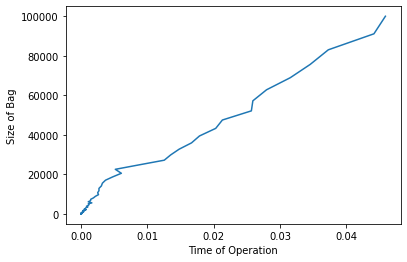

In [47]:
import matplotlib.pyplot as plt
import matplotlib

# words = sample_n_words(list_of_words_20k, 500)
words = sample_n_words(list_of_words_20k, 1)
# plot_bagsize_vs_time_with_similarity(jaccard_similarity, words, [int(10**x) for x in np.linspace(1, 5, 100)])
plot_bagsize_vs_meantime(jaccard_similarity, words, [int(10**x) for x in np.linspace(1, 5, 100)], repeats=100)

plt.show()

### 2
What is the theoretical worst case running time of the cosine similarity measure applied to documents represented as (dense representation) vectors? Show that this is the case empirically. Estimate the constant for your implementation and computer. Compare using the implementation of the dot product in numpy with your own implementation.

In [34]:
#Function that computes Cosine similarity of two bags using dense vector representations
def dense_cosine_similarity(bag1: Bag, bag2: Bag):
    import math
    counts1 = bag1.counts()
    counts2 = bag2.counts()
    
    #Create list containing all words in bag1 and bag2
    all_words = list(set(counts1.keys()).union(set(counts2.keys())))
    
    #Create vectors for bag1 and bag2
    vector1 = [counts1[word] if word in counts1 else 0 for word in all_words]
    vector2 = [counts2[word] if word in counts2 else 0 for word in all_words]

    #Compute cosine similarity
    dot_product = sum([x*y for x,y in zip(vector1, vector2)])
    magnitude1 = math.sqrt(sum([x**2 for x in vector1]))
    magnitude2 = math.sqrt(sum([x**2 for x in vector2]))
    return dot_product/(magnitude1*magnitude2)

### Time Complexity

For the implementation for the dense cosine similarity above, the steps are:

* Create a dictionary of counts for word occurences in the first bag $\mathcal{O}(n_1)$
    - Create dictionary $\mathcal{O}(1)$
    - For each word in the bag increment the value of dictionary[word] by one $\mathcal{O}(n_1)$

* Create a dictionary of counts for word occurences in the second bag $\mathcal{O}(n_2)$

* Create a list of all of the unique words in in both bags $2\mathcal{O}(n_{unique_1}) + 2\mathcal{O}(n_{unique_2})$
    - Create set from keys of first dictionary of counts $\mathcal{O}(n_{unique_1})$
    - Create set from keys of second dictionary of counts $\mathcal{O}(n_{unique_2})$
    - Take the union of both sets, worst-case $\mathcal{O}(n_{unique_1}) + \mathcal{O}(n_{unique_2})$

* Create vector representing first dictionary of counts using list of all words, worst-case $\mathcal{O}(n_{unique_1} + n_{unique_2})$

* Create vector representing second dictionary of counts using list of all words, worst-case $\mathcal{O}(n_{unique_1} + n_{unique_2})$

* Calculate the dot product between the two vectors, worst-case $2\mathcal{O}(n_{unique_1} + n_{unique_2})$

* Calculate the magnitude of the vector representing the first dictionary of counts $\mathcal{O}(n_{unique_1})$

* Calculate the magnitude of the vector representing the second dictionary of counts $\mathcal{O}(n_{unique_2})$

* Divide the dot product with the product of the magnitudes $\mathcal{O}(1)$


Therefore, the theoretical running time of this algorithm is 
$$
\begin{equation*}
\begin{align*}
\mathcal{O}_{total}   &= \mathcal{O}(n_1) + \mathcal{O}(n_2)+ 2\mathcal{O}(n_{unique_1}) + 2\mathcal{O}(n_{unique_2}) + \mathcal{O}(n_{unique_1} + n_{unique_2}) + \mathcal{O}(n_{unique_1} + n_{unique_2})\\
&+ 2\mathcal{O}(n_{unique_1} + n_{unique_2}) + \mathcal{O}(n_{unique_1}) + \mathcal{O}(n_{unique_2}) + \mathcal{O}(1)
\end{align*}
\end{equation*}
$$ 

Here $n_1$ and $n_2$ are the original starting bag sizes, and $n_{unique_1}$ and $n_{unique_2}$ are the the number of unique elements in each starting bag. In the worst-case

$$
\begin{equation*}
\begin{align*}
n_{unique_1} &= n_1\\
n_{unique_2} &= n_2
\end{align*}
\end{equation*}
$$

in which case the theoretical running time of this algorithm is 
$$
\begin{equation*}
\begin{align*}
\mathcal{O}_{total}     &= \mathcal{O}(n_1) + \mathcal{O}(n_2) + 2\mathcal{O}(n_1) + 2\mathcal{O}(n_2) + \mathcal{O}(n_1 + n_2) + \mathcal{O}(n_1 + n_2)\\
&+ 2\mathcal{O}(n_1 + n_2) + \mathcal{O}(n_1) + \mathcal{O}(n_2) + \mathcal{O}(1)\\
                        &= 7\mathcal{O}(n_1) + 7\mathcal{O}(n_2) + \mathcal{O}(1)\\
                        &\approx\mathcal{O}(max(n_1, n_2))
\end{align*}
\end{equation*}
$$ 

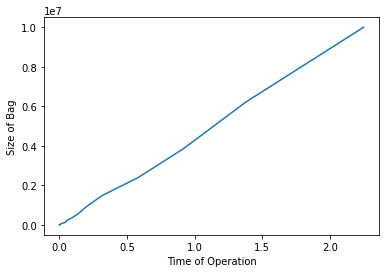

In [76]:
words = sample_n_words(list_of_words_20k, 1)
start = 1
stop = 7
step = 5*(stop - start)
# plot_bagsize_vs_time_with_similarity(words, [int(10**x) for x in np.linspace(1, 5, 100)])
plot_bagsize_vs_meantime(dense_cosine_similarity, words, [int(10**x) for x in np.linspace(start, stop, step)], repeats=1)
# plot_bagsize_vs_meantime(dense_cosine_similarity, words, range(10**6, 10**7, 10**6), repeats=1)

plt.show()

### 3 
Write a function which computes cosine similarity directly from sparse (dictionary) representations without converting them into dense (vector) representations. Test your function for correctness and compare its efficiency theoretically and empirically to (i) your previous implementation of the cosine similarity, and (ii) your implementation of Jaccard’s measure.

In [39]:
#Function that computes Cosine similarity of two bags using sparse vector representations
def sparse_cosine_similarity(bag1: Bag, bag2: Bag):
    counts1 = bag1.counts()
    counts2 = bag2.counts()

    #Swap order of counts to ensure minimum number of comparisons 
    #are computed to get the intersection
    if bag1.size() < bag2.size():
        counts1, counts2 = counts2, counts1
        
    #Compute the 'dot product' for the sparse representation
    intersection = 0
    for element in counts1:
        if element in counts2:
        # if counts2[element] > 0:
            intersection += counts1[element] * counts2[element]

    #Compute the norm for the first bag
    norm1 = 0
    for element in counts1:
        norm1 += counts1[element] ** 2
    norm1 = math.sqrt(norm1)

    #Compute the norm for the second bag
    norm2 = 0
    for element in counts2:
        norm2 += counts2[element] ** 2
    norm2 = math.sqrt(norm2)

    #Return the cosine similarity
    return intersection / (norm1 * norm2)

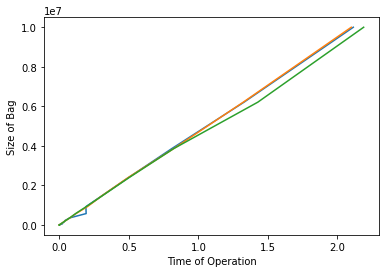

In [78]:
words = sample_n_words(list_of_words_20k, 1)

start = 1
stop = 7
step = 5*(stop - start)

plot_bagsize_vs_meantime(sparse_cosine_similarity, words, [int(10**x) for x in np.linspace(start, stop, step)], repeats=1)
plot_bagsize_vs_meantime(dense_cosine_similarity, words, [int(10**x) for x in np.linspace(start, stop, step)], repeats=1)
plot_bagsize_vs_meantime(jaccard_similarity, words, [int(10**x) for x in np.linspace(start, stop, step)], repeats=1)

plt.show()

### 4
Write a function which computes all-pairs similarities for a collection of documents. The function should take a list of dictionaries (the document collection) and a parameter specifying the similarity measure to be used. What is the theoretical worst-case running time for computing all-pairs similarities? Does it matter what the similarity measure is? Can you give an estimate of how long it would take to compute all-pairs similarities for 200K documents for both measures? (Note: that whilst you should test your function for all-pairs similarities (with d > 10), you do not need to prove the theoretical worst case empirically or test with 200K documents!)

In [54]:
#Function which computes all-pairs similarities for a collection of documents
def compute_similarities(documents: list, similarity_function: str):
    bags=[]
    for doc in documents:
        bag = Bag()
        for word in word_tokenize(doc):
            bag.add(word)
        bags.append(bag)
    
    #Assign correct similarity function depending on input
    if similarity_function == "jaccard_similarity":
        func = jaccard_similarity
    elif similarity_function == "dense_cosine_similarity":
        func = dense_cosine_similarity
    elif similarity_function == "sparse_cosine_similarity":
        func = sparse_cosine_similarity
    else:
        raise ValueError("Invalid similarity function")
    
    #Compute similarity comparison for every pair of documents
    similarities = []
    for i,j in list(itertools.combinations(range(len(bags)), 2)):
        similarities.append((i, j, func(bags[i], bags[j])))
    
    return similarities

### 5
Write a function that implements all-pairs similarities for documents and uses some form of parallel computing, e.g. MapReduce. Make sure you test your function empirically for correctness and for efficiency. Investigate the number of parallel processes that gives optimal results for your implementation and computer.

In [53]:
#Function which computes all-pairs similarities for a collection of documents
def compute_similarities_parallel(documents: list, similarity_function: str):
    bags=[]
    for doc in documents:
        bag = Bag()
        for word in word_tokenize(doc):
            bag.add(word)
        bags.append(bag)
    
    #Assign correct similarity function depending on input
    if similarity_function == "jaccard_similarity":
        func = jaccard_similarity
    elif similarity_function == "dense_cosine_similarity":
        func = dense_cosine_similarity
    elif similarity_function == "sparse_cosine_similarity":
        func = sparse_cosine_similarity
    else:
        raise ValueError("Invalid similarity function")
    
    # #Compute similarity comparison for every pair of documents
    # similarities = []
    # for i,j in list(itertools.combinations(range(len(bags)), 2)):
    #     similarities.append((i, j, func(bags[i], bags[j])))
    
    # return similarities

    #Map pool to apply mapping functions
    map_pool = Pool(processes=4)

    #Mapping function for two bags   
    similarity_mapper = lambda i, j, bags=bags: (i, j, func(bags[i], bags[j]))

    indices_1 = []
    indices_2 = []

    for i,j in itertools.combinations(range(len(bags)), 2):
        indices_1.append(i)
        indices_2.append(j)

    # func = lambda i, j: Bag()
    #Store results of each mapping function
    similarity_map=map_pool.map(similarity_mapper, indices_1, indices_2)

    #Close and clear map pool to prevent errors using in the future
    map_pool.close()
    map_pool.clear()

    #Collect map results into list for reducing
    similarities = list(similarity_map)

    return similarities

### Unit Tests

In [50]:
import unittest

class TestBagFunctionality(unittest.TestCase):
    #Unit tests
    def test_add_bag(self):
        bag = Bag()
        bag.add(1)
        self.assertTrue(bag.values() == [1])
        bag.add(2)
        self.assertTrue(bag.values() == [1,2])
        bag.add(3)
        self.assertTrue(bag.values() == [1,2,3])

    def test_len_bag(self):
        bag = Bag()
        bag.add(1)
        self.assertTrue(len(bag) == 1)
        bag.add(2)
        self.assertTrue(len(bag) == 2)
        bag.add(3)
        self.assertTrue(len(bag) == 3)

    def test_remove_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        bag.remove(2)
        self.assertTrue(bag.values() == [1,3])
        bag.remove(1)
        self.assertTrue(bag.values() == [3])
        bag.remove(3)
        self.assertTrue(bag.values() == [])

    def test_count_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(bag.count(1) == 1)
        self.assertTrue(bag.count(2) == 1)
        self.assertTrue(bag.count(3) == 1)
        bag.remove(2)
        self.assertTrue(bag.count(2) == 0)

    def test_counts_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        bag.add(2)
        bag.add(3)
        bag.add(3)
        self.assertTrue(bag.counts() == {1:1, 2:2, 3:3})

    def test_iterator_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        for i,j in zip(bag, [1,2,3]):
            self.assertTrue(i == j)

    def test_str_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(str(bag) == "[1, 2, 3]")

    def test_repr_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(repr(bag) == "[1, 2, 3]")

    def test_len_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(len(bag) == 3)

    def test_getitem_bag(self):    
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(bag[0] == 1)
        self.assertTrue(bag[1] == 2)
        self.assertTrue(bag[2] == 3)

    def test_values_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(bag.values() == [1,2,3])

    def test_size_bag(self):
        bag = Bag()
        bag.add(1)
        bag.add(2)
        bag.add(3)
        self.assertTrue(bag.size() == 3)

In [51]:
import itertools

docs=[]

docs.append("The module teaches the computer science aspects of data science. A particular focus is on how data are represented and manipulated to achieve good performance on large data sets (> 10 GBytes) where standard techniques may no longer apply. In lectures, students will learn about data structures, algorithms, and systems, including distributed computing, databases (relational and non-relational), parallel computing, and cloud computing. In laboratory sessions, students will develop their Python programming skills; work with a variety of data sets including large data sets from real world applications; and investigate the impact on run-time of their algorithmic choices.")
docs.append("This module introduces you to the mathematical and statistical techniques used to analyse data. The module is fairly rigorous, and is aimed at students who have, or anticipate having, research data to analyse in a thorough and unbiased way.  Topics include: probability distributions; error propagation; maximum likelihood method and linear least squares fitting; chi-squared testing; subjective probability and Bayes' theorem; monte Carlo techniques; and non-linear least squares fitting.")
docs.append("In this module, you use literature to study the background to a problem in Data Science in your respective stream.  You choose your individual supervisor and devise a strategy by which this problem can be studied - giving details of techniques and resources that you will use to address the problem.  This research proposal forms the basis of the Data Science Dissertation that you will write in summer term.")
docs.append("For this module, you carry out independent study and research under the guide of a supervisor on a designated topic. You then complete a report on the subject over the summer.")
docs.append("In this module, you explore advanced techniques in machine learning. You use a systematic treatment, based on the following three key ingredients: tasks, models, features.  As part of the module, you are introduced to both regression and classification, and your studies emphasise concepts such as model performance, learnability and computational complexity.  You learn techniques including: probabilistic and non-probabilistic classification and regression methods, reinforcement learning approaches including the non-linear variants using kernel methods.  You are also introduced to techniques for pre-processing the data (including PCA). You will then need to be able to implement, develop and deploy these techniques to real-world problems.  In order to take this module, you need to have already taken the 'Mathematics & Computational Methods for Complex Systems' module (817G5), or have taken an equivalent mathematical module or have equivalent prior experience.")
docs.append("Your studies in this module include a series of seminars covering several topics - including national laws on data and ethical implications.  In addition, there are seminars by Data-Science-oriented companies.  You are expected to write a final dissertation of 3000 words, on a topic of your choice falling within the scope of the module.")
docs.append("This module will provide students with the practical tools and techniques required to build, analyse and interpret 'big data' datasets. It will cover all aspects of the Data Science process including collection, munging or wrangling, cleaning, exploratory data analysis, visualization, statistical inference and model building and implications for applications in the real world. During the module, they will be taught how to scrape data from the Internet, develop and test hypotheses, use principal component analysis (PCA) to reduce dimensionality, prepare actionable plans and present their findings. In the laboratory, students will develop their Python programming skills and be introduced to a number of fundamental standard Python libraries/toolkits for Data Scientists including NumPy, SciPy, PANDAS and SCIKIT-Learn. In these sessions and their coursework, students will work with real-world datasets and apply the techniques covered in lectures to that data.")

jaccard_similarity_ground_truth_values = [ (0, 1, 0.13218390804597702), \
                                (0, 2, 0.09941520467836257), \
                                (0, 3, 0.07971014492753623), \
                                (0, 4, 0.1652542372881356), \
                                (0, 5, 0.12987012987012986), \
                                (0, 6, 0.2672811059907834), \
                                (1, 2, 0.12318840579710146), \
                                (1, 3, 0.08411214953271028), \
                                (1, 4, 0.14150943396226415), \
                                (1, 5, 0.11023622047244094), \
                                (1, 6, 0.14150943396226415), \
                                (2, 3, 0.20224719101123595), \
                                (2, 4, 0.14215686274509803), \
                                (2, 5, 0.1891891891891892), \
                                (2, 6, 0.1477832512315271), \
                                (3, 4, 0.08379888268156424), \
                                (3, 5, 0.2077922077922078), \
                                (3, 6, 0.05434782608695652), \
                                (4, 5, 0.12307692307692308), \
                                (4, 6, 0.2260536398467433), \
                                (5, 6, 0.095)]
                    
cosine_similarity_ground_truth_values = [ (0, 1, 0.47116952883259133), \
                                (0, 2, 0.29370130064810657), \
                                (0, 3, 0.3386670053338413), \
                                (0, 4, 0.5633814220979646), \
                                (0, 5, 0.4483931360446881), \
                                (0, 6, 0.7172112418628068), \
                                (1, 2, 0.328998024879378), \
                                (1, 3, 0.26499947000158997), \
                                (1, 4, 0.5071685033587473), \
                                (1, 5, 0.2845312162312832), \
                                (1, 6, 0.5170799069507365), \
                                (2, 3, 0.48686449556014766), \
                                (2, 4, 0.48980381711988424), \
                                (2, 5, 0.45917121711588194), \
                                (2, 6, 0.4728636701656281), \
                                (3, 4, 0.42459524785140024), \
                                (3, 5, 0.5368524250814087), \
                                (3, 6, 0.3622078674589313), \
                                (4, 5, 0.47814196858924696), \
                                (4, 6, 0.7089821393308153), \
                                (5, 6, 0.41535119570251716)]

class TestJaccardFunctionality(unittest.TestCase):
    def test_jaccard_bags(self):
        ground_truth_values = jaccard_similarity_ground_truth_values
        
        bags=[]
        for doc in docs:
            bag = Bag()
            for word in word_tokenize(doc):
                bag.add(word)
            bags.append(bag)

        #For each count in counts compute the jaccard similarity between counts
        jaccard_similarities = []
        for i,j in list(itertools.combinations(range(len(bags)), 2)):
            jaccard_similarities.append((i, j, jaccard_similarity(bags[i], bags[j])))

        # Print the jaccard similarities
        for x, y in zip(jaccard_similarities, ground_truth_values):
            self.assertTrue(x == y)

class TestCosineFunctionality(unittest.TestCase):
    def test_dense_cosine_bags(self):
        ground_truth_values = cosine_similarity_ground_truth_values
        
        bags=[]
        for doc in docs:
            bag = Bag()
            for word in word_tokenize(doc):
                bag.add(word)
            bags.append(bag)

        #For each count in counts compute the jaccard similarity between counts
        cosine_similarities = []
        for i,j in list(itertools.combinations(range(len(bags)), 2)):
            cosine_similarities.append((i, j, dense_cosine_similarity(bags[i], bags[j])))

        # Check the jaccard similarities
        for x, y in zip(cosine_similarities, ground_truth_values):
            self.assertTrue(x == y)
    
    def test_sparse_cosine_bags(self):
        ground_truth_values = cosine_similarity_ground_truth_values
        
        bags=[]
        for doc in docs:
            bag = Bag()
            for word in word_tokenize(doc):
                bag.add(word)
            bags.append(bag)

        #For each count in counts compute the jaccard similarity between counts
        cosine_similarities = []
        for i,j in list(itertools.combinations(range(len(bags)), 2)):
            cosine_similarities.append((i, j, sparse_cosine_similarity(bags[i], bags[j])))

        # Check the jaccard similarities
        for x, y in zip(cosine_similarities, ground_truth_values):
            self.assertTrue(x == y)
    
#Test parallel compute similarity function for all inputs
class TestComputeSimilarityFunctionality(unittest.TestCase):
    def test_jaccard(self):
        ground_truth_values = jaccard_similarity_ground_truth_values
        
        similarities = compute_similarities(docs, "jaccard_similarity")
        
        # Check the jaccard similarities
        for x, y in zip(similarities, ground_truth_values):
            self.assertTrue(x == y)
    
    def test_dense_cosine(self):
        ground_truth_values = cosine_similarity_ground_truth_values
        
        similarities = compute_similarities(docs, "dense_cosine_similarity")
        
        # Check the dense cosine similarities
        for x, y in zip(similarities, ground_truth_values):
            self.assertTrue(x == y)
    
    def test_sparse_cosine(self):
        ground_truth_values = cosine_similarity_ground_truth_values
        
        similarities = compute_similarities(docs, "sparse_cosine_similarity")
        
        # Check the sparse cosine similarities
        for x, y in zip(similarities, ground_truth_values):
            self.assertTrue(x == y)

class TestComputeParallelJaccardSimilarityFunctionality(unittest.TestCase):
    def test_jaccard_parallel(self):
        ground_truth_values = compute_similarities(docs, "jaccard_similarity")
        
        similarities = compute_similarities_parallel(docs, "jaccard_similarity")

        # Check the jaccard similarities
        for x, y in zip(similarities, ground_truth_values):
            self.assertTrue(x == y)

class TestComputeParallelCosineSimilarityFunctionality(unittest.TestCase):
    def test_cosine_parallel(self):
        ground_truth_values = compute_similarities(docs, "dense_cosine_similarity")
        
        similarities = compute_similarities_parallel(docs, "dense_cosine_similarity")

        # Check the cosine similarities
        for x, y in zip(similarities, ground_truth_values):
            self.assertTrue(x == y)

In [55]:
if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)

test_add_bag (__main__.TestBagFunctionality) ... ok
test_count_bag (__main__.TestBagFunctionality) ... ok
test_counts_bag (__main__.TestBagFunctionality) ... ok
test_getitem_bag (__main__.TestBagFunctionality) ... ok
test_iterator_bag (__main__.TestBagFunctionality) ... ok
test_len_bag (__main__.TestBagFunctionality) ... ok
test_remove_bag (__main__.TestBagFunctionality) ... ok
test_repr_bag (__main__.TestBagFunctionality) ... ok
test_size_bag (__main__.TestBagFunctionality) ... ok
test_str_bag (__main__.TestBagFunctionality) ... ok
test_values_bag (__main__.TestBagFunctionality) ... ok
test_cosine_parallel (__main__.TestComputeParallelCosineSimilarityFunctionality) ... ok
test_jaccard_parallel (__main__.TestComputeParallelJaccardSimilarityFunctionality) ... ok
test_dense_cosine (__main__.TestComputeSimilarityFunctionality) ... ok
test_jaccard (__main__.TestComputeSimilarityFunctionality) ... ok
test_sparse_cosine (__main__.TestComputeSimilarityFunctionality) ... ok
test_dense_cosine_b